<a href="https://colab.research.google.com/github/ThiwakornC/Spotter-NBA/blob/main/DADS5001_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# โหลดไฟล์ CSV
team_summaries_df = pd.read_csv('Team Summaries.csv')
team_totals_df = pd.read_csv('Team Totals.csv')
shooting_data = pd.read_csv('Player Shooting.csv')
totals_data = pd.read_csv('Player Totals.csv')
Weight_and_height = 'Weight and height.csv'

team_summaries_df = team_summaries_df[(team_summaries_df['season'] > 1979) & (team_summaries_df['team'] != 'League Average')]
team_totals_df = team_totals_df[(team_totals_df['season'] > 1979) & (team_totals_df['team'] != 'League Average')]

totals_data = totals_data[(totals_data['season'] > 1979) & (totals_data['tm'] != 'TOT')]
shooting_data = shooting_data[(shooting_data['season'] > 1979) & (totals_data['tm'] != 'TOT')]






<ipython-input-40-339e74c6809f>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shooting_data = shooting_data[(shooting_data['season'] > 1979) & (totals_data['tm'] != 'TOT')]


<ipython-input-2-6fca69dab605>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rank_1_teams['x3p_percent'].fillna(0, inplace=True)


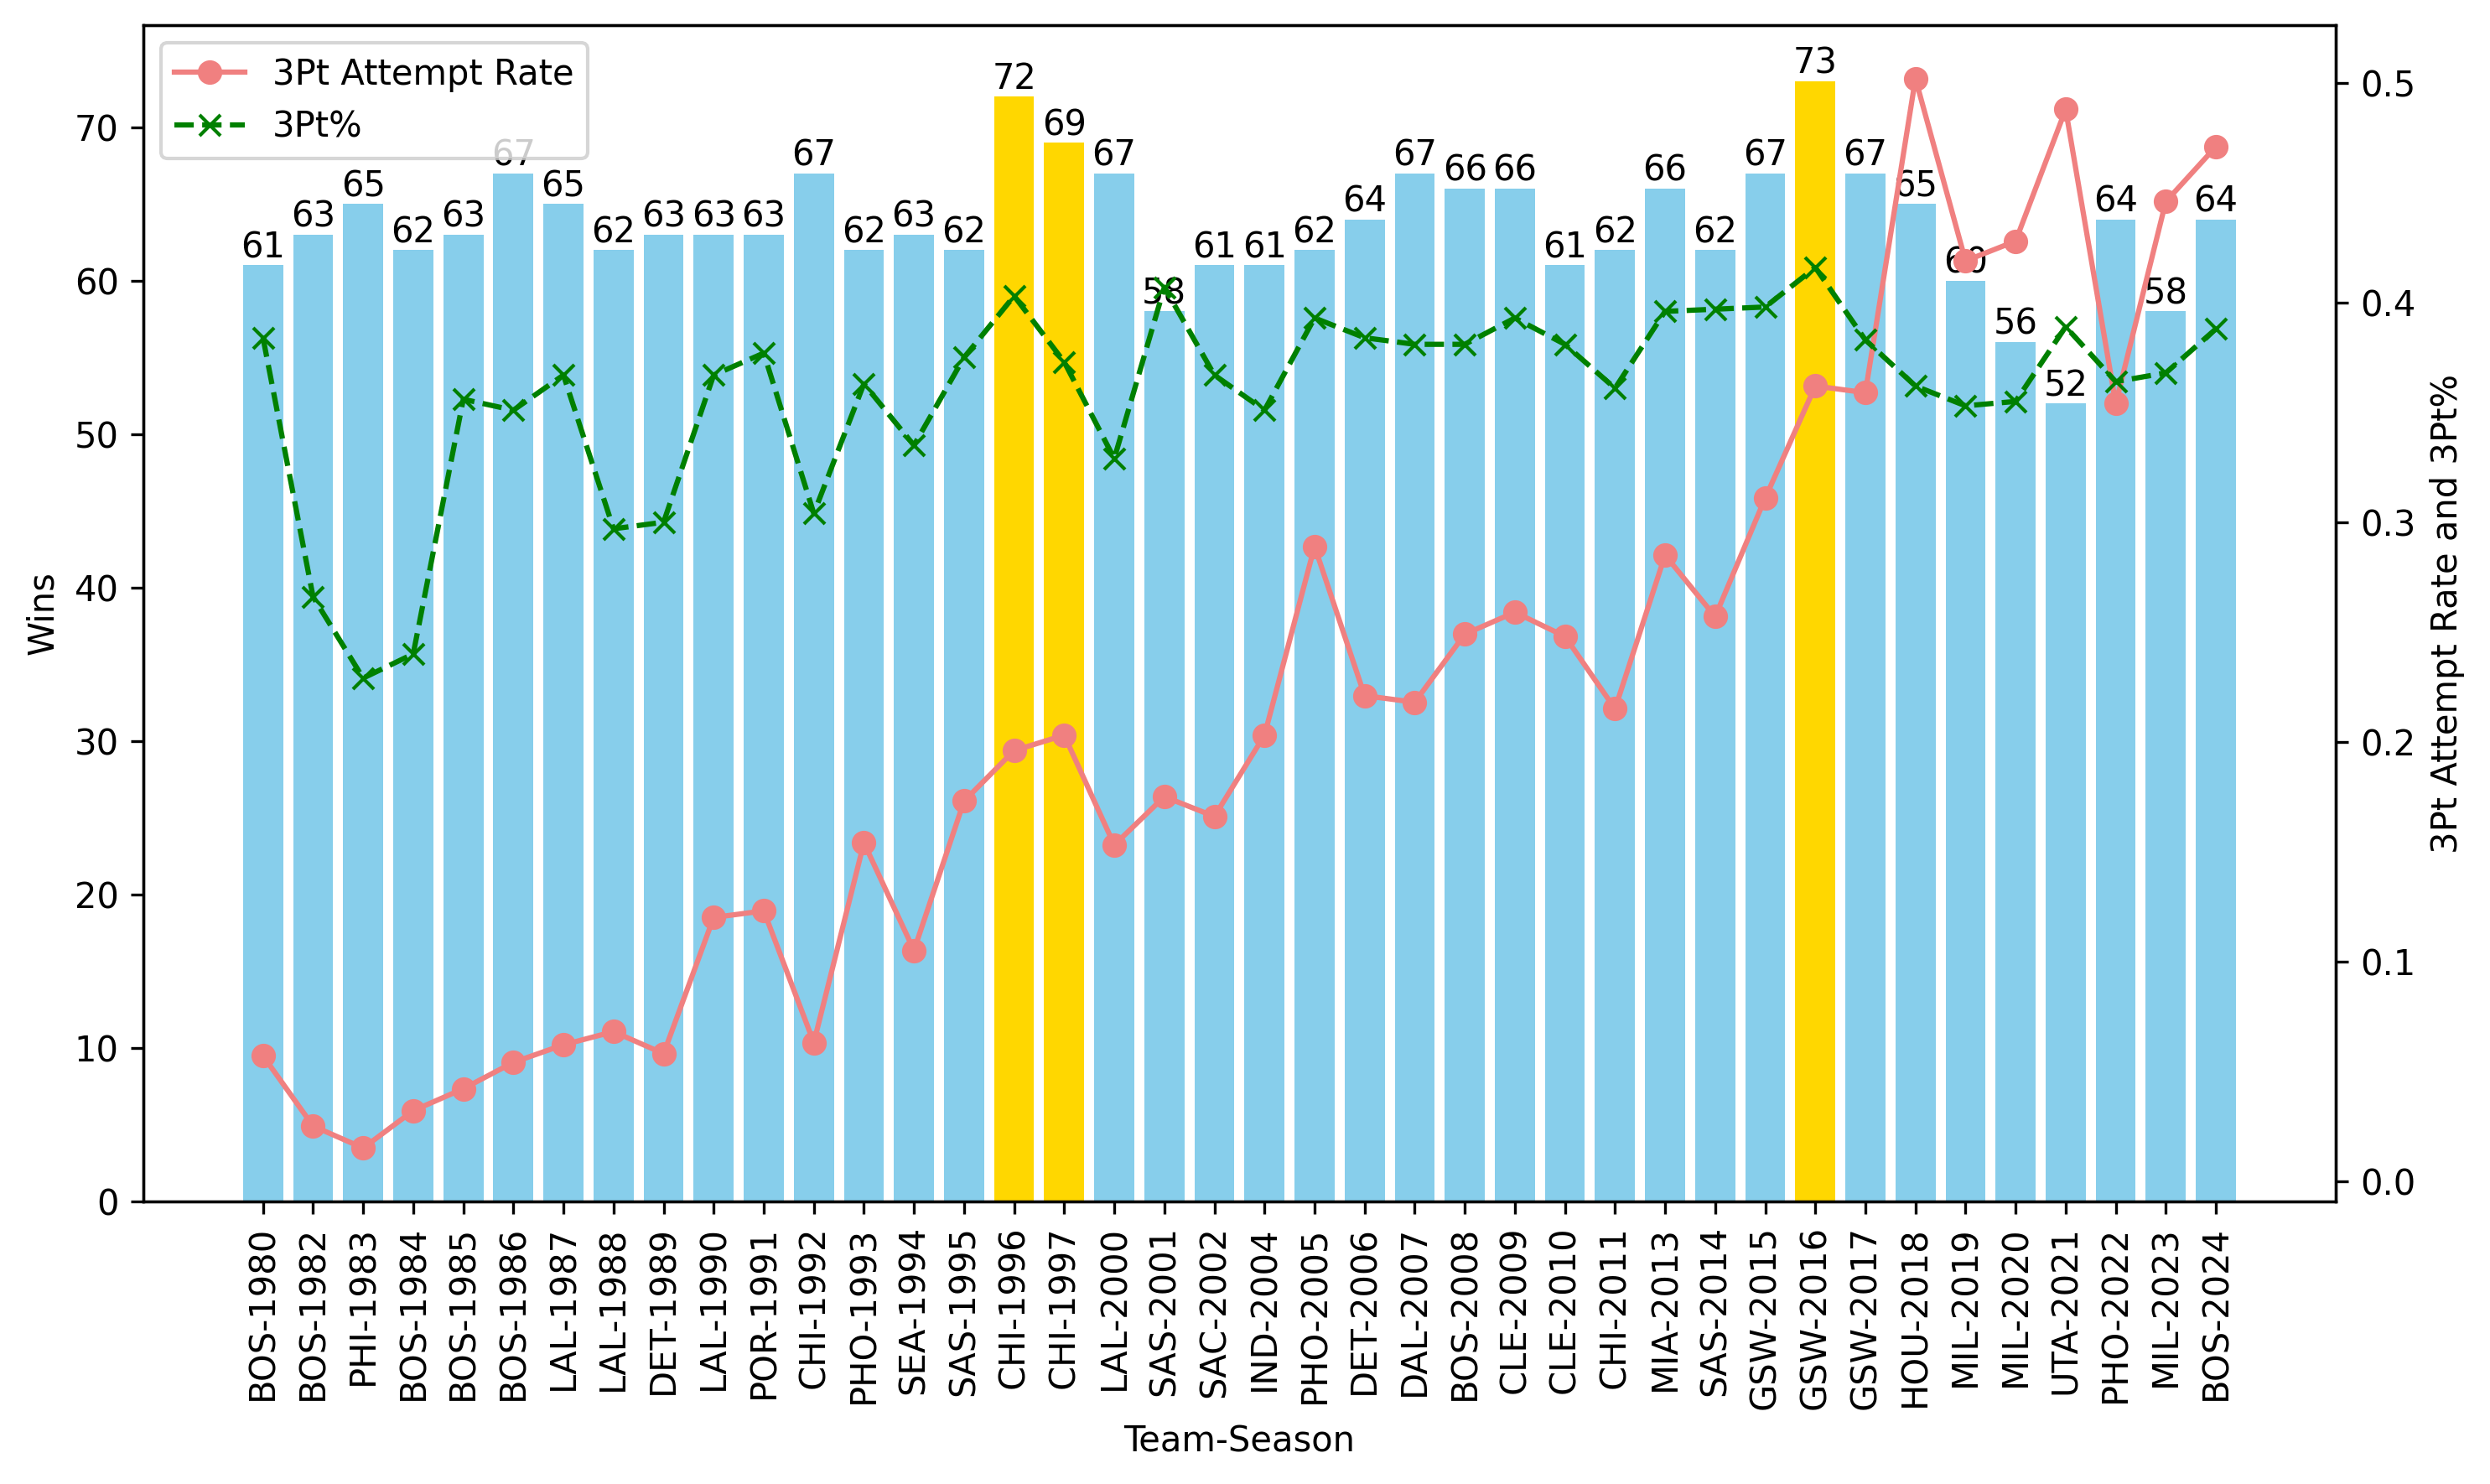

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming team_summaries_df and team_totals_df are your DataFrames

# สร้างคอลัมน์ 'rank' โดยการจัดอันดับทีมตามจำนวนชนะ 'w' (จากมากไปน้อย)
team_summaries_df['rank'] = team_summaries_df.groupby('season')['w'].rank(ascending=False)

# กรองทีมที่มีอันดับ 1 ของแต่ละฤดูกาล
rank_1_teams = team_summaries_df[team_summaries_df['rank'] == 1].copy()

# สร้างคอลัมน์ 'Team-Season' และจัดเรียงข้อมูลตามฤดูกาล (season)
rank_1_teams['Team-Season'] = rank_1_teams['abbreviation'] + "-" + rank_1_teams['season'].astype(str)
rank_1_teams = rank_1_teams.sort_values('season')

# Merge team_summaries_df with team_totals_df โดยใช้ 'abbreviation' และ 'season' เป็นตัวเชื่อม
rank_1_teams = pd.merge(rank_1_teams, team_totals_df[['abbreviation', 'season', 'x3p_percent']],
                        on=['abbreviation', 'season'], how='left')

# เติมค่า NA ในคอลัมน์ x3p_percent ด้วยค่า 0
rank_1_teams['x3p_percent'].fillna(0, inplace=True)

# ระบุทีมที่อยู่ใน 3 อันดับแรกจากการเรียงลำดับจำนวนชัยชนะ (w)
top_3_teams = rank_1_teams.nlargest(3, 'w')

# กำหนดสีให้กับทีมใน 3 อันดับแรกและทีมที่เหลือ
bar_colors = ['gold' if team in top_3_teams['Team-Season'].values else 'skyblue' for team in rank_1_teams['Team-Season']]

# สร้างกราฟ
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

# กราฟแท่งแสดงจำนวนชัยชนะ (w) พร้อมสีพิเศษสำหรับทีมที่อยู่ใน 3 อันดับแรก
ax1.bar(rank_1_teams['Team-Season'], rank_1_teams['w'], color=bar_colors)
ax1.set_xlabel('Team-Season')
ax1.set_ylabel('Wins', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=90)

# เพิ่มข้อความบนแท่งกราฟ
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', color='black')

# กราฟเส้นแสดง 'x3p_ar' และ 'x3p_percent'
ax2 = ax1.twinx()
ax2.plot(rank_1_teams['Team-Season'], rank_1_teams['x3p_ar'], color='lightcoral', marker='o', label='3Pt Attempt Rate')
ax2.plot(rank_1_teams['Team-Season'], rank_1_teams['x3p_percent'], color='green', marker='x', linestyle='--', label='3Pt%')
ax2.set_ylabel('3Pt Attempt Rate and 3Pt%')
ax2.tick_params(axis='y', labelcolor='black')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


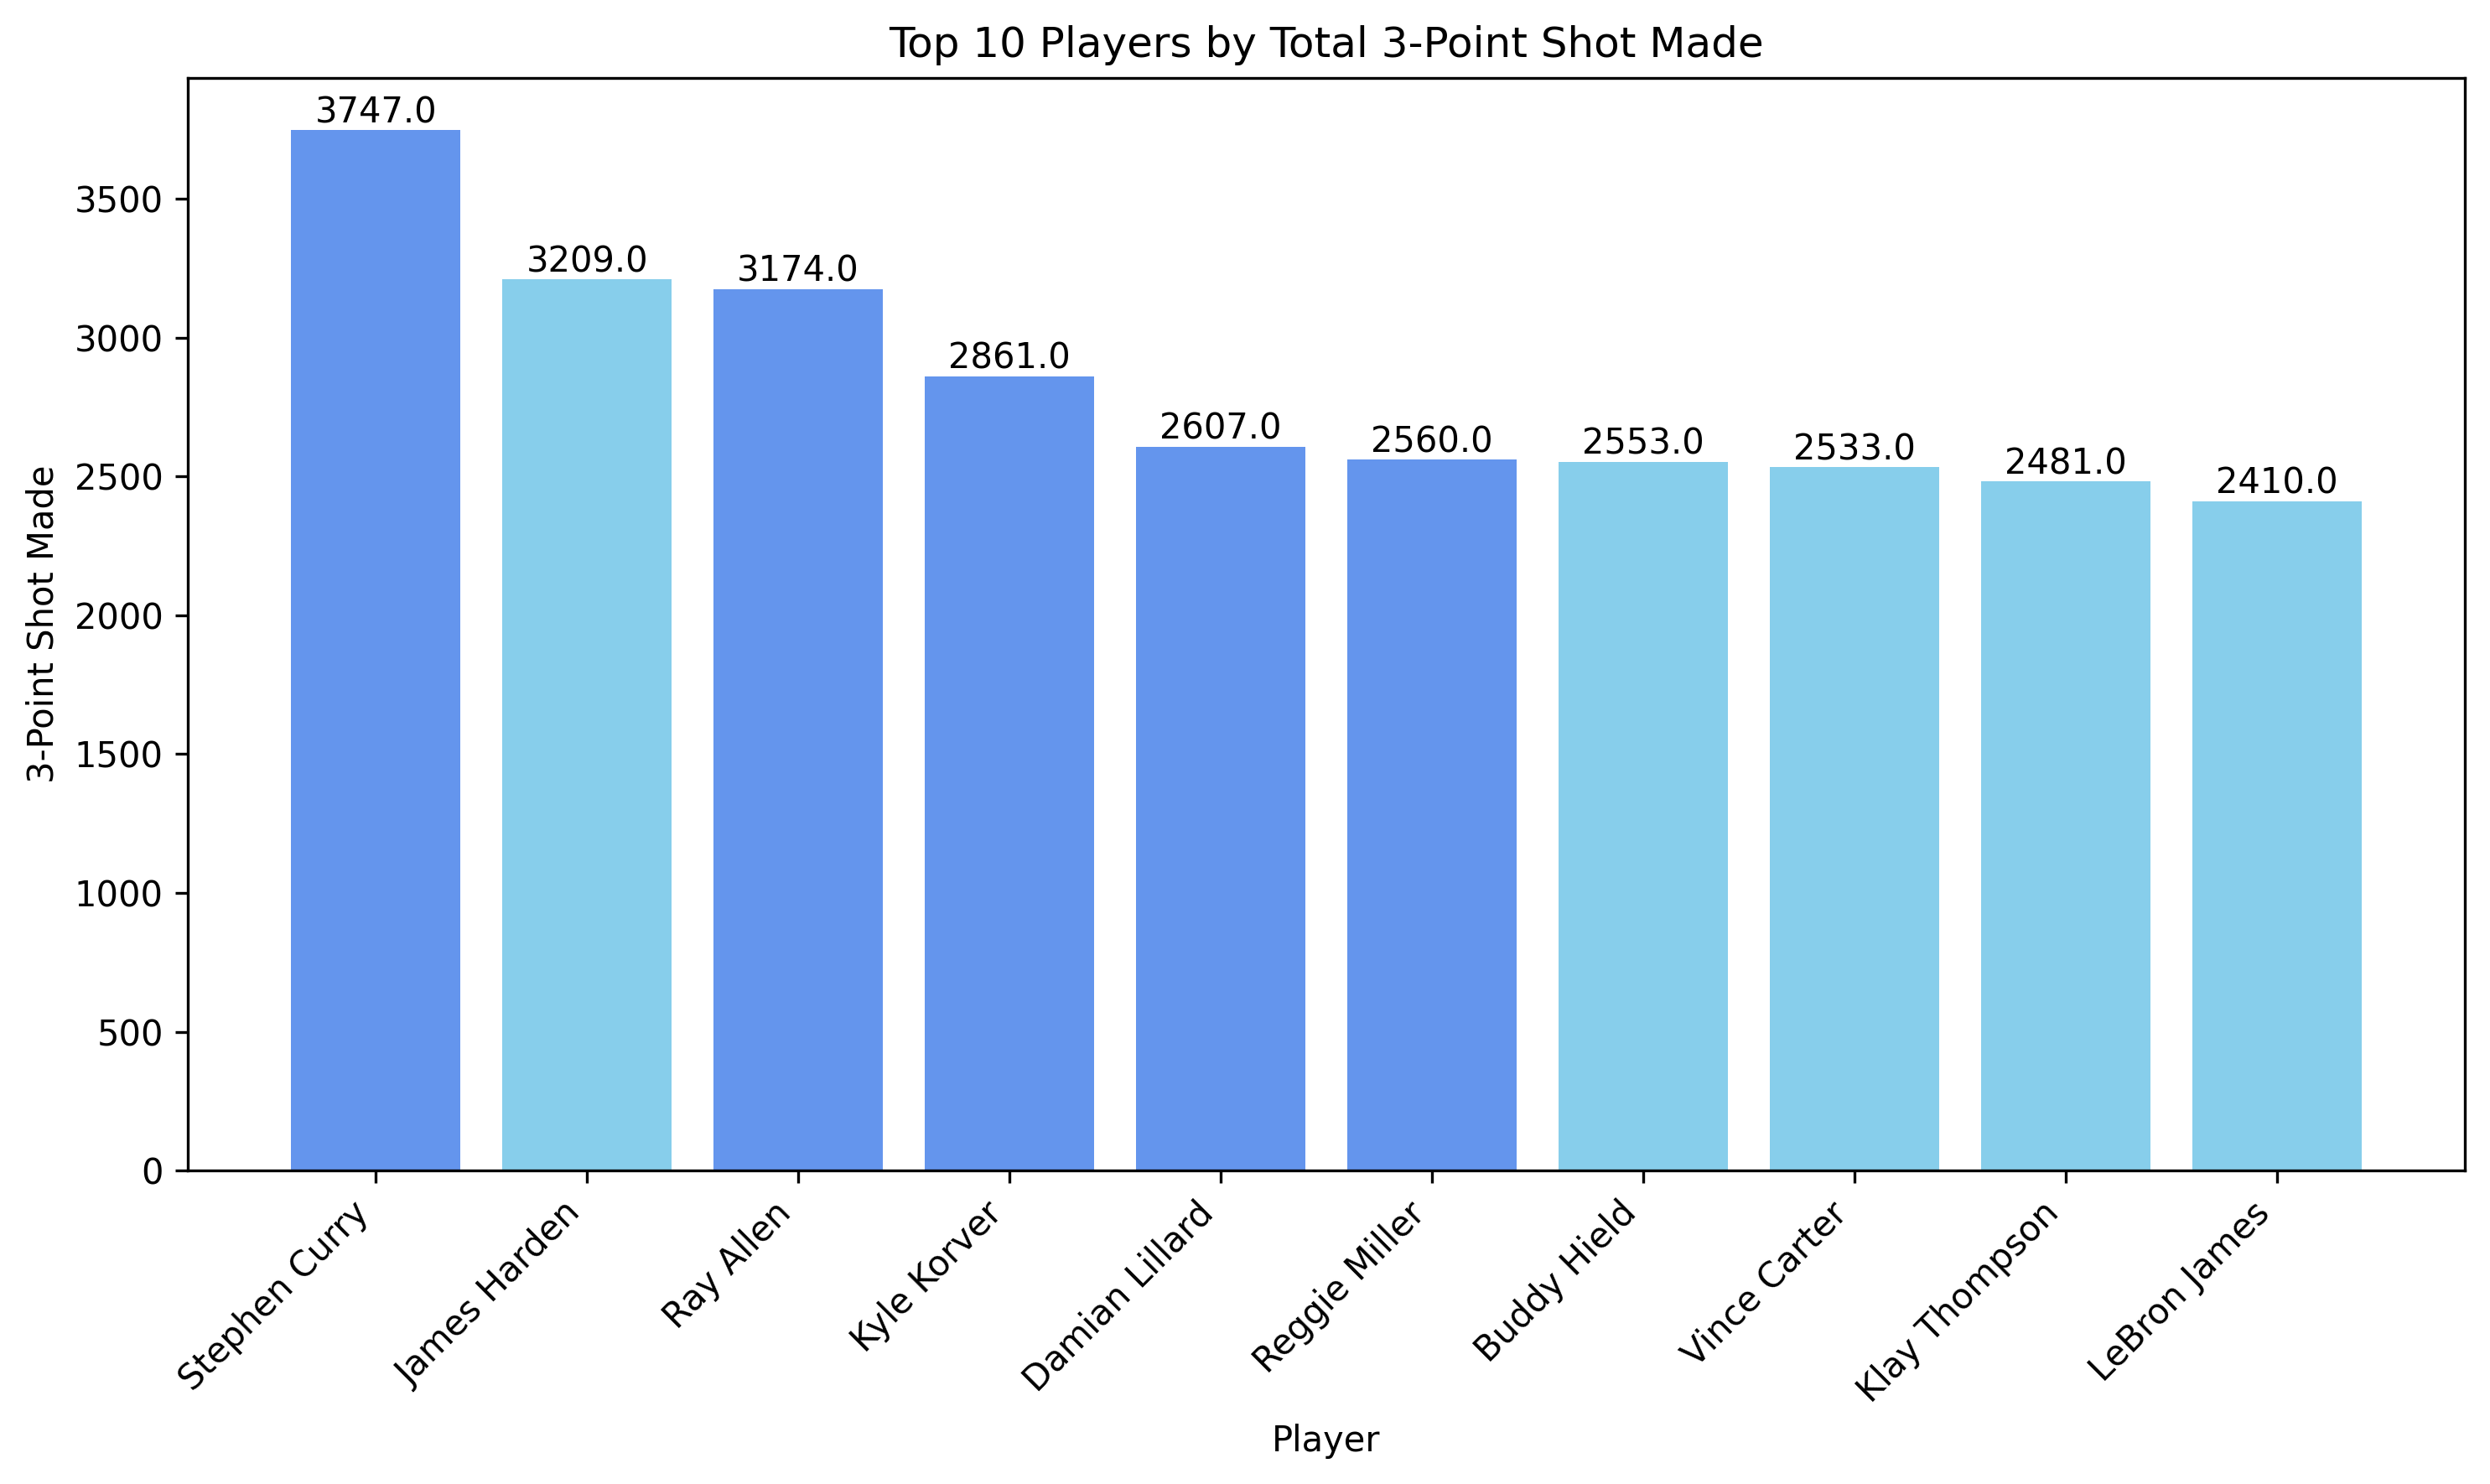

In [12]:

# Create a new column 'Player-Season' by combining player name and season
totals_data['Player-Season'] = totals_data['player'] + '-' + totals_data['season'].astype(str)

# Calculate the total 3-Point shots made (x3p) and 3-Point attempts (x3pa) for each player
player_3p_totals = totals_data.groupby('player')['x3p'].sum()
player_3pa_totals = totals_data.groupby('player')['x3pa'].sum()

# Calculate the 3-Point shooting percentage (x3p_percent = x3p / x3pa * 100)
player_x3p_percent = (player_3p_totals / player_3pa_totals) * 100

# Create a DataFrame for the top 10 players by total 3-Point shots made
top_10_by_total_x3p_with_experience = pd.DataFrame({
    'player': player_3p_totals.index,
    'x3pa': player_3pa_totals.values,  # Add the 3-point attempts column
    'x3p': player_3p_totals.values,
    'x3p_percent': player_x3p_percent.values
}).sort_values(by='x3p', ascending=False).head(10)

# Calculate the max experience for each player
max_experience = totals_data.groupby('player')['experience'].max()

# Add the 'max_experience' column to the DataFrame
top_10_by_total_x3p_with_experience['max_experience'] = top_10_by_total_x3p_with_experience['player'].map(max_experience)

# Reorder the columns to place 'x3p' before 'x3pa'
top_10_by_total_x3p_with_experience_reordered = top_10_by_total_x3p_with_experience[['player', 'x3p', 'x3pa', 'x3p_percent', 'max_experience']]

# Reset the index of the DataFrame
top_10_by_total_x3p_with_experience_reordered_reset = top_10_by_total_x3p_with_experience_reordered.reset_index(drop=True)


# Plot the bar chart for 3-Point shots made (x3p) by the top 10 players
players = top_10_by_total_x3p_with_experience_reordered_reset['player']
x3p_values = top_10_by_total_x3p_with_experience_reordered_reset['x3p']

plt.figure(figsize=(10, 6), dpi=300)

# Color only bars at positions 1, 3, 4, 5, and 6 differently
colors = ['cornflowerblue' if i in [0, 2, 3, 4, 5] else 'skyblue' for i in range(len(players))]

# Create bar chart with custom colors
bars = plt.bar(players, x3p_values, color=colors)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('3-Point Shot Made')
plt.title('Top 10 Players by Total 3-Point Shot Made')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()


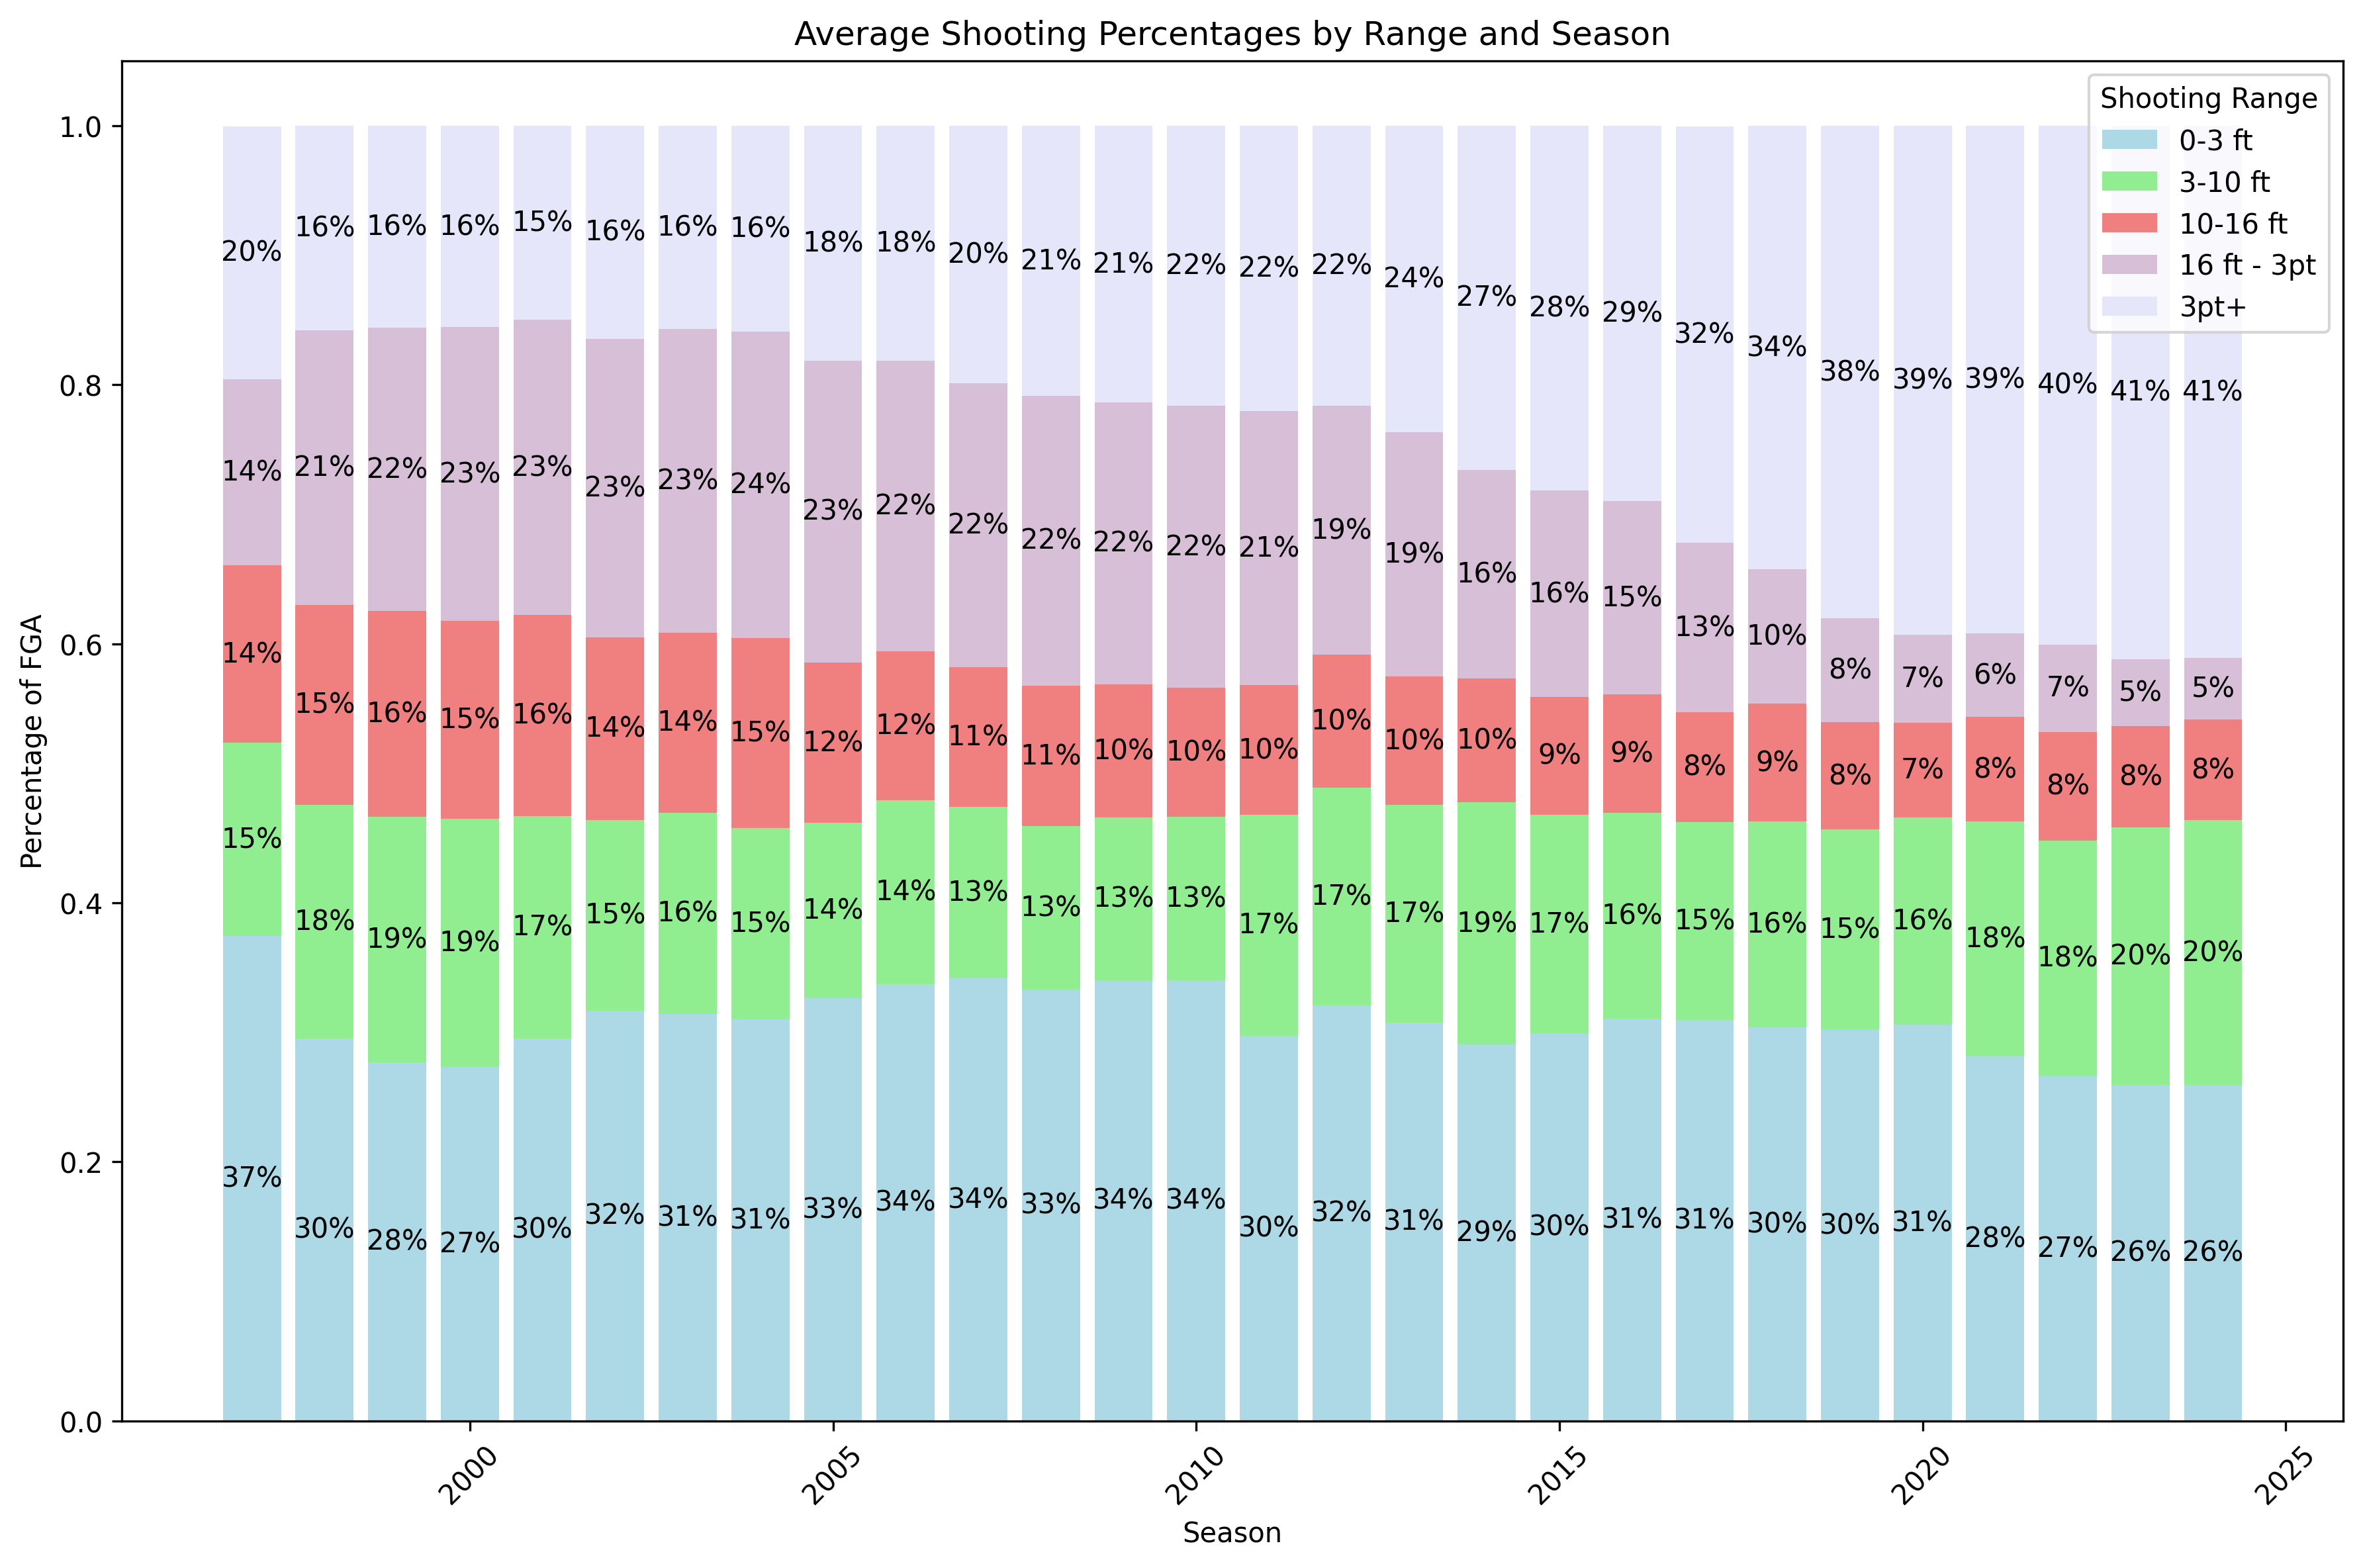

In [5]:

# Assuming 'data_cleaned' is your DataFrame
shooting_data['season'] = shooting_data['season'].astype(int)

# Aggregating the average of percentage of FGA from different ranges per season
stacked_data = shooting_data.groupby('season').agg({
    'percent_fga_from_x0_3_range': 'mean',
    'percent_fga_from_x3_10_range': 'mean',
    'percent_fga_from_x10_16_range': 'mean',
    'percent_fga_from_x16_3p_range': 'mean',
    'percent_fga_from_x3p_range': 'mean'
}).reset_index()

# Plotting stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8),dpi = 300)

# Define bar width
bar_width = 0.8

# Plot stacked bar with specific colors for each range
ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x0_3_range'],
       label='0-3 ft', width=bar_width, color='lightblue')
for i, v in enumerate(stacked_data['percent_fga_from_x0_3_range']):
    ax.text(stacked_data['season'][i], v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x3_10_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'], label='3-10 ft', width=bar_width, color='lightgreen')
for i, v in enumerate(stacked_data['percent_fga_from_x3_10_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x10_16_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'],
       label='10-16 ft', width=bar_width, color='lightcoral')
for i, v in enumerate(stacked_data['percent_fga_from_x10_16_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x16_3p_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'] + stacked_data['percent_fga_from_x10_16_range'],
       label='16 ft - 3pt', width=bar_width, color='thistle')
for i, v in enumerate(stacked_data['percent_fga_from_x16_3p_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + stacked_data['percent_fga_from_x10_16_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x3p_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'] + stacked_data['percent_fga_from_x10_16_range'] + stacked_data['percent_fga_from_x16_3p_range'],
       label='3pt+', width=bar_width, color='lavender')
for i, v in enumerate(stacked_data['percent_fga_from_x3p_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + stacked_data['percent_fga_from_x10_16_range'][i] + stacked_data['percent_fga_from_x16_3p_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')


# Customizing chart
ax.set_title('Average Shooting Percentages by Range and Season')
ax.set_xlabel('Season')
ax.set_ylabel('Percentage of FGA')

# Display the legend
ax.legend(title="Shooting Range")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

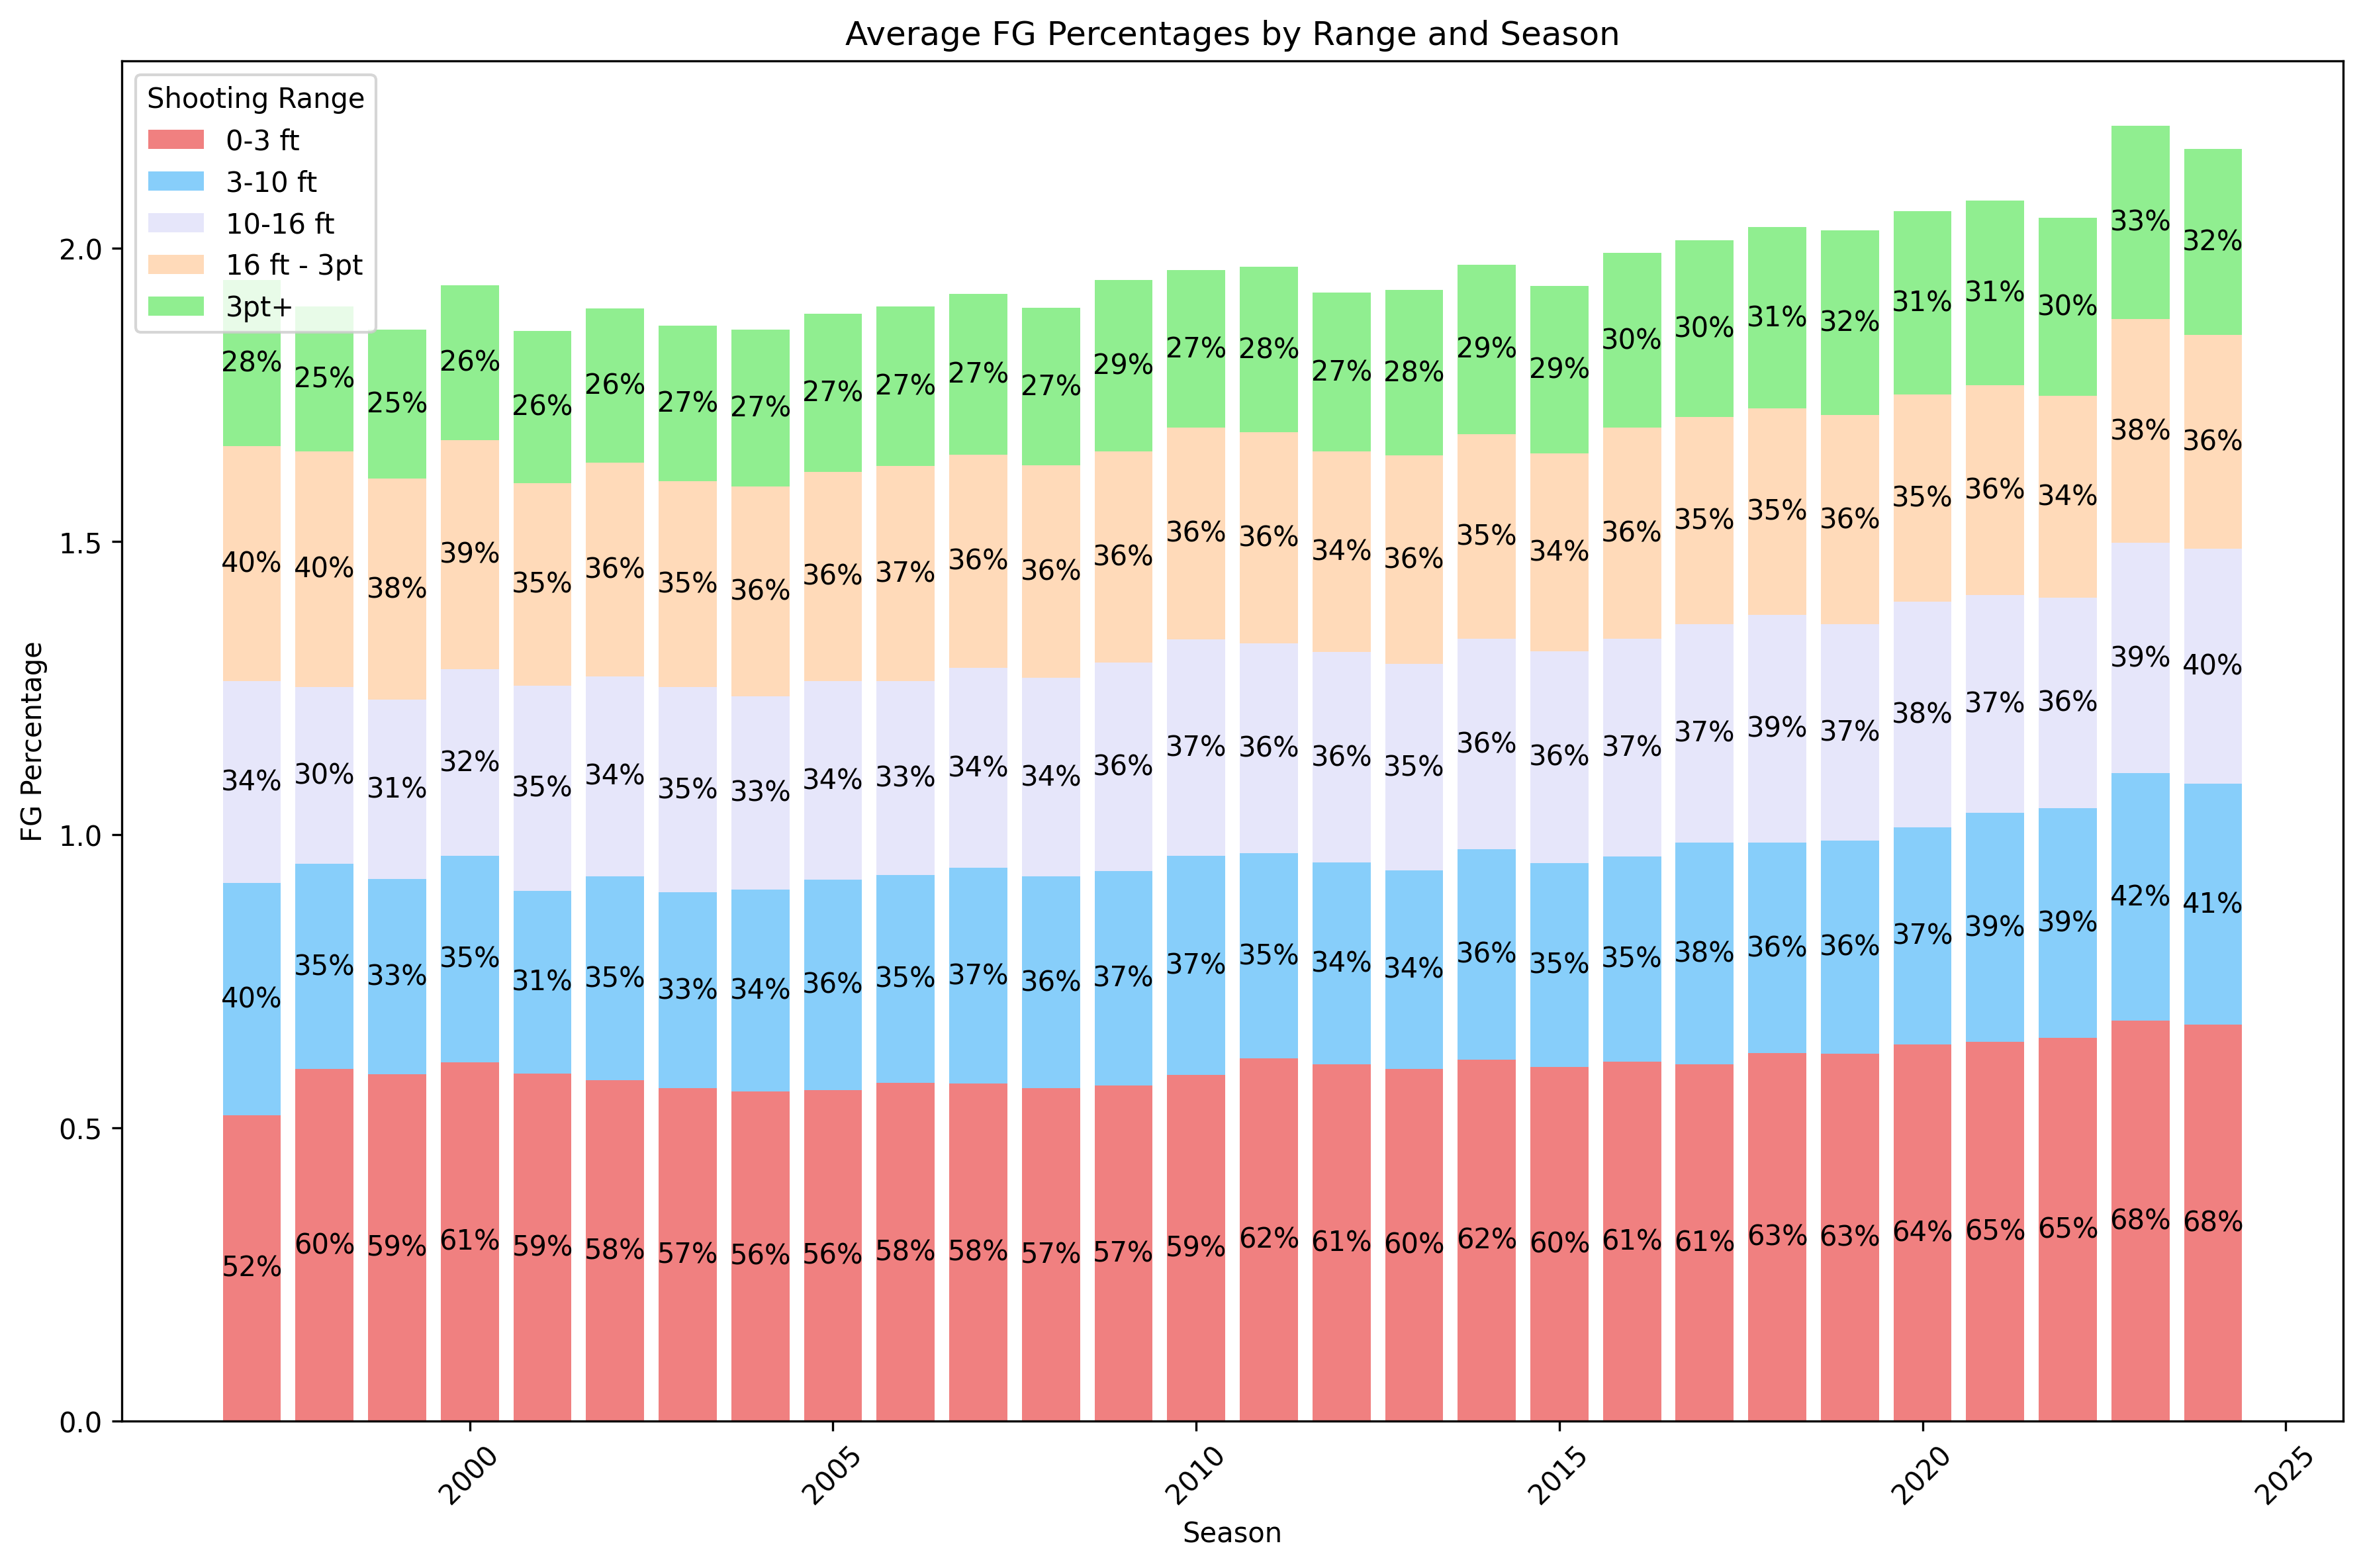

In [6]:

# กรองข้อมูลตามฤดูกาลและคำนวณค่าเฉลี่ยสำหรับแต่ละระยะการยิง (0-3 ฟุต, 3-10 ฟุต, 10-16 ฟุต, 16 ฟุต-3pt, มากกว่า 3pt)
fg_percent_data = shooting_data.groupby('season').agg({
    'fg_percent_from_x0_3_range': 'mean',
    'fg_percent_from_x3_10_range': 'mean',
    'fg_percent_from_x10_16_range': 'mean',
    'fg_percent_from_x16_3p_range': 'mean',
    'fg_percent_from_x3p_range': 'mean'
}).reset_index()

# Define the colors to use from the provided color palette
colors = ['lightcoral', 'lightskyblue', 'lavender', 'peachpuff', 'lightgreen']

# ตั้งค่า bar_width สำหรับความกว้างของกราฟแท่ง
bar_width = 0.8

# Plotting stacked bar chart for FG percentages with the specified colors
fig, ax = plt.subplots(figsize=(12, 8),dpi = 300)

# Plot stacked bar for FG percentages using specified colors
ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x0_3_range'],
       label='0-3 ft', width=bar_width, color=colors[0])
for i, v in enumerate(fg_percent_data['fg_percent_from_x0_3_range']):
    ax.text(fg_percent_data['season'][i], v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x3_10_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'], label='3-10 ft', width=bar_width, color=colors[1])
for i, v in enumerate(fg_percent_data['fg_percent_from_x3_10_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x10_16_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'] + fg_percent_data['fg_percent_from_x3_10_range'],
       label='10-16 ft', width=bar_width, color=colors[2])
for i, v in enumerate(fg_percent_data['fg_percent_from_x10_16_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + fg_percent_data['fg_percent_from_x3_10_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x16_3p_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'] + fg_percent_data['fg_percent_from_x3_10_range'] + fg_percent_data['fg_percent_from_x10_16_range'],
       label='16 ft - 3pt', width=bar_width, color=colors[3])
for i, v in enumerate(fg_percent_data['fg_percent_from_x16_3p_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + fg_percent_data['fg_percent_from_x3_10_range'][i] + fg_percent_data['fg_percent_from_x10_16_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x3p_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'] + fg_percent_data['fg_percent_from_x3_10_range'] + fg_percent_data['fg_percent_from_x10_16_range'] + fg_percent_data['fg_percent_from_x16_3p_range'],
       label='3pt+', width=bar_width, color=colors[4])
for i, v in enumerate(fg_percent_data['fg_percent_from_x3p_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + fg_percent_data['fg_percent_from_x3_10_range'][i] + fg_percent_data['fg_percent_from_x10_16_range'][i] + fg_percent_data['fg_percent_from_x16_3p_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

# Customizing chart for FG percentages
ax.set_title('Average FG Percentages by Range and Season')
ax.set_xlabel('Season')
ax.set_ylabel('FG Percentage')
ax.legend(title="Shooting Range")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

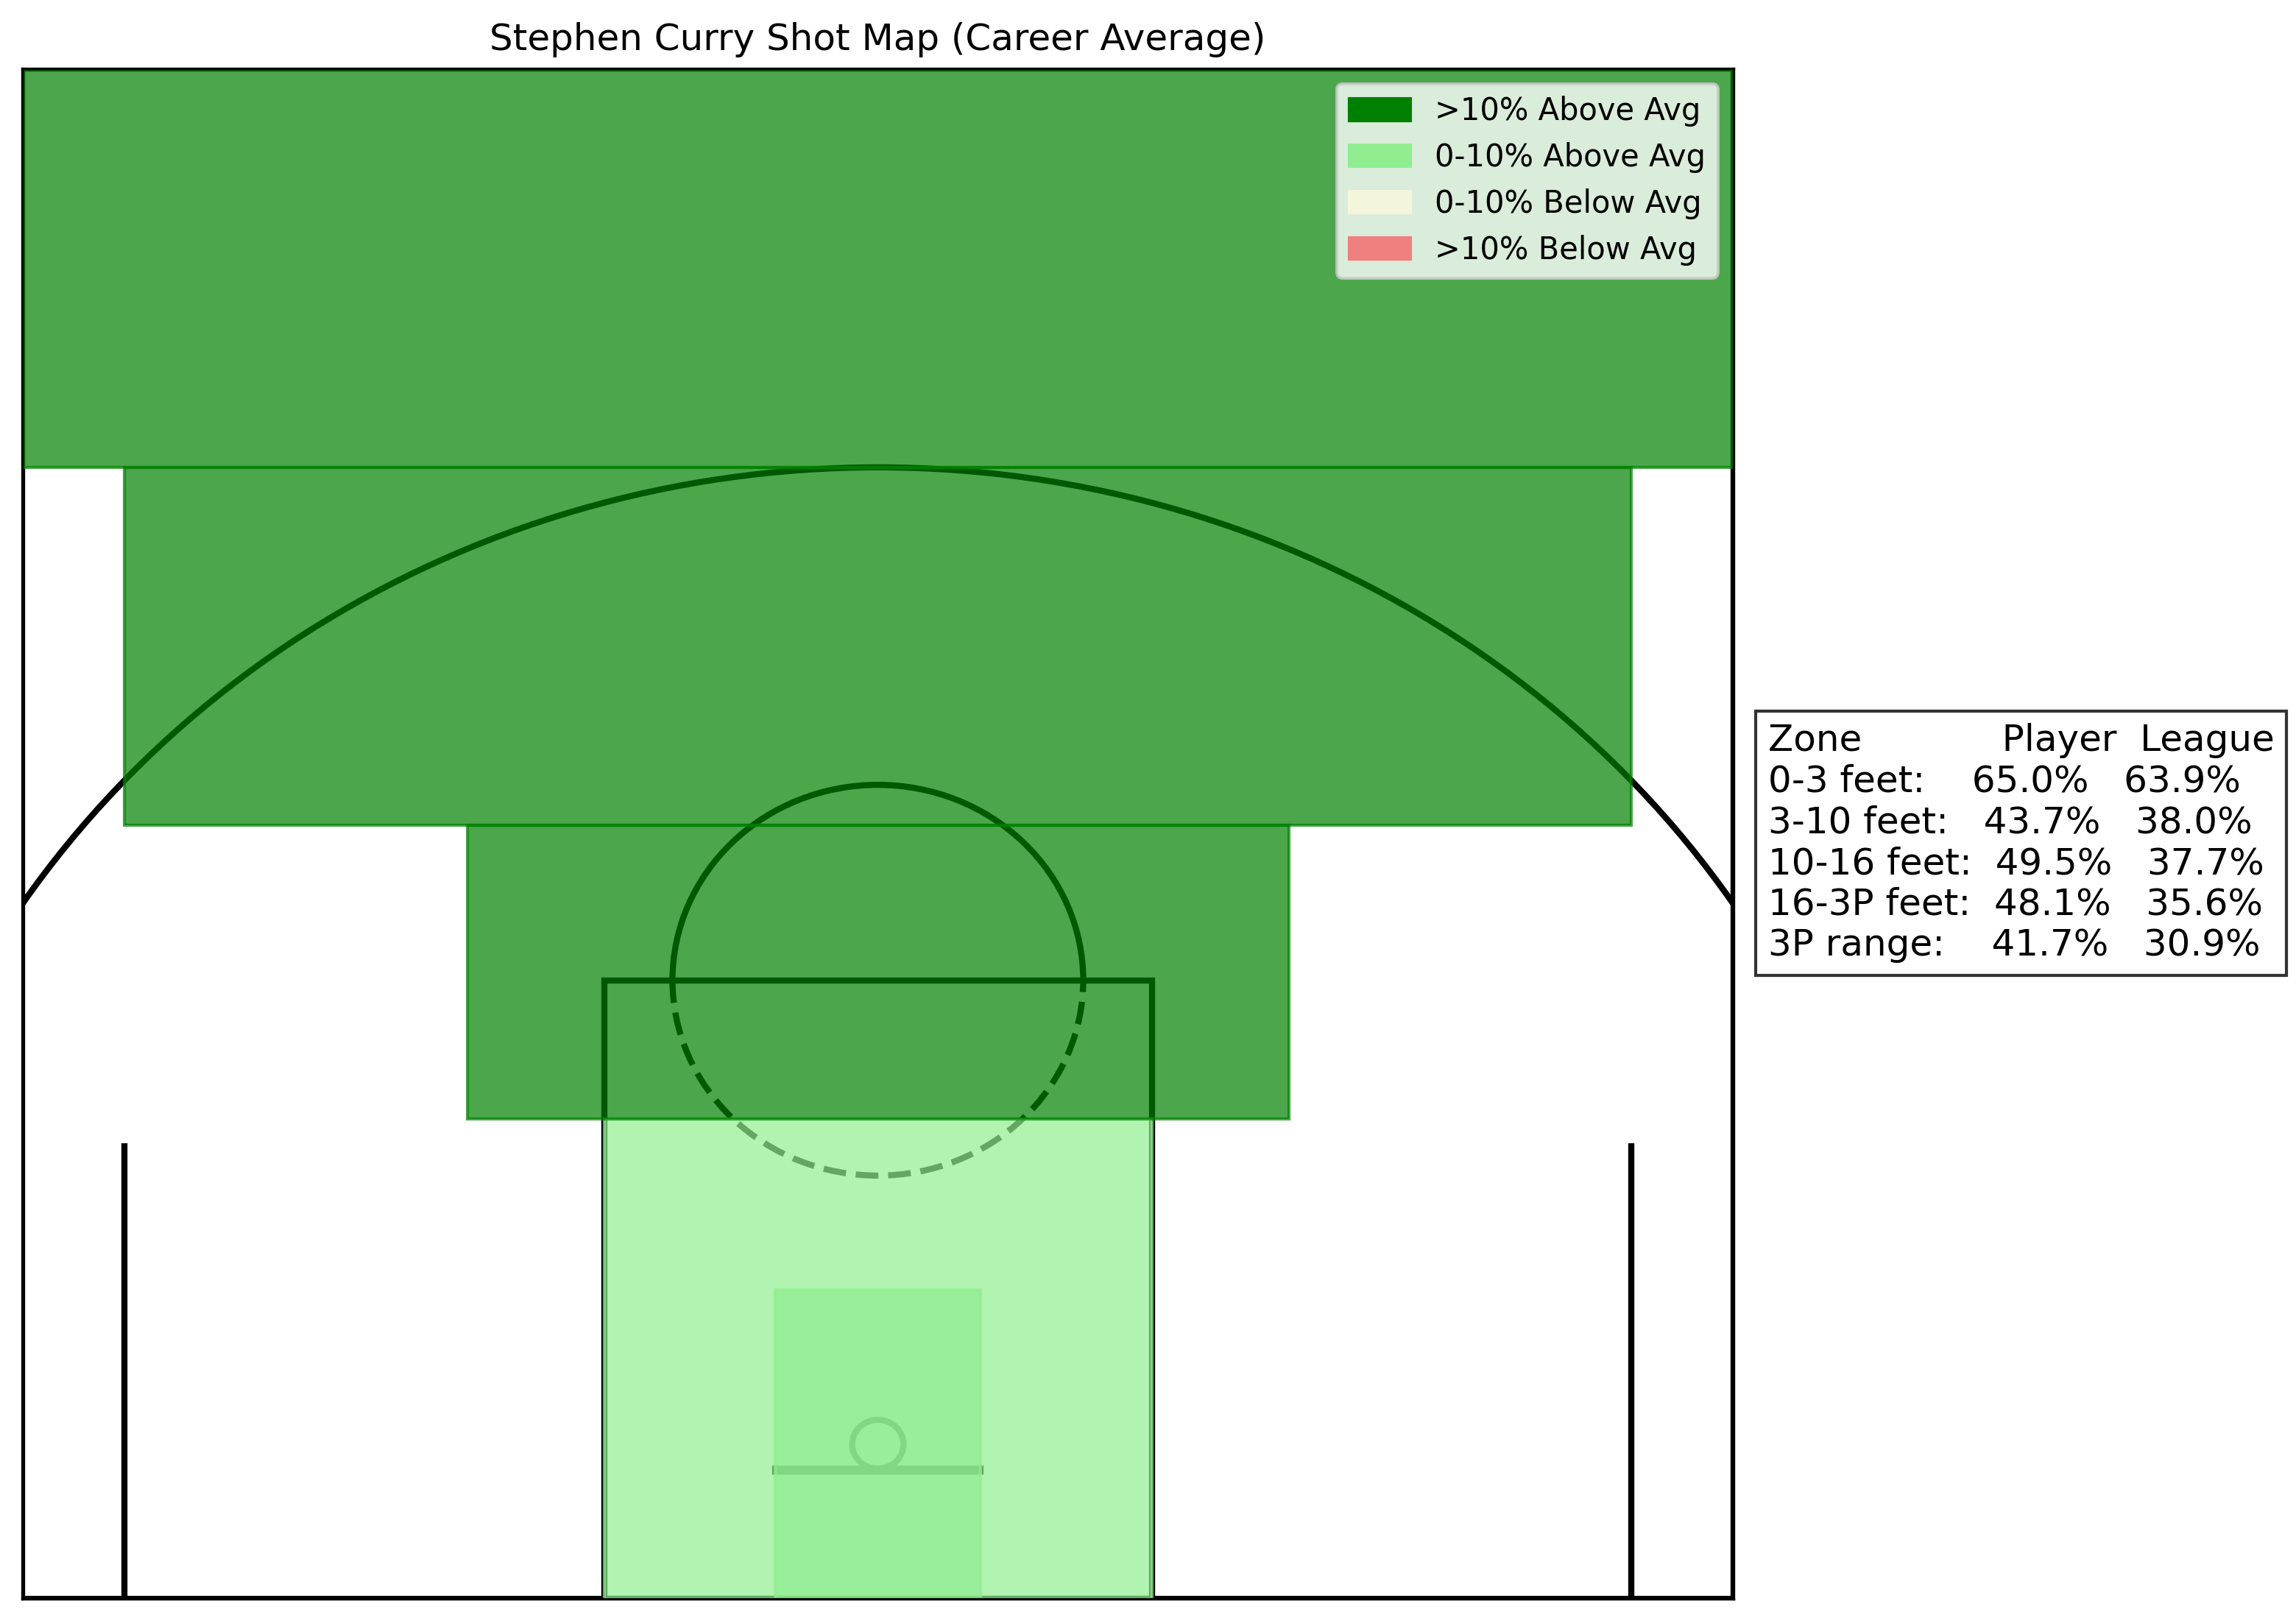

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import numpy as np
import pandas as pd

# ฟังก์ชันวาดสนามบาสเกตบอล
def draw_basketball_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # สร้างเส้นรอบสนาม (ครึ่งสนาม)
    outer_box = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
    free_throw_top = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    free_throw_bottom = Arc((0, 142.5), 120, 120, theta1=180, theta2=360, linewidth=lw, color=color, linestyle='dashed')

    # พื้นที่ Key (พื้นที่สี)
    inner_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # เส้นสำหรับ 16-3P feet
    three_point_arc = Arc((0, 0), 600, 600, theta1=22, theta2=158, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)

    # ห่วงบาส
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # กระดานหลังห่วง
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # เพิ่มองค์ประกอบของสนามเข้าไปในกราฟ
    court_elements = [outer_box, free_throw_top, free_throw_bottom, inner_box,
                      three_point_arc, corner_three_a, corner_three_b, hoop, backboard]

    for element in court_elements:
        ax.add_patch(element)

    return ax

# กำหนดพิกัดของแต่ละโซนยิงบนสนาม (ย้ายออกมานอก draw_shot_map)
zone_coords = {
    '0-3 feet': (-30, 30, -47.5, 47.5),  # ใกล้ห่วง (พื้นที่สี)
    '3-10 feet': (-80, 80, -47.5, 100),  # ใกล้ห่วง
    '10-16 feet': (-120, 120, 100, 190),  # ระยะกลาง
    '16-3P feet': (-220, 220, 190, 300),  # ระยะกลาง-ไกล
    '3P': (-250, 250, 300, 422.5)  # ระยะสามแต้ม
}

# ฟังก์ชันวาดแผนที่ยิงโดยใช้ข้อมูลเปอร์เซ็นต์การยิงในแต่ละโซน
def draw_shot_map(ax=None, player_name=None, shooting_zones=None, shooting_categories=None, player_data=None, league_averages=None):
    if ax is None:
        ax = plt.gca()

    # วาดสนามบาสเกตบอล
    draw_basketball_court(ax)

    # สร้างโซนยิงสำหรับแต่ละพื้นที่และระบายสีตามเปอร์เซ็นต์การยิง
    color_map = {
        'green': 'green',
        'light_green': 'lightgreen',
        'cream': 'beige',
        'light_red': 'lightcoral'
    }

    for zone, (x_min, x_max, y_min, y_max) in zone_coords.items():
        category = shooting_categories[zone]
        color = color_map[category]

        # สร้างรูปสี่เหลี่ยมสำหรับแต่ละโซน
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color=color, alpha=0.7)
        ax.add_patch(rect)

    # เพิ่มชื่อของกราฟ
    ax.set_title(f'{player_name} Shot Map (Career Average)')

    # แสดงค่าของเปอร์เซ็นต์การยิงของผู้เล่นและค่าเฉลี่ยของลีกในกรอบด้านข้าง
    summary_text = (
        f"Zone            Player  League\n"
        f"0-3 feet:    {player_data['fg_percent_from_x0_3_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x0_3_range']*100:.1f}%\n"
        f"3-10 feet:   {player_data['fg_percent_from_x3_10_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3_10_range']*100:.1f}%\n"
        f"10-16 feet:  {player_data['fg_percent_from_x10_16_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x10_16_range']*100:.1f}%\n"
        f"16-3P feet:  {player_data['fg_percent_from_x16_3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x16_3p_range']*100:.1f}%\n"
        f"3P range:    {player_data['fg_percent_from_x3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3p_range']*100:.1f}%"
    )
    plt.text(260, 150, summary_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # เพิ่มคำอธิบายความหมายของสี
    legend_elements = [
        Rectangle((0, 0), 1, 1, color=color_map['green'], label='>10% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_green'], label='0-10% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['cream'], label='0-10% Below Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_red'], label='>10% Below Avg')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    return ax

# โหลดข้อมูลจากไฟล์ CSV ที่ผู้ใช้ได้อัปโหลด
file_path = 'Player Shooting.csv'  # เปลี่ยนเป็นชื่อไฟล์ของคุณ
shooting_data = pd.read_csv(file_path)

# แปลงคอลัมน์ 'season' เป็นจำนวนเต็ม
shooting_data['season'] = shooting_data['season'].astype(int)

# กรองข้อมูลสำหรับ 10 ฤดูกาลล่าสุด (2015-2024)
last_10_seasons = shooting_data[shooting_data['season'] >= 2015]

# เลือกเฉพาะคอลัมน์เปอร์เซ็นต์การยิง
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]
shooting_data = shooting_data[['player', 'season'] + shooting_zones_columns]  # เลือกคอลัมน์ที่ต้องการ

# คำนวณค่าเฉลี่ยของลีกสำหรับโซนการยิงในช่วง 10 ปีล่าสุด
league_averages_last_10_years = last_10_seasons[shooting_zones_columns].mean()

# ฟังก์ชันสำหรับกำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงตามความแตกต่างจากค่าเฉลี่ยของลีก
def categorize_shooting_percentage(player_percent, league_avg):
    diff = player_percent - league_avg
    if diff > 0.10:
        return 'green'
    elif 0 < diff <= 0.10:
        return 'light_green'
    elif -0.10 <= diff < 0:
        return 'cream'
    else:
        return 'light_red'

# สร้างแผนที่การยิงสำหรับผู้เล่นที่ระบุ
player_name = "Stephen Curry"  # เปลี่ยนชื่อผู้เล่นตามที่ต้องการ

# คำนวณค่าเฉลี่ยของผู้เล่นทุกปี
player_data = shooting_data[shooting_data['player'] == player_name].groupby('player').mean()

# กำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงสำหรับแต่ละโซนการยิง
shooting_categories = {}

# Map ชื่อโซนกับชื่อคอลัมน์
zone_to_column = {
    '0-3 feet': 'fg_percent_from_x0_3_range',
    '3-10 feet': 'fg_percent_from_x3_10_range',
    '10-16 feet': 'fg_percent_from_x10_16_range',
    '16-3P feet': 'fg_percent_from_x16_3p_range',
    '3P': 'fg_percent_from_x3p_range'
}

for zone in zone_coords:  # ใช้ zone_coords เพราะเป็นชื่อโซน
    column_name = zone_to_column[zone]  # ดึงชื่อคอลัมน์ที่ตรงกับโซน
    league_avg = league_averages_last_10_years[column_name]
    player_percent = player_data[column_name].iloc[0]  # ดึงค่าเฉลี่ยของผู้เล่นในคอลัมน์นี้
    shooting_categories[zone] = categorize_shooting_percentage(player_percent, league_avg)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(10, 9),dpi = 300)

# วาดแผนที่ยิงของผู้เล่นที่เลือก
draw_shot_map(ax=ax,
               player_name=player_name,
               shooting_zones=None,
               shooting_categories=shooting_categories,
               player_data=player_data,
               league_averages=league_averages_last_10_years)

# กำหนดขอบเขตของกราฟ
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)

# ซ่อนแกน
ax.set_xticks([])
ax.set_yticks([])

# แสดงกราฟ
plt.show()

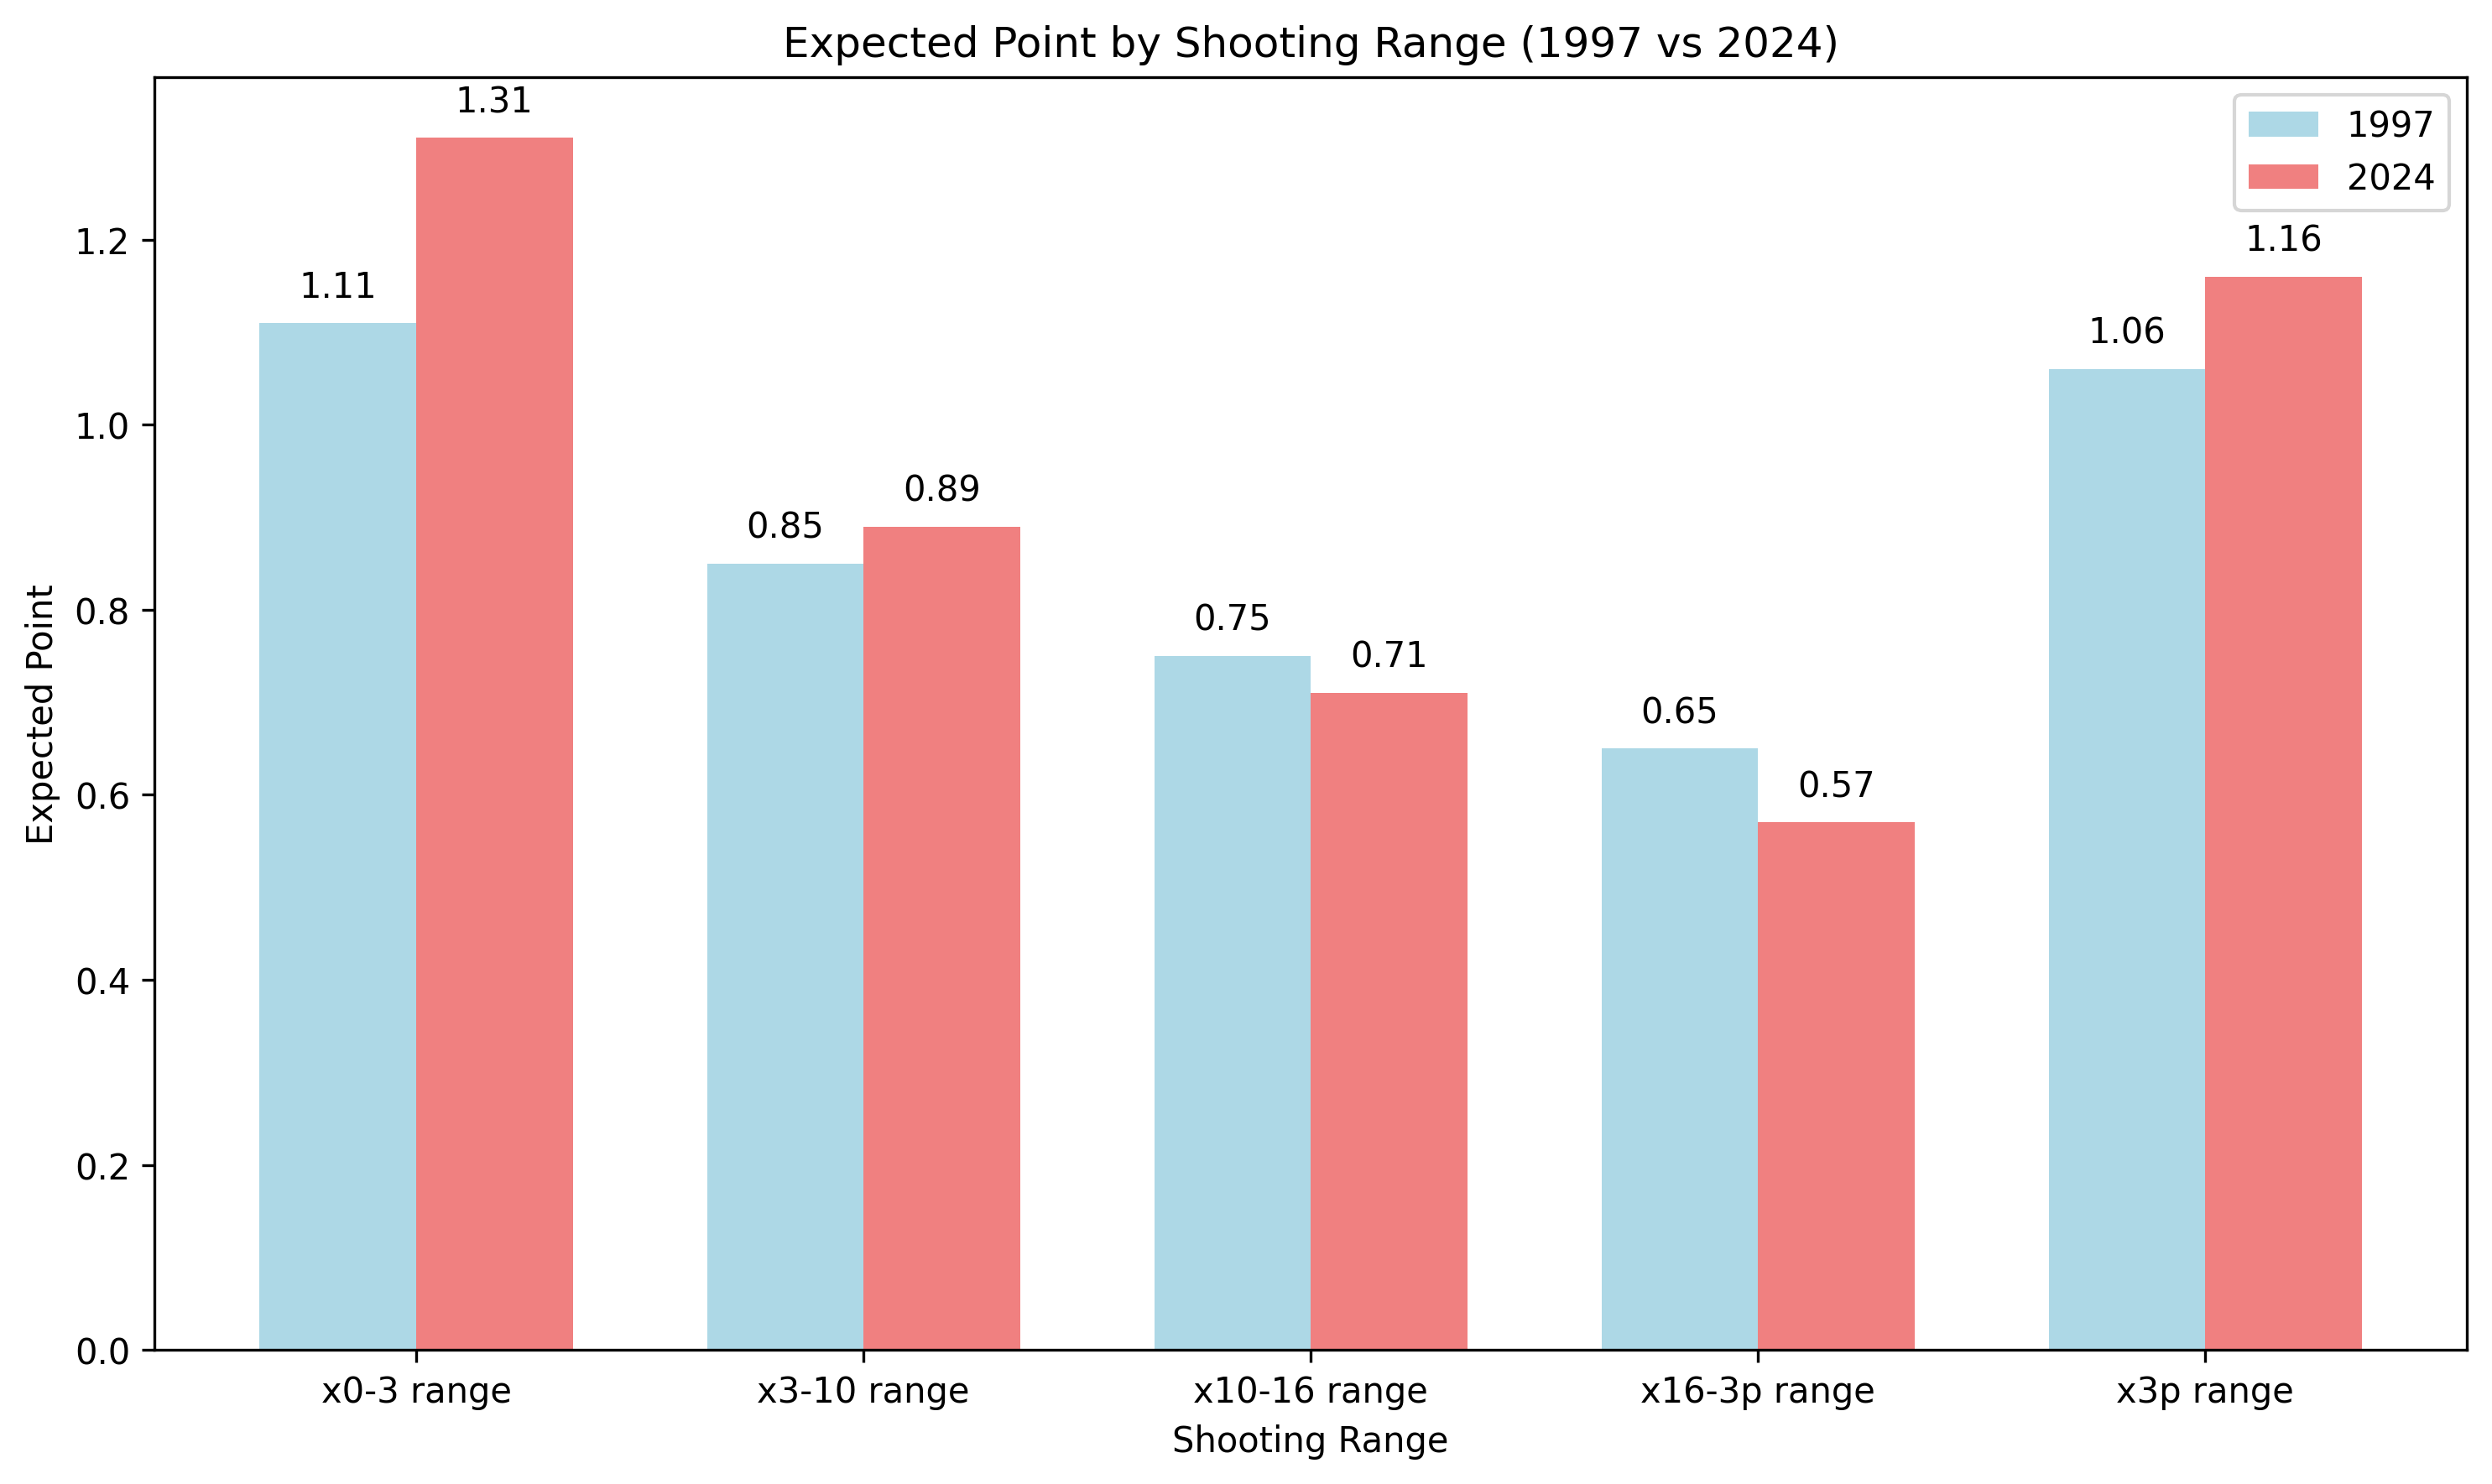

In [7]:


# Create a mock version of 'shooting_data' for demonstration
data = {
    'season': [1997, 1997, 2024, 2024],
    'fg_percent_from_x0_3_range': [0.55, 0.56, 0.65, 0.66],
    'fg_percent_from_x3_10_range': [0.42, 0.43, 0.44, 0.45],
    'fg_percent_from_x10_16_range': [0.37, 0.38, 0.35, 0.36],
    'fg_percent_from_x16_3p_range': [0.32, 0.33, 0.28, 0.29],
    'fg_percent_from_x3p_range': [0.35, 0.36, 0.38, 0.39]
}

# Creating a DataFrame that mimics the shooting_data
shooting_data = pd.DataFrame(data)

# Define the point multipliers for the expected points calculation
point_multipliers = {
    'x0_3_range': 2,
    'x3_10_range': 2,
    'x10_16_range': 2,
    'x16_3p_range': 2,
    'x3p_range': 3
}

# Filter the data for the 1997 and 2024 seasons
df_1997_2024 = shooting_data[(shooting_data['season'].isin([1997, 2024]))][[
    'season',
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]]

# List of shooting ranges
ranges = ['x0_3_range', 'x3_10_range', 'x10_16_range', 'x16_3p_range', 'x3p_range']

# Function to calculate expected points
def calculate_expected_points(df, ranges, point_multipliers):
    for r in ranges:
        df[f'expected_points_{r}'] = df[f'fg_percent_from_{r}'] * point_multipliers[r]
    return df

# Calculate the average expected points for 1997 and 2024 seasons
season_avg = calculate_expected_points(df_1997_2024.groupby('season').mean().reset_index(), ranges, point_multipliers)

# Create the DataFrame that will be used for the bar chart
expected_points_pandas = pd.DataFrame({
    'Expected Points': ['x0-3 range', 'x3-10 range', 'x10-16 range', 'x16-3p range', 'x3p range'],
    '1997': season_avg[season_avg['season'] == 1997][[f'expected_points_{r}' for r in ranges]].values.flatten().round(2),
    '2024': season_avg[season_avg['season'] == 2024][[f'expected_points_{r}' for r in ranges]].values.flatten().round(2)
})

# Data for plotting
categories = expected_points_pandas['Expected Points']
values_1997 = expected_points_pandas['1997']
values_2024 = expected_points_pandas['2024']

# Bar chart settings
bar_width = 0.35
index = range(len(categories))

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6),dpi = 300)

# Create bars for 1997 and 2024
bars_1997 = ax.bar(index, values_1997, bar_width, label='1997', color='lightblue')
bars_2024 = ax.bar([i + bar_width for i in index], values_2024, bar_width, label='2024', color='lightcoral')

# Adding the labels
ax.set_xlabel('Shooting Range')
ax.set_ylabel('Expected Point')
ax.set_title('Expected Point by Shooting Range (1997 vs 2024)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)

# Adding the numbers on top of each bar
for i, v in enumerate(values_1997):
    ax.text(i, v + 0.02, str(v), ha='center', va='bottom')
for i, v in enumerate(values_2024):
    ax.text(i + bar_width, v + 0.02, str(v), ha='center', va='bottom')

# Adding the legend
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


<ipython-input-13-af9d1437f9c4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['x3p_percent'] = (filtered_data['x3p'] / filtered_data['x3pa']) * 100
<ipython-input-13-af9d1437f9c4>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_x3p_percent_per_season_from_1990 = totals_data[totals_data['season'] >= 1990].groupby('season').apply(


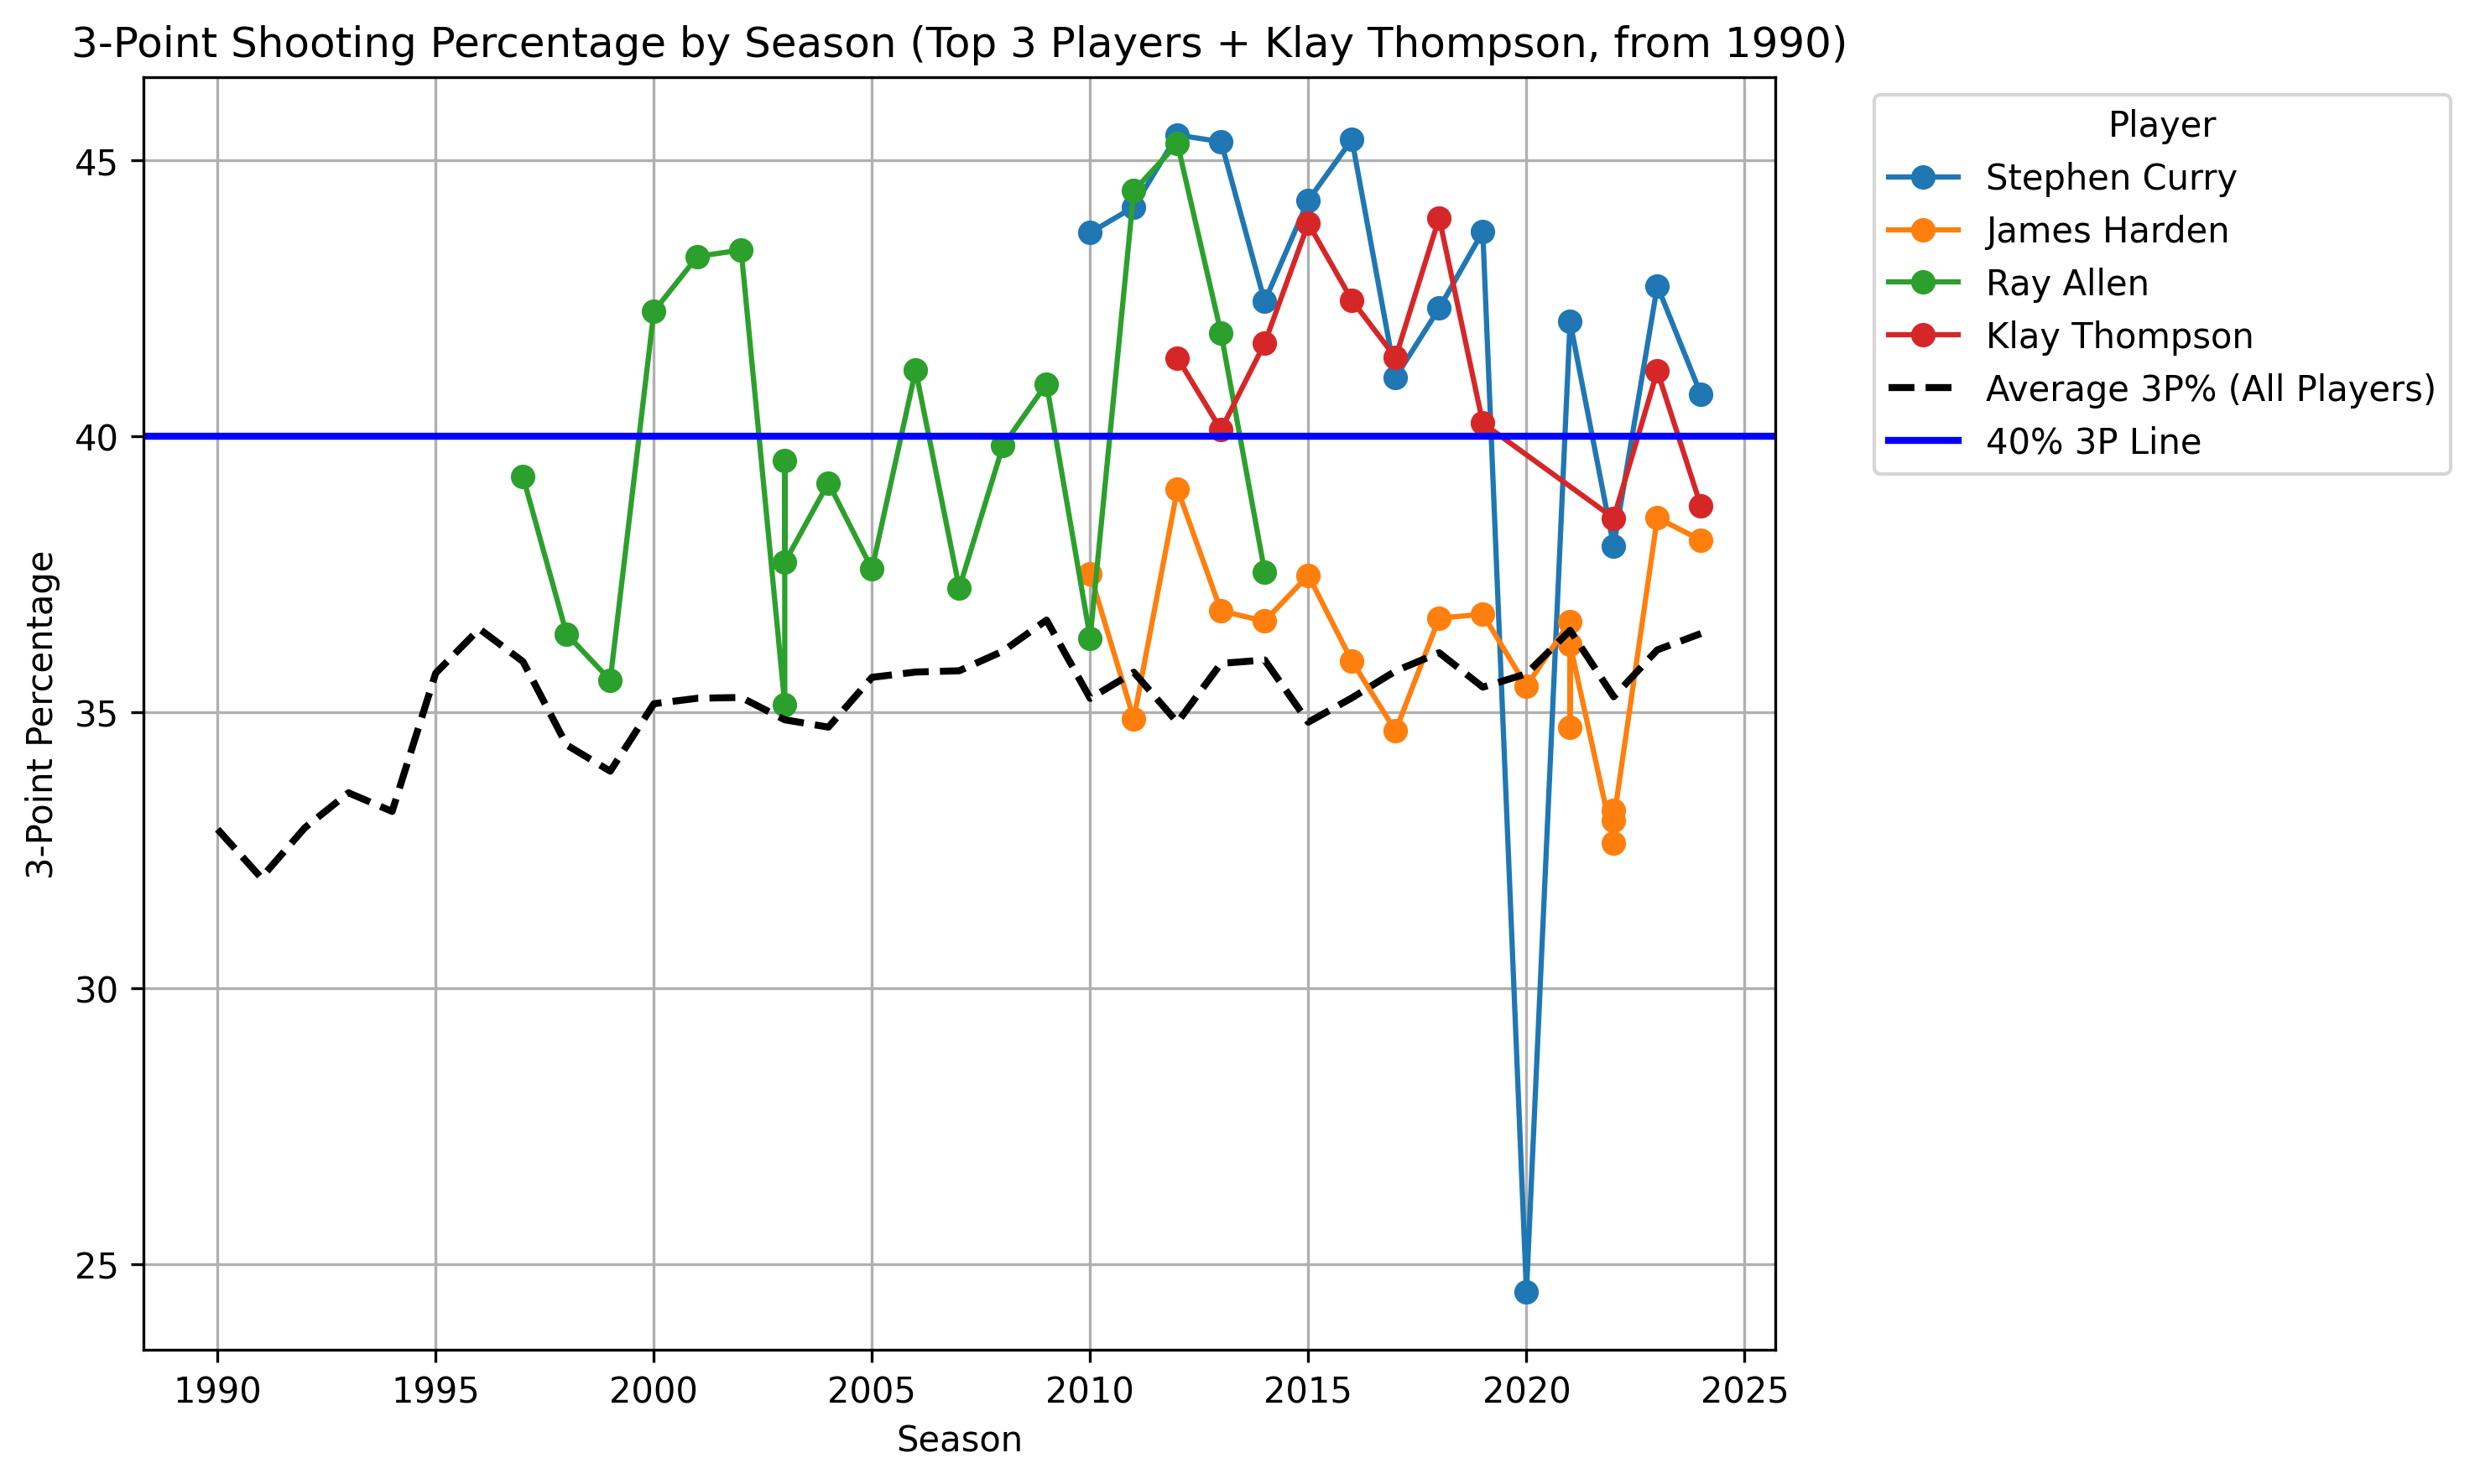

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV
shooting_data = pd.read_csv('Player Shooting.csv')
totals_data = pd.read_csv('Player Totals.csv')

# สร้างคอลัมน์ใหม่ 'Player-Season' โดยรวมชื่อผู้เล่นกับฤดูกาล
totals_data['Player-Season'] = totals_data['player'] + '-' + totals_data['season'].astype(str)

# รวมจำนวนครั้งที่ทำ 3-Point สำเร็จของผู้เล่นทั้งหมด
player_3p_totals = totals_data.groupby('player')['x3p'].sum()

# รวมจำนวนครั้งที่ยิง 3-Point ทั้งหมดของผู้เล่นแต่ละคน
player_3pa_totals = totals_data.groupby('player')['x3pa'].sum()

# คำนวณเปอร์เซ็นต์การยิง 3-Point (x3p_percent = x3p / x3pa * 100)
player_x3p_percent = (player_3p_totals / player_3pa_totals) * 100

# รวมจำนวน 3-Point ที่ทำสำเร็จและเปอร์เซ็นต์การยิงลงใน DataFrame
top_10_by_total_x3p_with_percent = pd.DataFrame({
    'player': player_3p_totals.index,
    'x3p': player_3p_totals.values,
    'x3p_percent': player_x3p_percent.values
}).sort_values(by='x3p', ascending=False).head(10)

# Filter the data to include only seasons starting from 1990
filtered_data = totals_data[totals_data['season'] >= 1990]

# Calculate 3-point percentage for each player in each season
filtered_data['x3p_percent'] = (filtered_data['x3p'] / filtered_data['x3pa']) * 100

# Calculate the average 3-point percentage for all players across all seasons starting from 1990
average_x3p_percent_per_season_from_1990 = totals_data[totals_data['season'] >= 1990].groupby('season').apply(
    lambda x: (x['x3p'].sum() / x['x3pa'].sum()) * 100 if x['x3pa'].sum() != 0 else 0
)

# Filter the top 3 players plus Klay Thompson
top_players = top_10_by_total_x3p_with_percent['player'].head(3).tolist() + ['Klay Thompson']

# Filter the data to include only the selected players
filtered_data_selected_players = filtered_data[filtered_data['player'].isin(top_players)]

# Plot with markers for the selected players (top 3 + Klay Thompson)
plt.figure(figsize=(10, 6),dpi = 300)

for player in top_players:
    player_data = filtered_data_selected_players[filtered_data_selected_players['player'] == player]
    plt.plot(player_data['season'], player_data['x3p_percent'], marker='o', label=player)

# Plot the average 3-point shooting percentage across all players per season (from 1990)
plt.plot(average_x3p_percent_per_season_from_1990.index, average_x3p_percent_per_season_from_1990,
         linestyle='--', color='black', label='Average 3P% (All Players)', linewidth=2)

# เพิ่มเส้นสีเขียวที่ค่า 40% สำหรับ 3-Point Shooting Percentage
plt.axhline(y=40, color='blue', linestyle='-', linewidth=2, label='40% 3P Line')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('3-Point Percentage')
plt.title('3-Point Shooting Percentage by Season (Top 3 Players + Klay Thompson, from 1990)')
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to fit the legend better
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-9-d341132a7f71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_summaries_2024['Win rate'] = team_summaries_2024['w'] / 82


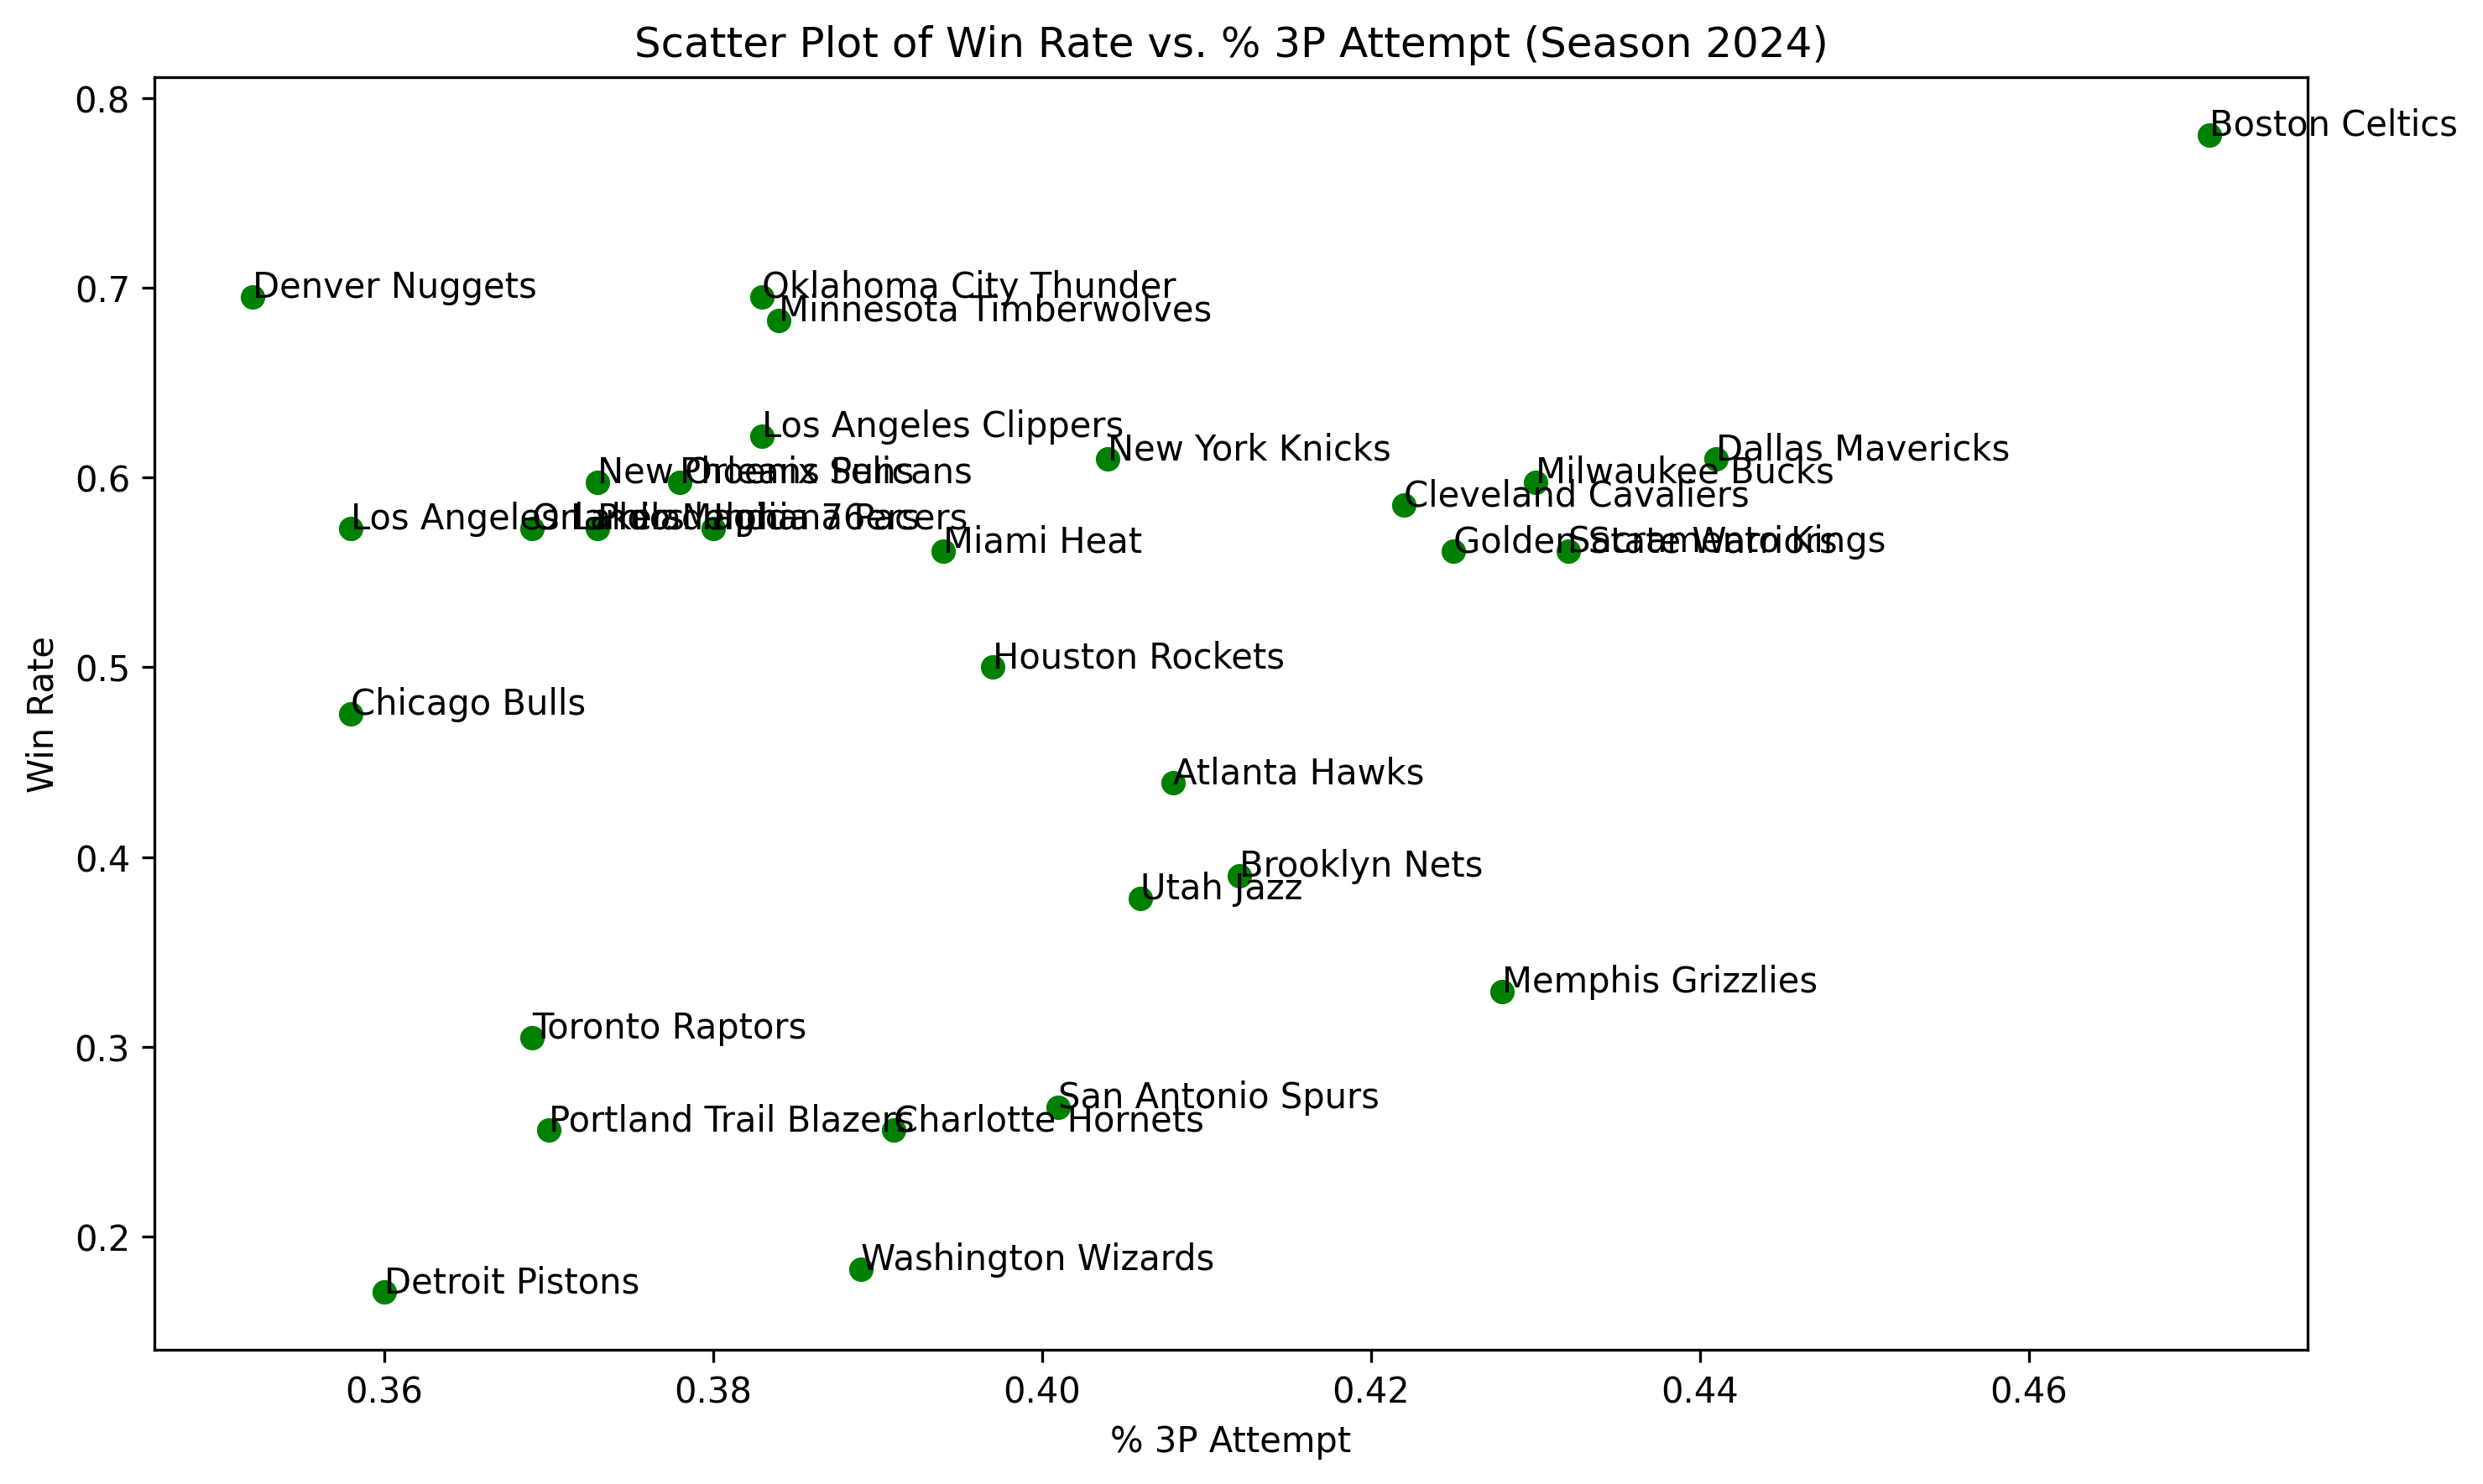

In [9]:
# Filter the data for the 2024 season
team_summaries_2024 = team_summaries[team_summaries['season'] == 2024]

# Calculate the "Win rate" from the 'w' column (win rate = w / 82)
team_summaries_2024['Win rate'] = team_summaries_2024['w'] / 82

# Create the scatter plot with Y-axis as "Win rate" and X-axis as "xp3_ar", with teams labeled
plt.figure(figsize=(10, 6),dpi = 300)
plt.scatter(team_summaries_2024['x3p_ar'], team_summaries_2024['Win rate'], color='green')

# Label each point with the team name
for i, team in enumerate(team_summaries_2024['team']):
    plt.text(team_summaries_2024['x3p_ar'].iloc[i], team_summaries_2024['Win rate'].iloc[i], team)

# Add labels and title
plt.xlabel('% 3P Attempt')
plt.ylabel('Win Rate')
plt.title('Scatter Plot of Win Rate vs. % 3P Attempt (Season 2024)')

# Display the scatter plot
plt.tight_layout()
plt.show()


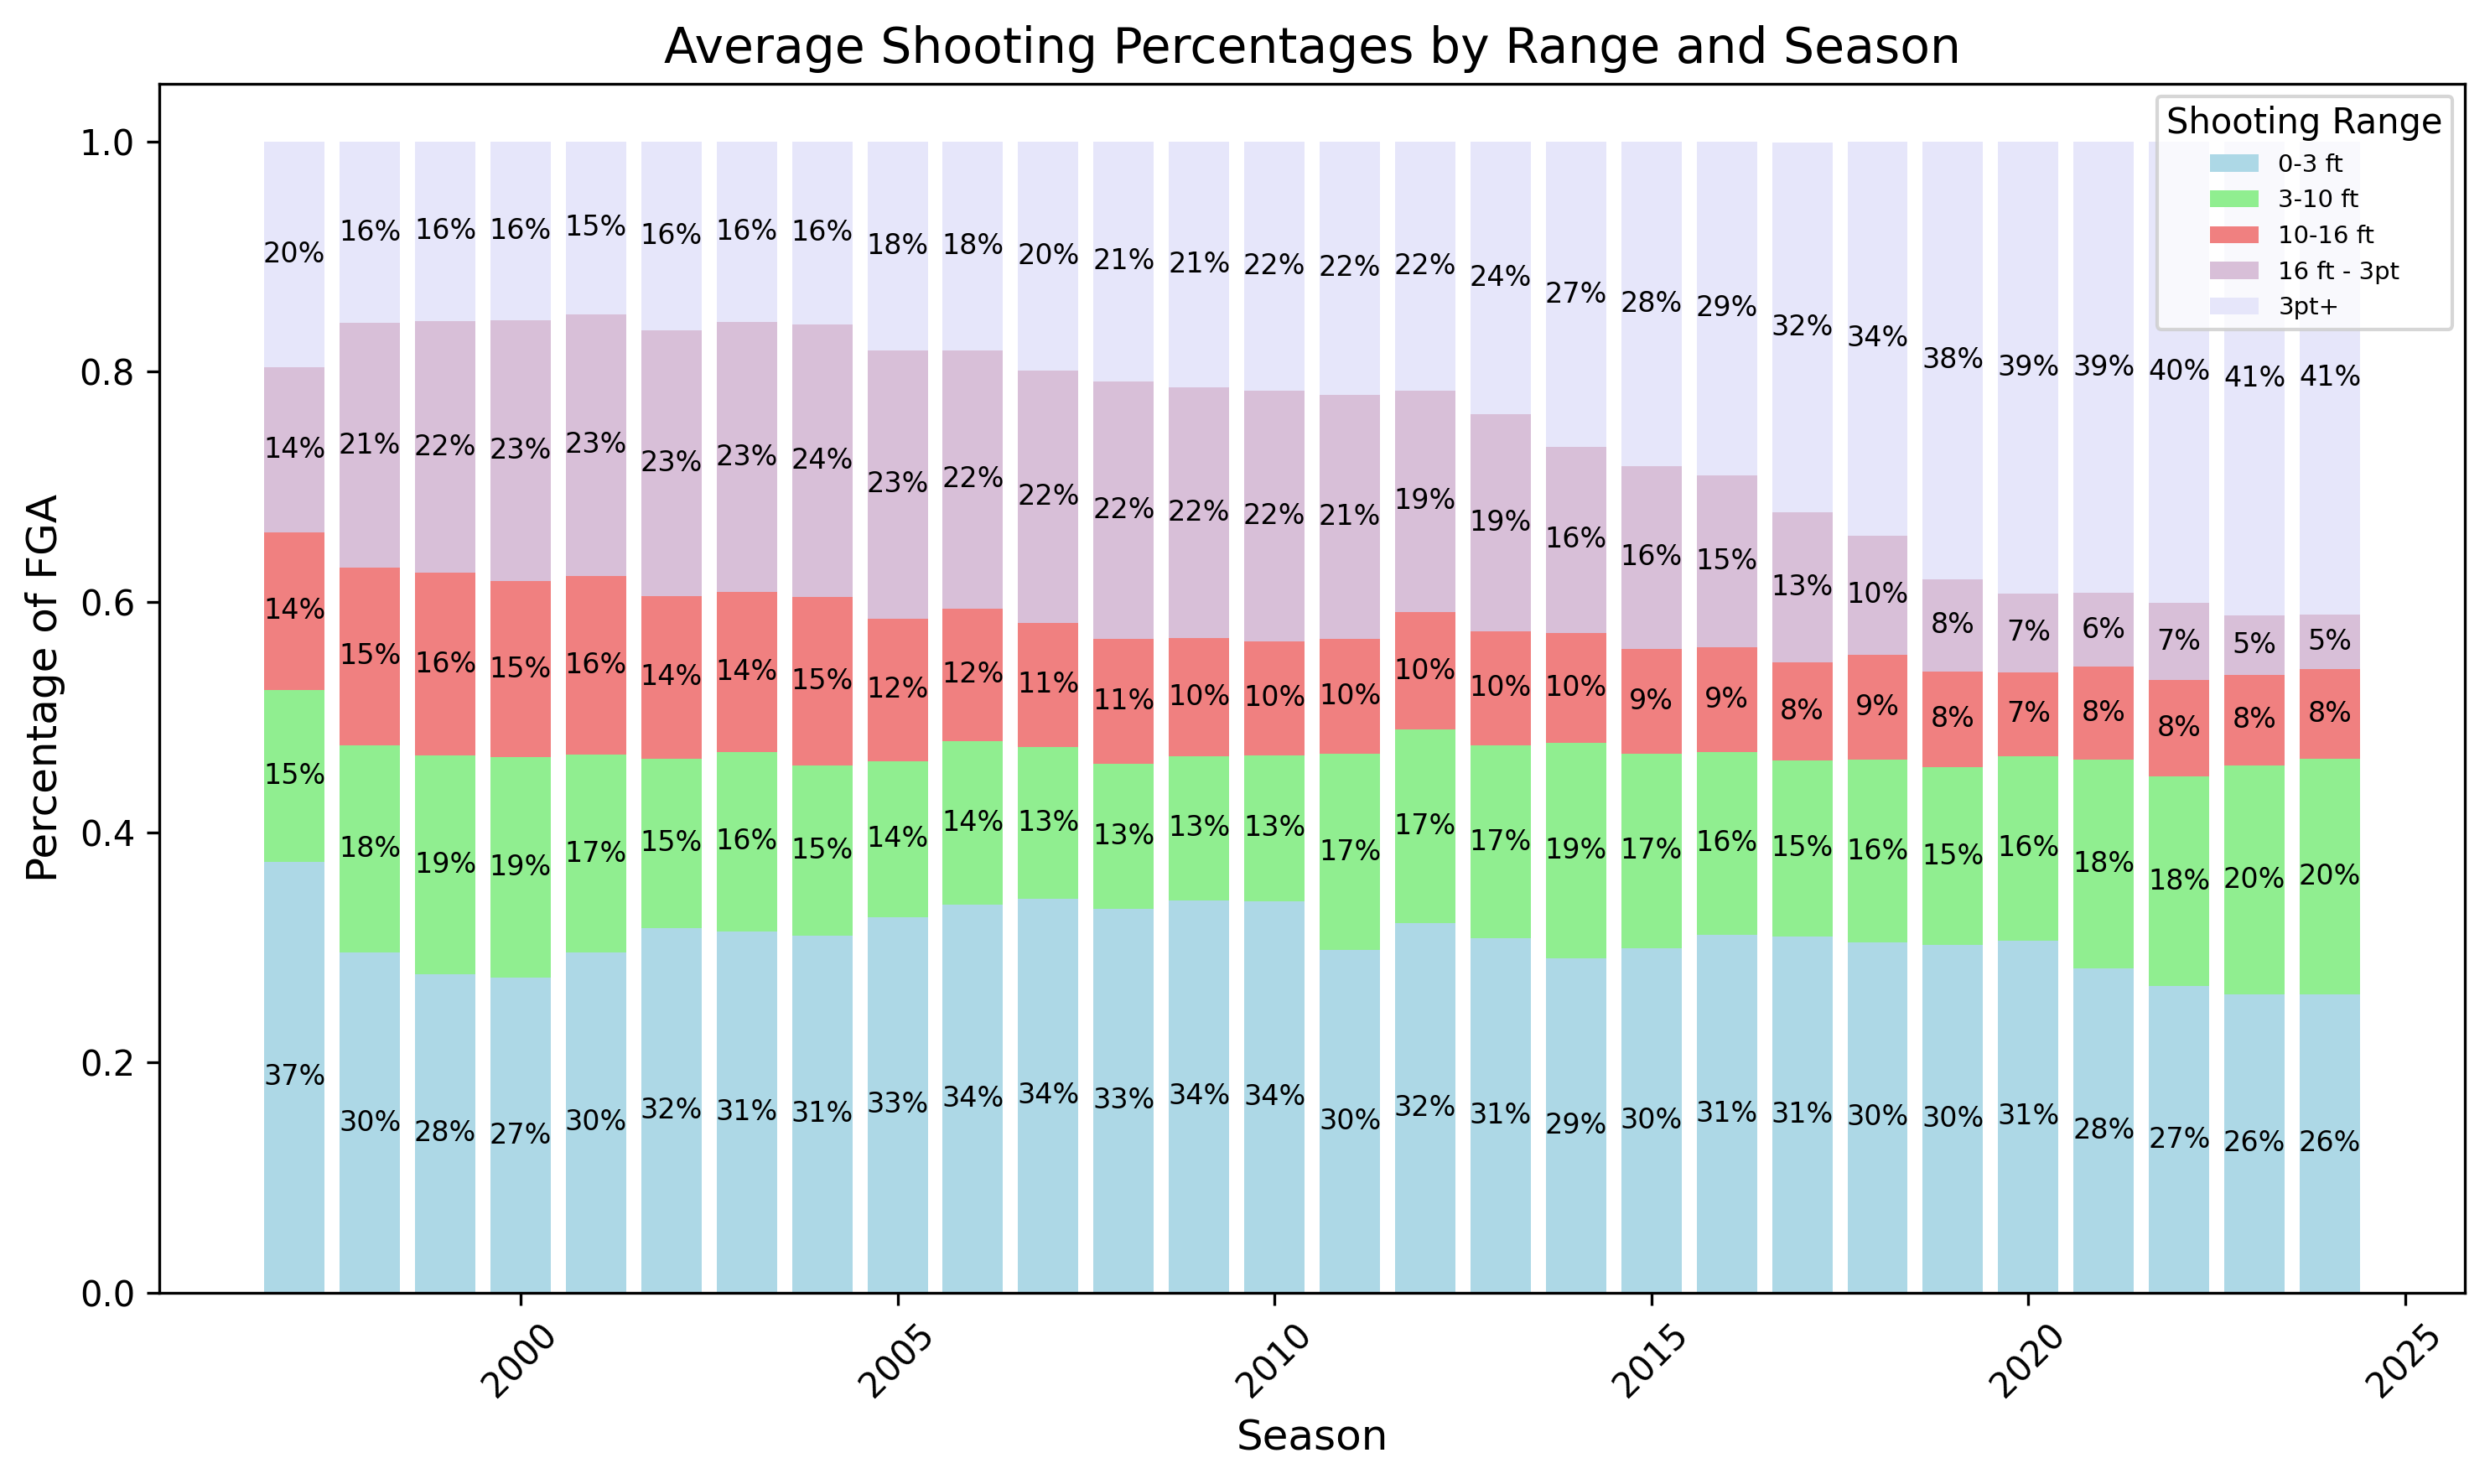

In [10]:
import matplotlib.pyplot as plt

# Plotting stacked bar chart with modified figure size and adjusted font size
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Define bar width
bar_width = 0.8
text_size = 8  # Adjusted text size for better readability

# Plot stacked bar with specific colors for each range
ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x0_3_range'],
       label='0-3 ft', width=bar_width, color='lightblue')
for i, v in enumerate(stacked_data['percent_fga_from_x0_3_range']):
    ax.text(stacked_data['season'][i], v / 2, f'{v:.0%}', ha='center', va='center', fontsize=text_size)

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x3_10_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'], label='3-10 ft', width=bar_width, color='lightgreen')
for i, v in enumerate(stacked_data['percent_fga_from_x3_10_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center', fontsize=text_size)

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x10_16_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'],
       label='10-16 ft', width=bar_width, color='lightcoral')
for i, v in enumerate(stacked_data['percent_fga_from_x10_16_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center', fontsize=text_size)

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x16_3p_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'] + stacked_data['percent_fga_from_x10_16_range'],
       label='16 ft - 3pt', width=bar_width, color='thistle')
for i, v in enumerate(stacked_data['percent_fga_from_x16_3p_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + stacked_data['percent_fga_from_x10_16_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center', fontsize=text_size)

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x3p_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'] + stacked_data['percent_fga_from_x10_16_range'] + stacked_data['percent_fga_from_x16_3p_range'],
       label='3pt+', width=bar_width, color='lavender')
for i, v in enumerate(stacked_data['percent_fga_from_x3p_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + stacked_data['percent_fga_from_x10_16_range'][i] + stacked_data['percent_fga_from_x16_3p_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center', fontsize=text_size)

# Customizing chart
ax.set_title('Average Shooting Percentages by Range and Season', fontsize=14)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Percentage of FGA', fontsize=12)

# Display the legend
ax.legend(title="Shooting Range", fontsize=7)

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()


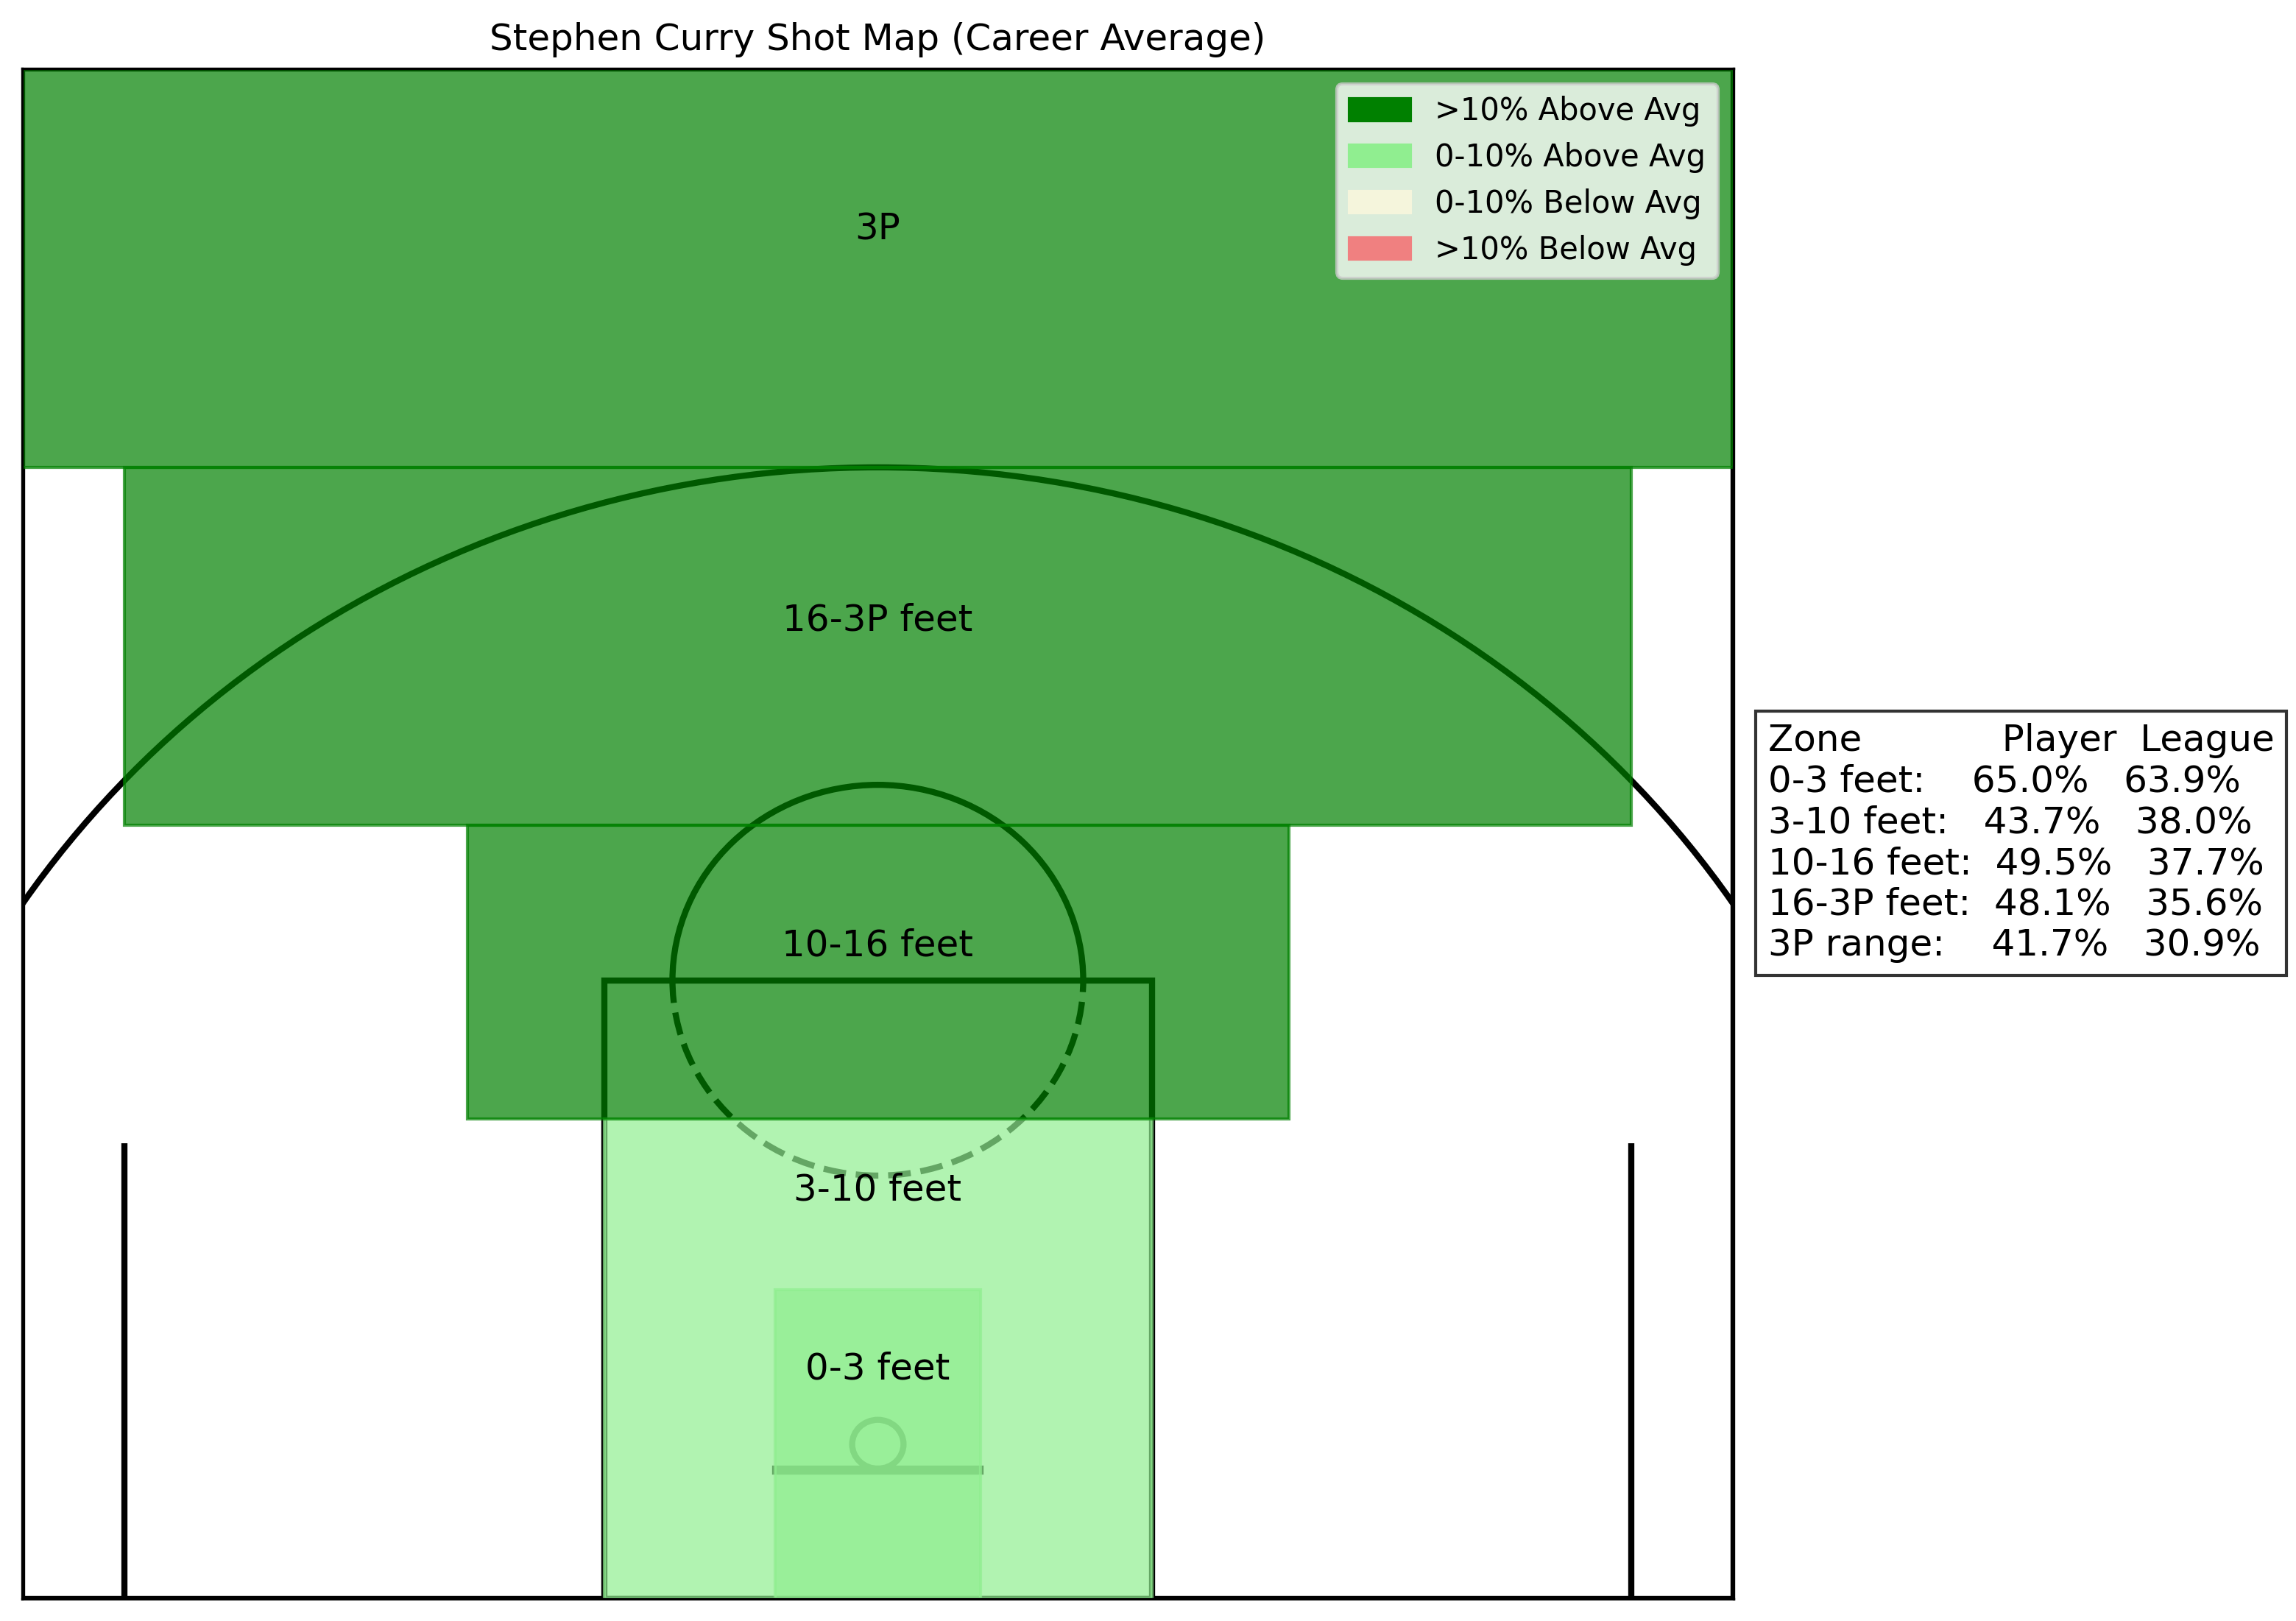

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import numpy as np
import pandas as pd

# ฟังก์ชันวาดสนามบาสเกตบอล
def draw_basketball_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # สร้างเส้นรอบสนาม (ครึ่งสนาม)
    outer_box = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
    free_throw_top = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    free_throw_bottom = Arc((0, 142.5), 120, 120, theta1=180, theta2=360, linewidth=lw, color=color, linestyle='dashed')

    # พื้นที่ Key (พื้นที่สี)
    inner_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # เส้นสำหรับ 16-3P feet
    three_point_arc = Arc((0, 0), 600, 600, theta1=22, theta2=158, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)

    # ห่วงบาส
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # กระดานหลังห่วง
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # เพิ่มองค์ประกอบของสนามเข้าไปในกราฟ
    court_elements = [outer_box, free_throw_top, free_throw_bottom, inner_box,
                      three_point_arc, corner_three_a, corner_three_b, hoop, backboard]

    for element in court_elements:
        ax.add_patch(element)

    return ax

# กำหนดพิกัดของแต่ละโซนยิงบนสนาม (ย้ายออกมานอก draw_shot_map)
zone_coords = {
    '0-3 feet': (-30, 30, -47.5, 47.5),  # ใกล้ห่วง (พื้นที่สี)
    '3-10 feet': (-80, 80, -47.5, 100),  # ใกล้ห่วง
    '10-16 feet': (-120, 120, 100, 190),  # ระยะกลาง
    '16-3P feet': (-220, 220, 190, 300),  # ระยะกลาง-ไกล
    '3P': (-250, 250, 300, 422.5)  # ระยะสามแต้ม
}

# ฟังก์ชันวาดแผนที่ยิงโดยใช้ข้อมูลเปอร์เซ็นต์การยิงในแต่ละโซน
def draw_shot_map(ax=None, player_name=None, shooting_zones=None, shooting_categories=None, player_data=None, league_averages=None):
    if ax is None:
        ax = plt.gca()

    # วาดสนามบาสเกตบอล
    draw_basketball_court(ax)

    # สร้างโซนยิงสำหรับแต่ละพื้นที่และระบายสีตามเปอร์เซ็นต์การยิง
    color_map = {
        'green': 'green',
        'light_green': 'lightgreen',
        'cream': 'beige',
        'light_red': 'lightcoral'
    }

    for zone, (x_min, x_max, y_min, y_max) in zone_coords.items():
        category = shooting_categories[zone]
        color = color_map[category]

        # สร้างรูปสี่เหลี่ยมสำหรับแต่ละโซน
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color=color, alpha=0.7)
        ax.add_patch(rect)

    # เพิ่มชื่อของกราฟ
    ax.set_title(f'{player_name} Shot Map (Career Average)')

    # แสดงค่าของเปอร์เซ็นต์การยิงของผู้เล่นและค่าเฉลี่ยของลีกในกรอบด้านข้าง
    summary_text = (
        f"Zone            Player  League\n"
        f"0-3 feet:    {player_data['fg_percent_from_x0_3_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x0_3_range']*100:.1f}%\n"
        f"3-10 feet:   {player_data['fg_percent_from_x3_10_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3_10_range']*100:.1f}%\n"
        f"10-16 feet:  {player_data['fg_percent_from_x10_16_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x10_16_range']*100:.1f}%\n"
        f"16-3P feet:  {player_data['fg_percent_from_x16_3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x16_3p_range']*100:.1f}%\n"
        f"3P range:    {player_data['fg_percent_from_x3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3p_range']*100:.1f}%"
    )
    plt.text(260, 150, summary_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # เพิ่มคำอธิบายความหมายของสี
    legend_elements = [
        Rectangle((0, 0), 1, 1, color=color_map['green'], label='>10% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_green'], label='0-10% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['cream'], label='0-10% Below Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_red'], label='>10% Below Avg')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    # เพิ่มชื่อโซนในกราฟ
    zone_labels = {
        '0-3 feet': (0, 20),
        '3-10 feet': (0, 75),
        '10-16 feet': (0, 150),
        '16-3P feet': (0, 250),
        '3P': (0, 370)
    }

    for zone, position in zone_labels.items():
        ax.text(position[0], position[1], zone, ha='center', fontsize=12, color='black')

    return ax

# โหลดข้อมูลจากไฟล์ CSV ที่ผู้ใช้ได้อัปโหลด
file_path = 'Player Shooting.csv'  # เปลี่ยนเป็นชื่อไฟล์ของคุณ
shooting_data = pd.read_csv(file_path)

# แปลงคอลัมน์ 'season' เป็นจำนวนเต็ม
shooting_data['season'] = shooting_data['season'].astype(int)

# กรองข้อมูลสำหรับ 10 ฤดูกาลล่าสุด (2015-2024)
last_10_seasons = shooting_data[shooting_data['season'] >= 2015]

# เลือกเฉพาะคอลัมน์เปอร์เซ็นต์การยิง
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]
shooting_data = shooting_data[['player', 'season'] + shooting_zones_columns]  # เลือกคอลัมน์ที่ต้องการ

# คำนวณค่าเฉลี่ยของลีกสำหรับโซนการยิงในช่วง 10 ปีล่าสุด
league_averages_last_10_years = last_10_seasons[shooting_zones_columns].mean()

# ฟังก์ชันสำหรับกำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงตามความแตกต่างจากค่าเฉลี่ยของลีก
def categorize_shooting_percentage(player_percent, league_avg):
    diff = player_percent - league_avg
    if diff > 0.10:
        return 'green'
    elif 0 < diff <= 0.10:
        return 'light_green'
    elif -0.10 <= diff < 0:
        return 'cream'
    else:
        return 'light_red'

# สร้างแผนที่การยิงสำหรับผู้เล่นที่ระบุ
player_name = "Stephen Curry"  # เปลี่ยนชื่อผู้เล่นตามที่ต้องการ

# คำนวณค่าเฉลี่ยของผู้เล่นทุกปี
player_data = shooting_data[shooting_data['player'] == player_name].groupby('player').mean()

# กำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงสำหรับแต่ละโซนการยิง
shooting_categories = {}

# Map ชื่อโซนกับชื่อคอลัมน์
zone_to_column = {
    '0-3 feet': 'fg_percent_from_x0_3_range',
    '3-10 feet': 'fg_percent_from_x3_10_range',
    '10-16 feet': 'fg_percent_from_x10_16_range',
    '16-3P feet': 'fg_percent_from_x16_3p_range',
    '3P': 'fg_percent_from_x3p_range'
}

for zone in zone_coords:  # ใช้ zone_coords เพราะเป็นชื่อโซน
    column_name = zone_to_column[zone]  # ดึงชื่อคอลัมน์ที่ตรงกับโซน
    league_avg = league_averages_last_10_years[column_name]
    player_percent = player_data[column_name].iloc[0]  # ดึงค่าเฉลี่ยของผู้เล่นในคอลัมน์นี้
    shooting_categories[zone] = categorize_shooting_percentage(player_percent, league_avg)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(10, 9), dpi=300)

# วาดแผนที่ยิงของผู้เล่นที่เลือก
draw_shot_map(ax=ax,
               player_name=player_name,
               shooting_zones=None,
               shooting_categories=shooting_categories,
               player_data=player_data,
               league_averages=league_averages_last_10_years)

# กำหนดขอบเขตของกราฟ
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)

# ซ่อนแกน
ax.set_xticks([])
ax.set_yticks([])

# แสดงกราฟ
plt.show()



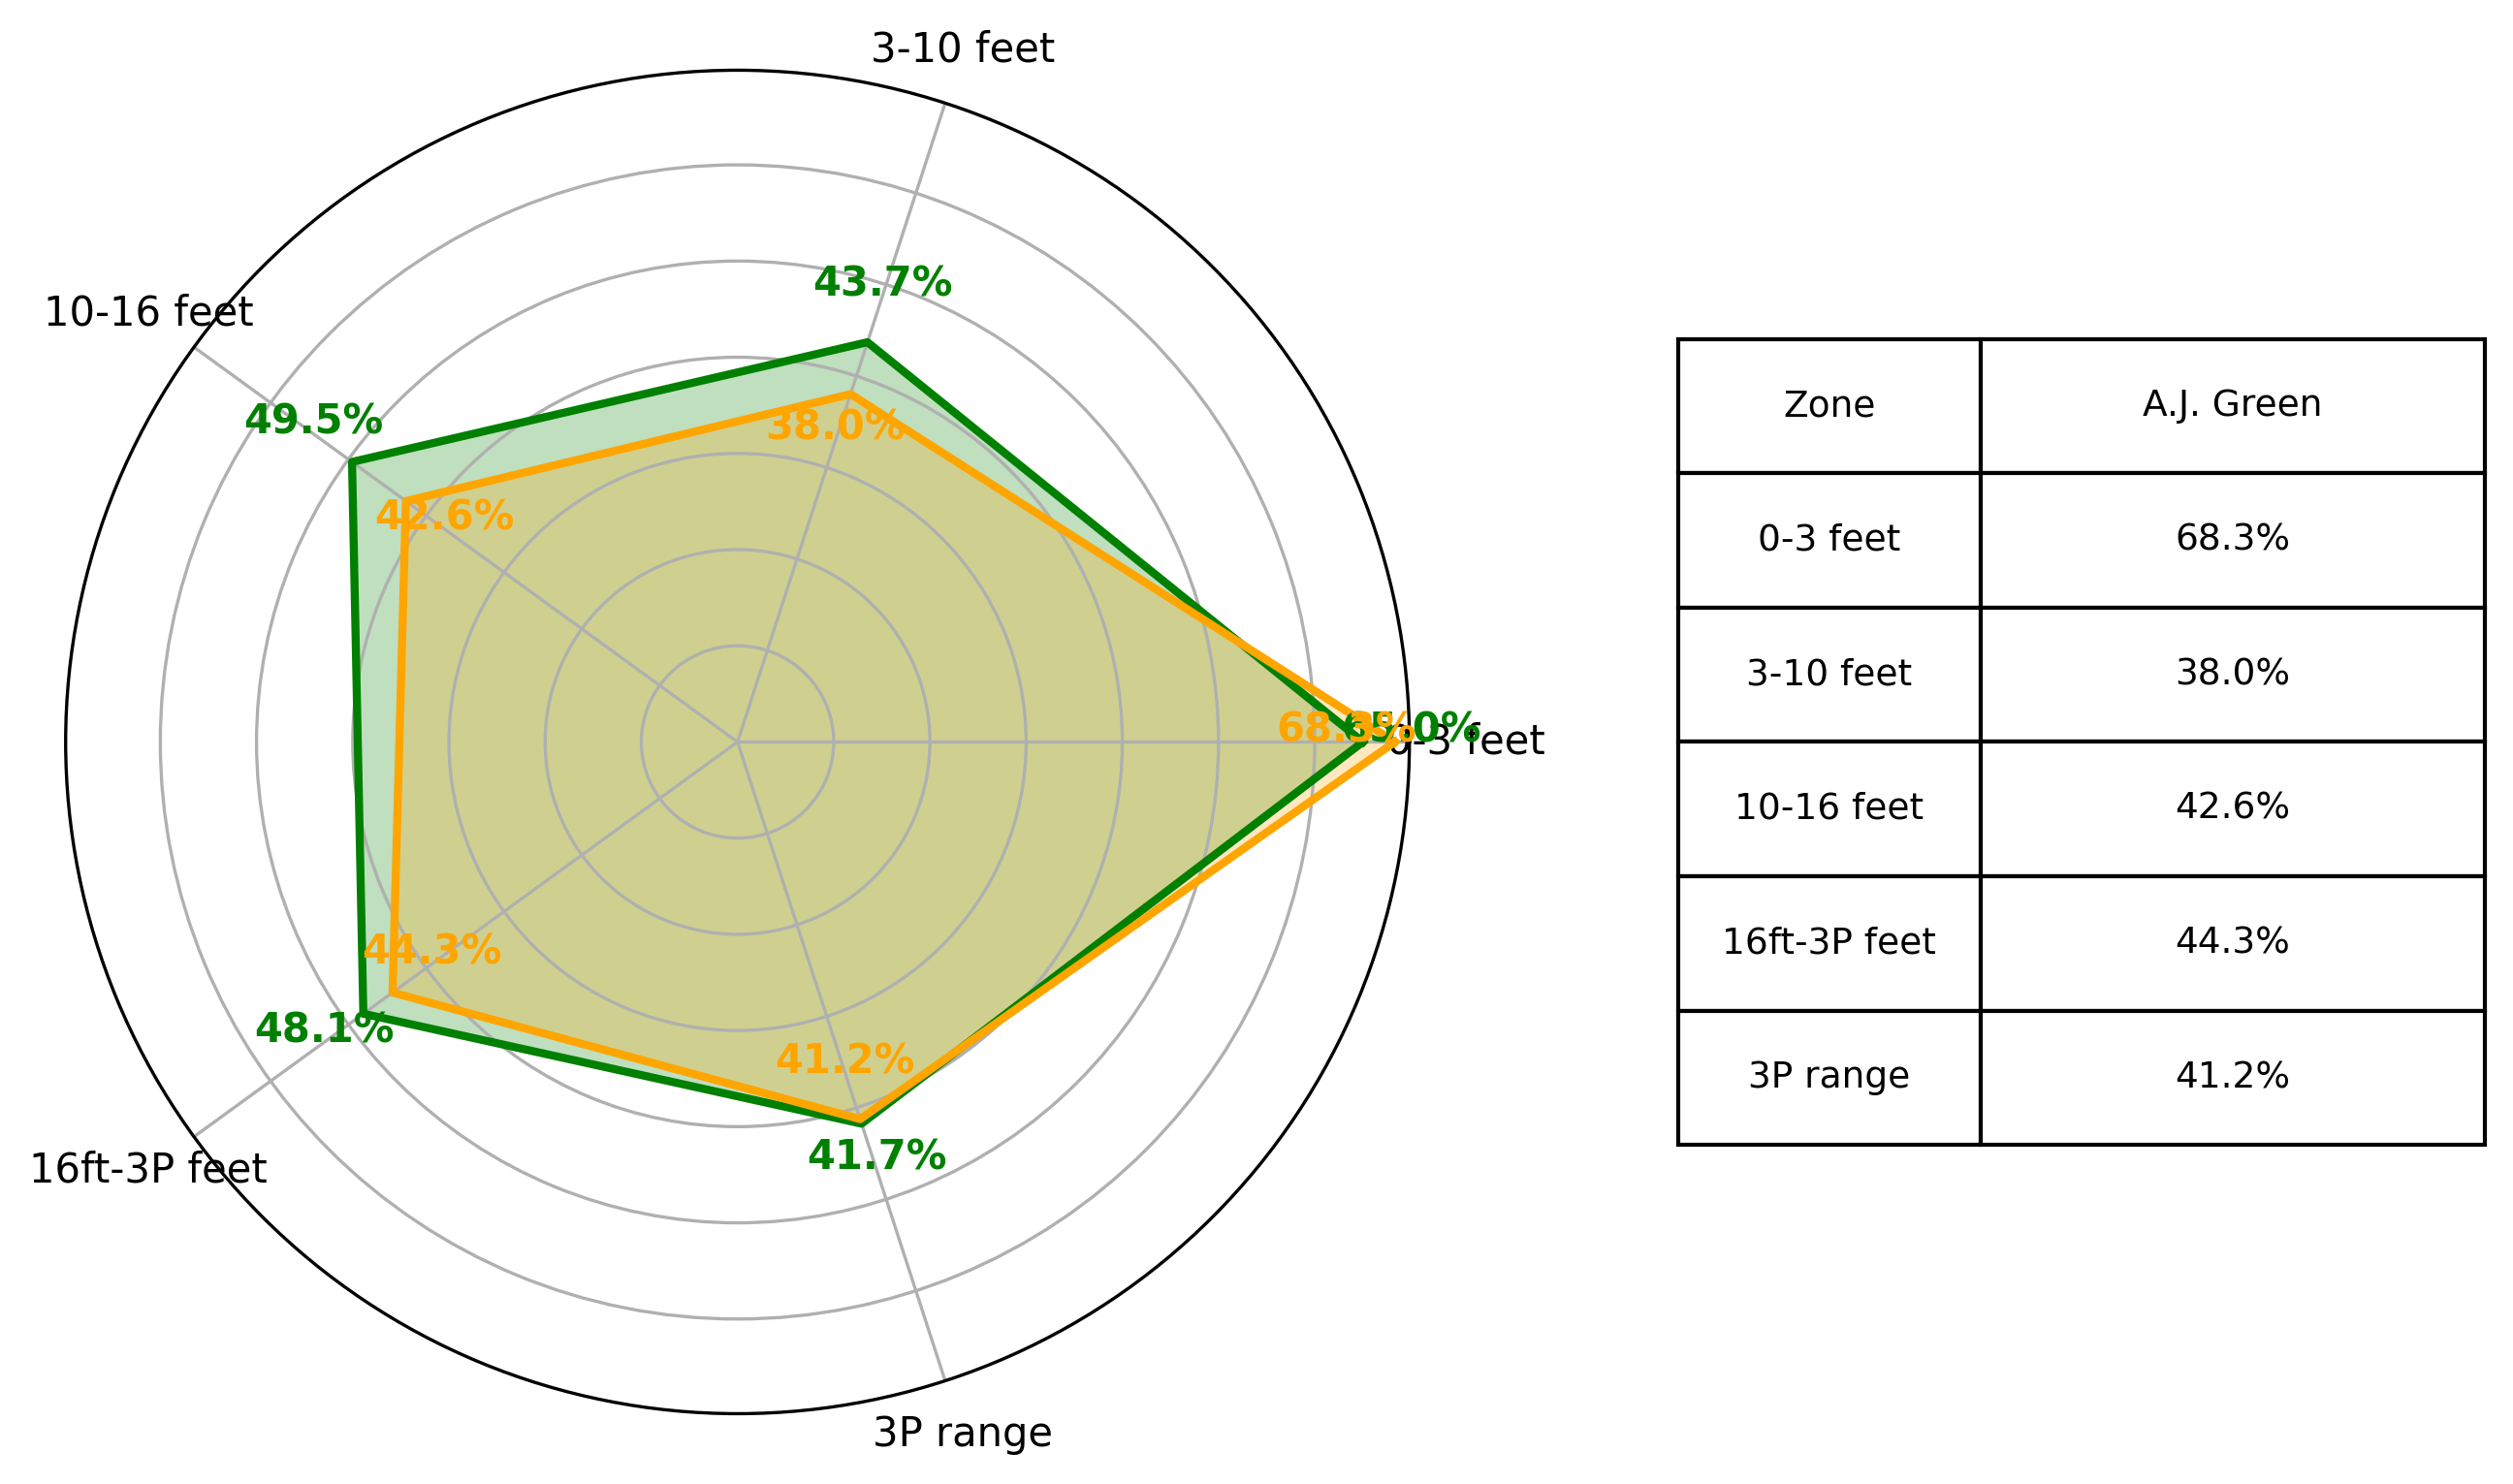

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# กำหนดคอลัมน์ที่สนใจ (โซนการยิง)
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

# ชื่อที่ต้องการแสดงในกราฟแทนที่ชื่อคอลัมน์
categories_display = [
    '0-3 feet',
    '3-10 feet',
    '10-16 feet',
    '16ft-3P feet',
    '3P range'
]

# ฟังก์ชันสำหรับวาดกราฟเรดาร์พร้อม legend แบบตาราง
def plot_radar_chart_with_table(player_id1, player_id2, data):
    # ดึงข้อมูลของผู้เล่นจาก player_id
    player_data1 = shooting_data[shooting_data['player_id'] == player_id1]
    player_data2 = shooting_data[shooting_data['player_id'] == player_id2]

    # ดึงชื่อผู้เล่นจากคอลัมน์ "player"
    player_name1 = shooting_data['player'].values[0]
    player_name2 = shooting_data['player'].values[0]

    if player_data1.empty:
        print(f"No data found for player_id: {player_id1}")
        return

    if player_data2.empty:
        print(f"No data found for player_id: {player_id2}")
        return

    # คำนวณเปอร์เซ็นต์ของผู้เล่นแต่ละคนในแต่ละโซน
    player_mean_values1 = player_data1[shooting_zones_columns].mean().values * 100
    player_mean_values2 = player_data2[shooting_zones_columns].mean().values * 100

    # เพิ่มข้อมูลกลับไปที่จุดแรกเพื่อปิดกราฟ
    player_mean_values1 = np.concatenate((player_mean_values1, [player_mean_values1[0]]))
    player_mean_values2 = np.concatenate((player_mean_values2, [player_mean_values2[0]]))

    # ชื่อของแต่ละโซนที่จะแสดงในกราฟ
    categories = categories_display
    n = len(categories)

    # คำนวณมุมของแต่ละแกน
    angles = [i / float(n) * 2 * pi for i in range(n)]
    angles += angles[:1]

    # สร้างกราฟเรดาร์
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True),dpi = 300)

    # วาดกราฟสำหรับผู้เล่น 1
    ax.fill(angles, player_mean_values1, color='green', alpha=0.25)
    ax.plot(angles, player_mean_values1, color='green', linewidth=2, label=f'{player_name1}')

    # วาดกราฟสำหรับผู้เล่น 2
    ax.fill(angles, player_mean_values2, color='orange', alpha=0.25)
    ax.plot(angles, player_mean_values2, color='orange', linewidth=2, label=f'{player_name2}')

    # กำหนดค่าต่าง ๆ บนแกน
    plt.xticks(angles[:-1], categories, fontsize=10)

    # เอาเลขบนวงแกนออก
    ax.set_yticklabels([])

    # แสดงค่า % ของผู้เล่นแต่ละโซนในกราฟสำหรับผู้เล่น 1
    for i, (angle, value) in enumerate(zip(angles[:-1], player_mean_values1[:-1])):
        ax.text(angle, value + 5, f'{value:.1f}%', horizontalalignment='center', size=10, color='green', weight='semibold')

    # แสดงค่า % ของผู้เล่นแต่ละโซนในกราฟสำหรับผู้เล่น 2
    for i, (angle, value) in enumerate(zip(angles[:-1], player_mean_values2[:-1])):
        ax.text(angle, value - 5, f'{value:.1f}%', horizontalalignment='center', size=10, color='orange', weight='semibold')

    # สร้างข้อมูลสำหรับตาราง
    table_data = {
        'Zone': categories_display,
        player_name1: [f'{v:.1f}%' for v in player_mean_values1[:-1]],  # ไม่รวมค่าซ้ำ
        player_name2: [f'{v:.1f}%' for v in player_mean_values2[:-1]]
    }
    df = pd.DataFrame(table_data)

    # เพิ่มตารางเป็น legend ข้างนอกกราฟ radar
    table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='right', bbox=[1.2, 0.2, 0.6, 0.6])
    table.auto_set_font_size(False)
    table.set_fontsize(9)

    # ขยายขนาดคอลัมน์ Zone โดยการเข้าถึงเซลล์ในตาราง
    for key, cell in table.get_celld().items():
        if key[1] == 0:  # คอลัมน์ "Zone"
            cell.set_width(0.3)  # ขยายขนาดคอลัมน์ Zone

    # แสดงกราฟ
    plt.show()

# ป้อน player_id ที่ต้องการเปรียบเทียบ
player_id1 = int(3903)  # เปลี่ยนตามต้องการ
player_id2 = int(4036)  # เปลี่ยนตามต้องการ

# เรียกฟังก์ชันวาดกราฟพร้อมตาราง
plot_radar_chart_with_table(player_id1, player_id2, shooting_data)


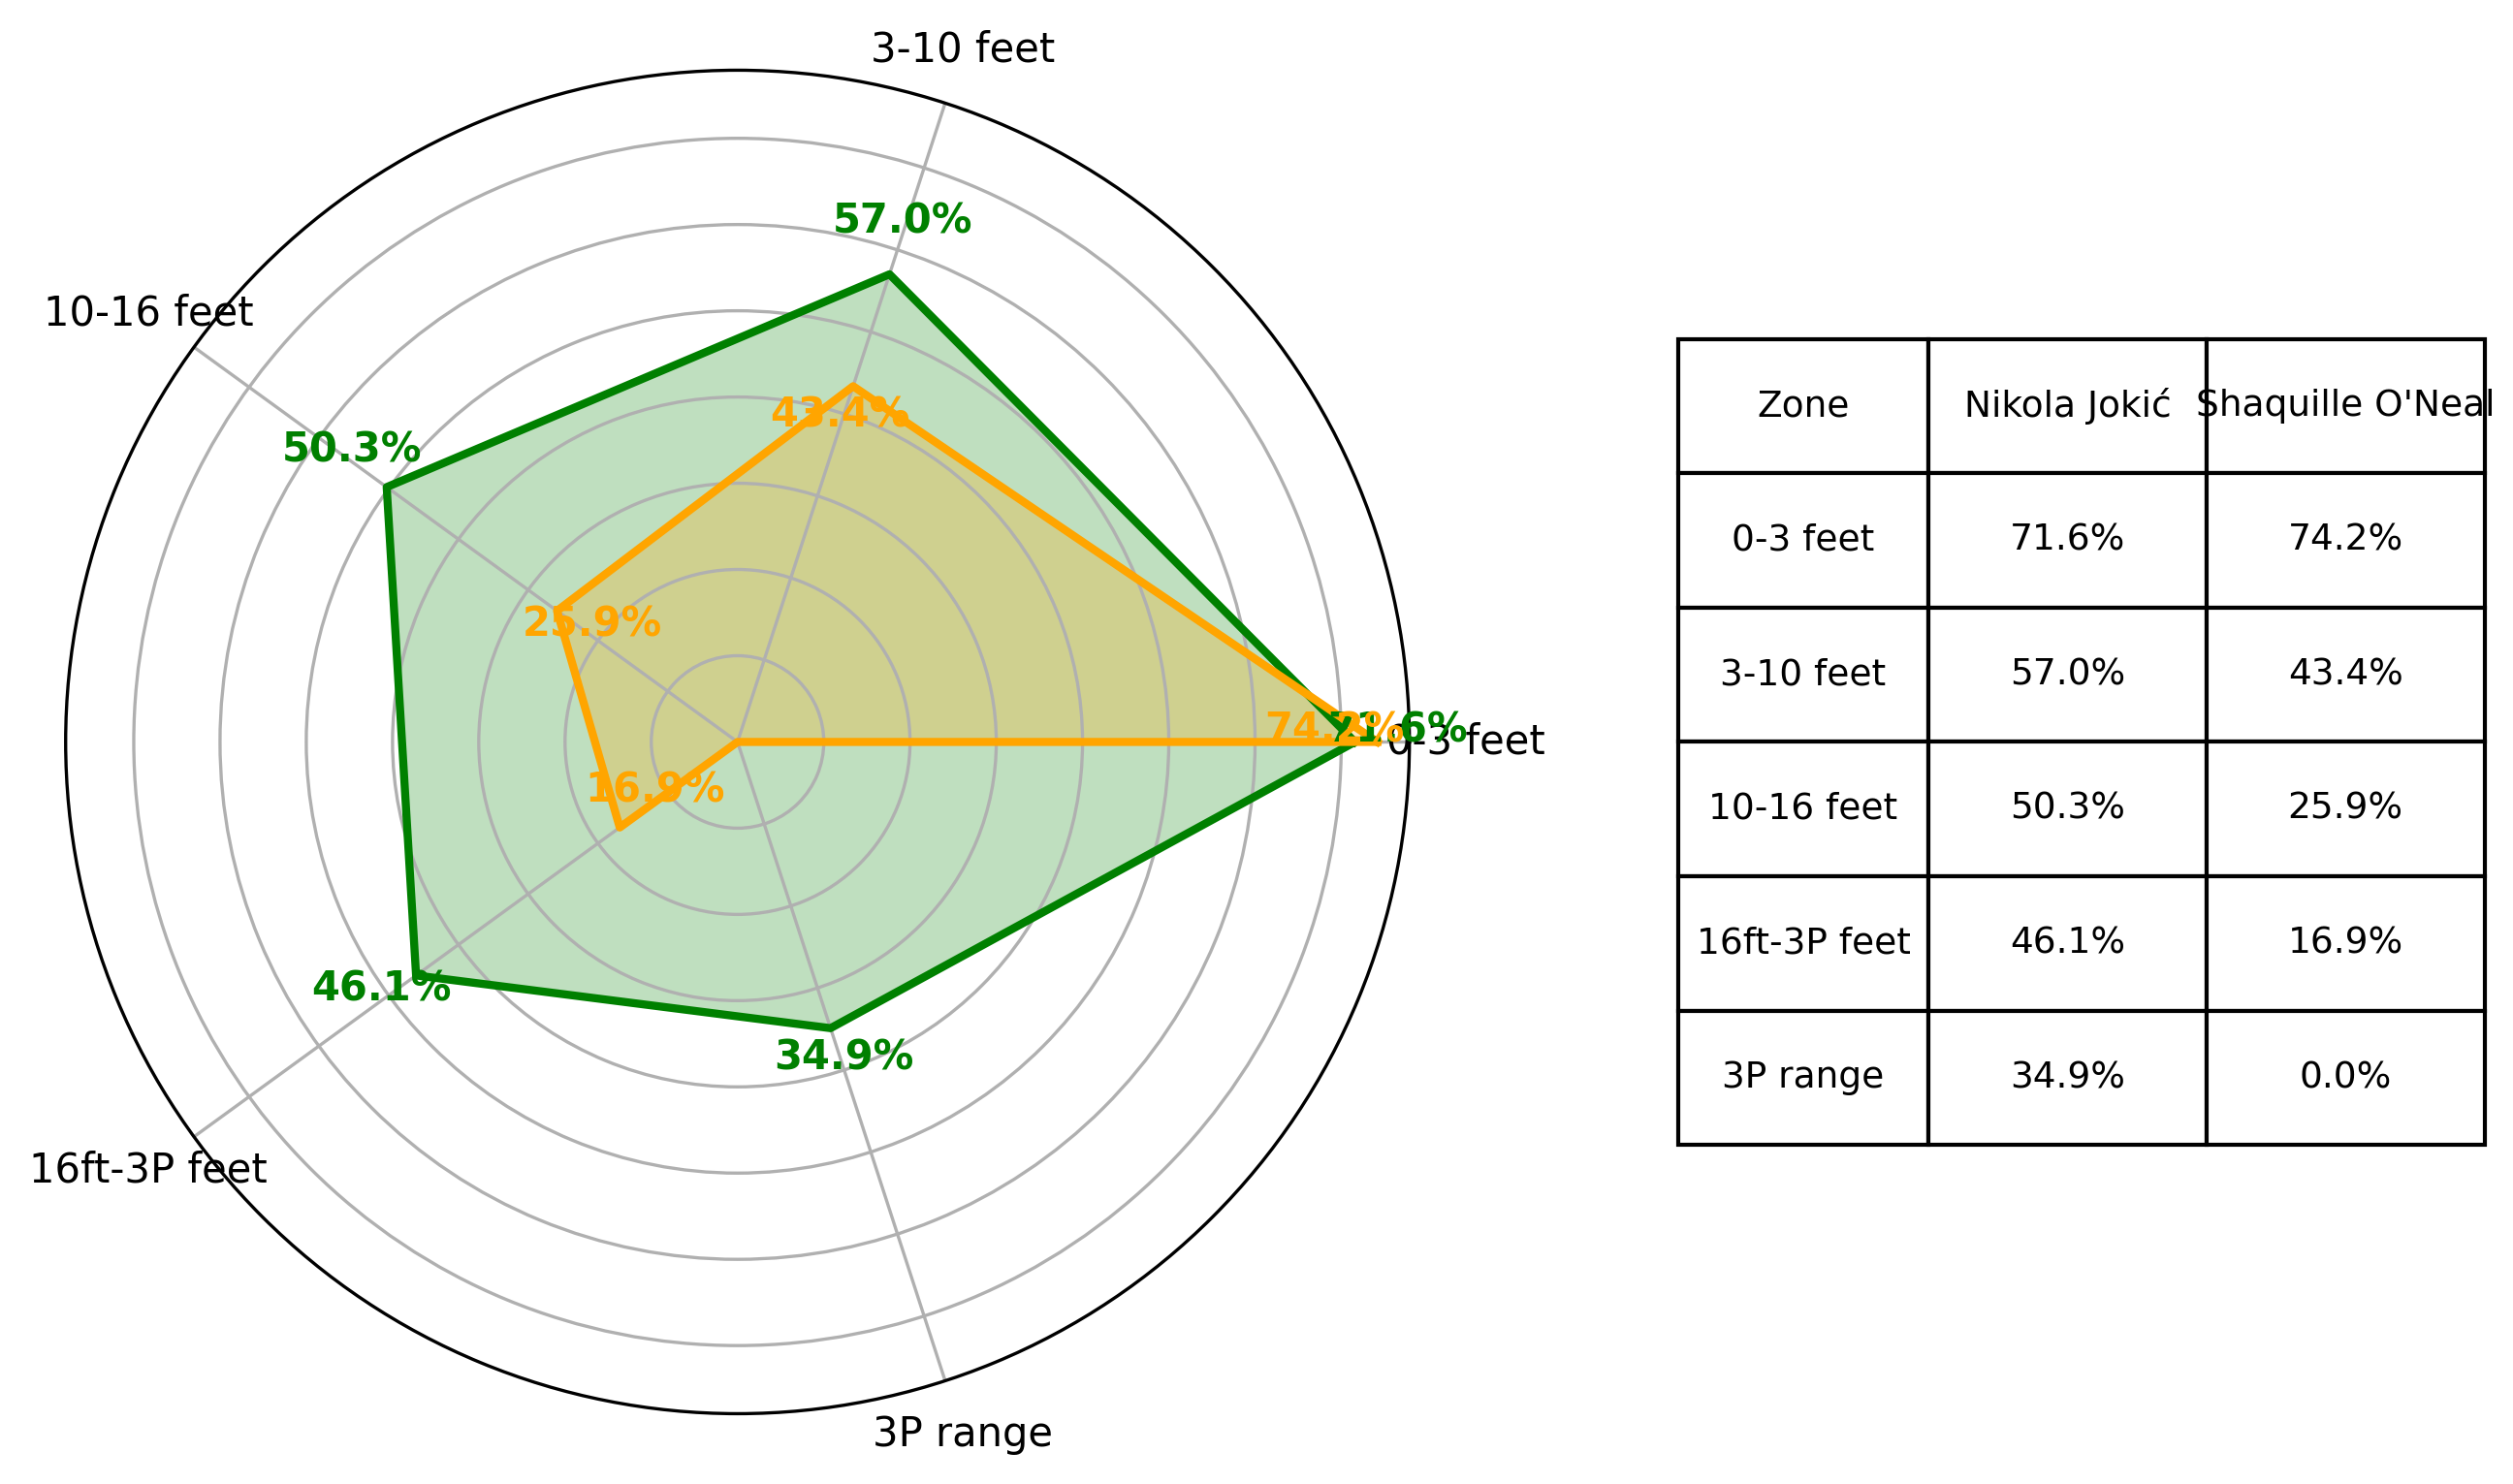

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# กำหนดคอลัมน์ที่สนใจ (โซนการยิง)
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

# ชื่อที่ต้องการแสดงในกราฟแทนที่ชื่อคอลัมน์
categories_display = [
    '0-3 feet',
    '3-10 feet',
    '10-16 feet',
    '16ft-3P feet',
    '3P range'
]

# ฟังก์ชันสำหรับวาดกราฟเรดาร์พร้อม legend แบบตาราง
def plot_radar_chart_with_table(player_id1, player_id2, data):
    # ดึงข้อมูลของผู้เล่นจาก player_id
    player_data1 = shooting_data[shooting_data['player_id'] == player_id1]
    player_data2 = shooting_data[shooting_data['player_id'] == player_id2]

    # ดึงชื่อผู้เล่นจากคอลัมน์ "player"
    player_name1 = player_data1['player'].values[0]
    player_name2 = player_data2['player'].values[0]

    if player_data1.empty:
        print(f"No data found for player_id: {player_id1}")
        return

    if player_data2.empty:
        print(f"No data found for player_id: {player_id2}")
        return

    # คำนวณเปอร์เซ็นต์ของผู้เล่นแต่ละคนในแต่ละโซน
    player_mean_values1 = player_data1[shooting_zones_columns].mean().values * 100
    player_mean_values2 = player_data2[shooting_zones_columns].mean().values * 100

    # เพิ่มข้อมูลกลับไปที่จุดแรกเพื่อปิดกราฟ
    player_mean_values1 = np.concatenate((player_mean_values1, [player_mean_values1[0]]))
    player_mean_values2 = np.concatenate((player_mean_values2, [player_mean_values2[0]]))

    # ชื่อของแต่ละโซนที่จะแสดงในกราฟ
    categories = categories_display
    n = len(categories)

    # คำนวณมุมของแต่ละแกน
    angles = [i / float(n) * 2 * pi for i in range(n)]
    angles += angles[:1]

    # สร้างกราฟเรดาร์
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True),dpi = 300)

    # วาดกราฟสำหรับผู้เล่น 1
    ax.fill(angles, player_mean_values1, color='green', alpha=0.25)
    ax.plot(angles, player_mean_values1, color='green', linewidth=2, label=f'{player_name1}')

    # วาดกราฟสำหรับผู้เล่น 2
    ax.fill(angles, player_mean_values2, color='orange', alpha=0.25)
    ax.plot(angles, player_mean_values2, color='orange', linewidth=2, label=f'{player_name2}')

    # กำหนดค่าต่าง ๆ บนแกน
    plt.xticks(angles[:-1], categories, fontsize=10)

    # เอาเลขบนวงแกนออก
    ax.set_yticklabels([])

    # แสดงค่า % ของผู้เล่นแต่ละโซนในกราฟสำหรับผู้เล่น 1
    for i, (angle, value) in enumerate(zip(angles[:-1], player_mean_values1[:-1])):
        ax.text(angle, value + 5, f'{value:.1f}%', horizontalalignment='center', size=10, color='green', weight='semibold')

    # แสดงค่า % ของผู้เล่นแต่ละโซนในกราฟสำหรับผู้เล่น 2
    for i, (angle, value) in enumerate(zip(angles[:-1], player_mean_values2[:-1])):
        ax.text(angle, value - 5, f'{value:.1f}%', horizontalalignment='center', size=10, color='orange', weight='semibold')

    # สร้างข้อมูลสำหรับตาราง
    table_data = {
        'Zone': categories_display,
        player_name1: [f'{v:.1f}%' for v in player_mean_values1[:-1]],  # ไม่รวมค่าซ้ำ
        player_name2: [f'{v:.1f}%' for v in player_mean_values2[:-1]]
    }
    df = pd.DataFrame(table_data)

    # เพิ่มตารางเป็น legend ข้างนอกกราฟ radar
    table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='right', bbox=[1.2, 0.2, 0.6, 0.6])
    table.auto_set_font_size(False)
    table.set_fontsize(9)

    # ขยายขนาดคอลัมน์ Zone โดยการเข้าถึงเซลล์ในตาราง
    for key, cell in table.get_celld().items():
        if key[1] == 0:  # คอลัมน์ "Zone"
            cell.set_width(0.3)  # ขยายขนาดคอลัมน์ Zone

    # แสดงกราฟ
    plt.show()

# ป้อน player_id ที่ต้องการเปรียบเทียบ
player_id1 = int(4352)  # เปลี่ยนตามต้องการ
player_id2 = int(2751)  # เปลี่ยนตามต้องการ

# เรียกฟังก์ชันวาดกราฟพร้อมตาราง
plot_radar_chart_with_table(player_id1, player_id2, shooting_data)

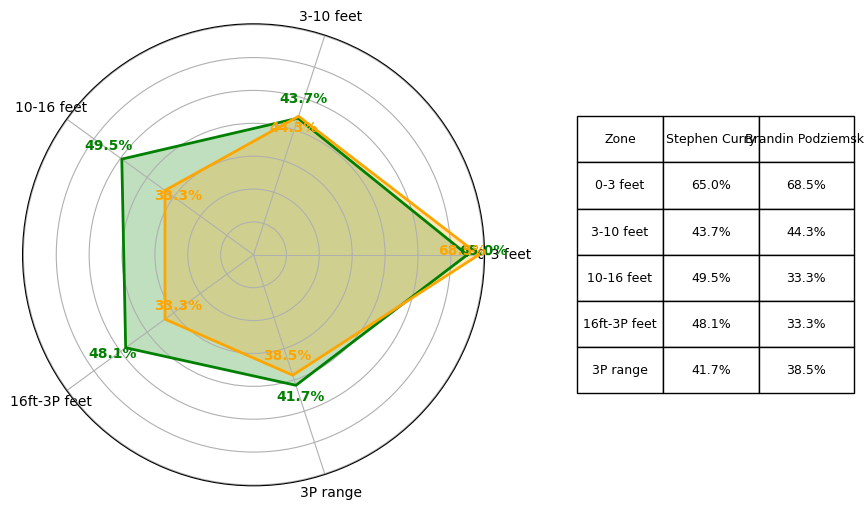

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# กำหนดคอลัมน์ที่สนใจ (โซนการยิง)
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

# ชื่อที่ต้องการแสดงในกราฟแทนที่ชื่อคอลัมน์
categories_display = [
    '0-3 feet',
    '3-10 feet',
    '10-16 feet',
    '16ft-3P feet',
    '3P range'
]

# ฟังก์ชันสำหรับวาดกราฟเรดาร์พร้อม legend แบบตาราง
def plot_radar_chart_with_table(player_id1, player_id2, data):
    # ดึงข้อมูลของผู้เล่นจาก player_id
    player_data1 = data[data['player_id'] == player_id1]
    player_data2 = data[data['player_id'] == player_id2]

    # ดึงชื่อผู้เล่นจากคอลัมน์ "player"
    player_name1 = player_data1['player'].values[0]
    player_name2 = player_data2['player'].values[0]

    if player_data1.empty:
        print(f"No data found for player_id: {player_id1}")
        return

    if player_data2.empty:
        print(f"No data found for player_id: {player_id2}")
        return

    # คำนวณเปอร์เซ็นต์ของผู้เล่นแต่ละคนในแต่ละโซน
    player_mean_values1 = player_data1[shooting_zones_columns].mean().values * 100
    player_mean_values2 = player_data2[shooting_zones_columns].mean().values * 100

    # เพิ่มข้อมูลกลับไปที่จุดแรกเพื่อปิดกราฟ
    player_mean_values1 = np.concatenate((player_mean_values1, [player_mean_values1[0]]))
    player_mean_values2 = np.concatenate((player_mean_values2, [player_mean_values2[0]]))

    # ชื่อของแต่ละโซนที่จะแสดงในกราฟ
    categories = categories_display
    n = len(categories)

    # คำนวณมุมของแต่ละแกน
    angles = [i / float(n) * 2 * pi for i in range(n)]
    angles += angles[:1]

    # สร้างกราฟเรดาร์
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # วาดกราฟสำหรับผู้เล่น 1
    ax.fill(angles, player_mean_values1, color='green', alpha=0.25)
    ax.plot(angles, player_mean_values1, color='green', linewidth=2, label=f'{player_name1}')

    # วาดกราฟสำหรับผู้เล่น 2
    ax.fill(angles, player_mean_values2, color='orange', alpha=0.25)
    ax.plot(angles, player_mean_values2, color='orange', linewidth=2, label=f'{player_name2}')

    # กำหนดค่าต่าง ๆ บนแกน
    plt.xticks(angles[:-1], categories, fontsize=10)

    # เอาเลขบนวงแกนออก
    ax.set_yticklabels([])

    # แสดงค่า % ของผู้เล่นแต่ละโซนในกราฟสำหรับผู้เล่น 1
    for i, (angle, value) in enumerate(zip(angles[:-1], player_mean_values1[:-1])):
        ax.text(angle, value + 5, f'{value:.1f}%', horizontalalignment='center', size=10, color='green', weight='semibold')

    # แสดงค่า % ของผู้เล่นแต่ละโซนในกราฟสำหรับผู้เล่น 2
    for i, (angle, value) in enumerate(zip(angles[:-1], player_mean_values2[:-1])):
        ax.text(angle, value - 5, f'{value:.1f}%', horizontalalignment='center', size=10, color='orange', weight='semibold')

    # สร้างข้อมูลสำหรับตาราง
    table_data = {
        'Zone': categories_display,
        player_name1: [f'{v:.1f}%' for v in player_mean_values1[:-1]],  # ไม่รวมค่าซ้ำ
        player_name2: [f'{v:.1f}%' for v in player_mean_values2[:-1]]
    }
    df = pd.DataFrame(table_data)

    # เพิ่มตารางเป็น legend ข้างนอกกราฟ radar
    table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='right', bbox=[1.2, 0.2, 0.6, 0.6])
    table.auto_set_font_size(False)
    table.set_fontsize(9)

    # ขยายขนาดคอลัมน์ Zone โดยการเข้าถึงเซลล์ในตาราง
    for key, cell in table.get_celld().items():
        if key[1] == 0:  # คอลัมน์ "Zone"
            cell.set_width(0.3)  # ขยายขนาดคอลัมน์ Zone

    # แสดงกราฟ
    plt.show()

# ป้อน player_id ที่ต้องการเปรียบเทียบ
player_id1 = int(3903)  # เปลี่ยนตามต้องการ
player_id2 = int(5120)  # เปลี่ยนตามต้องการ

# เรียกฟังก์ชันวาดกราฟพร้อมตาราง
plot_radar_chart_with_table(player_id1, player_id2, shooting_data)

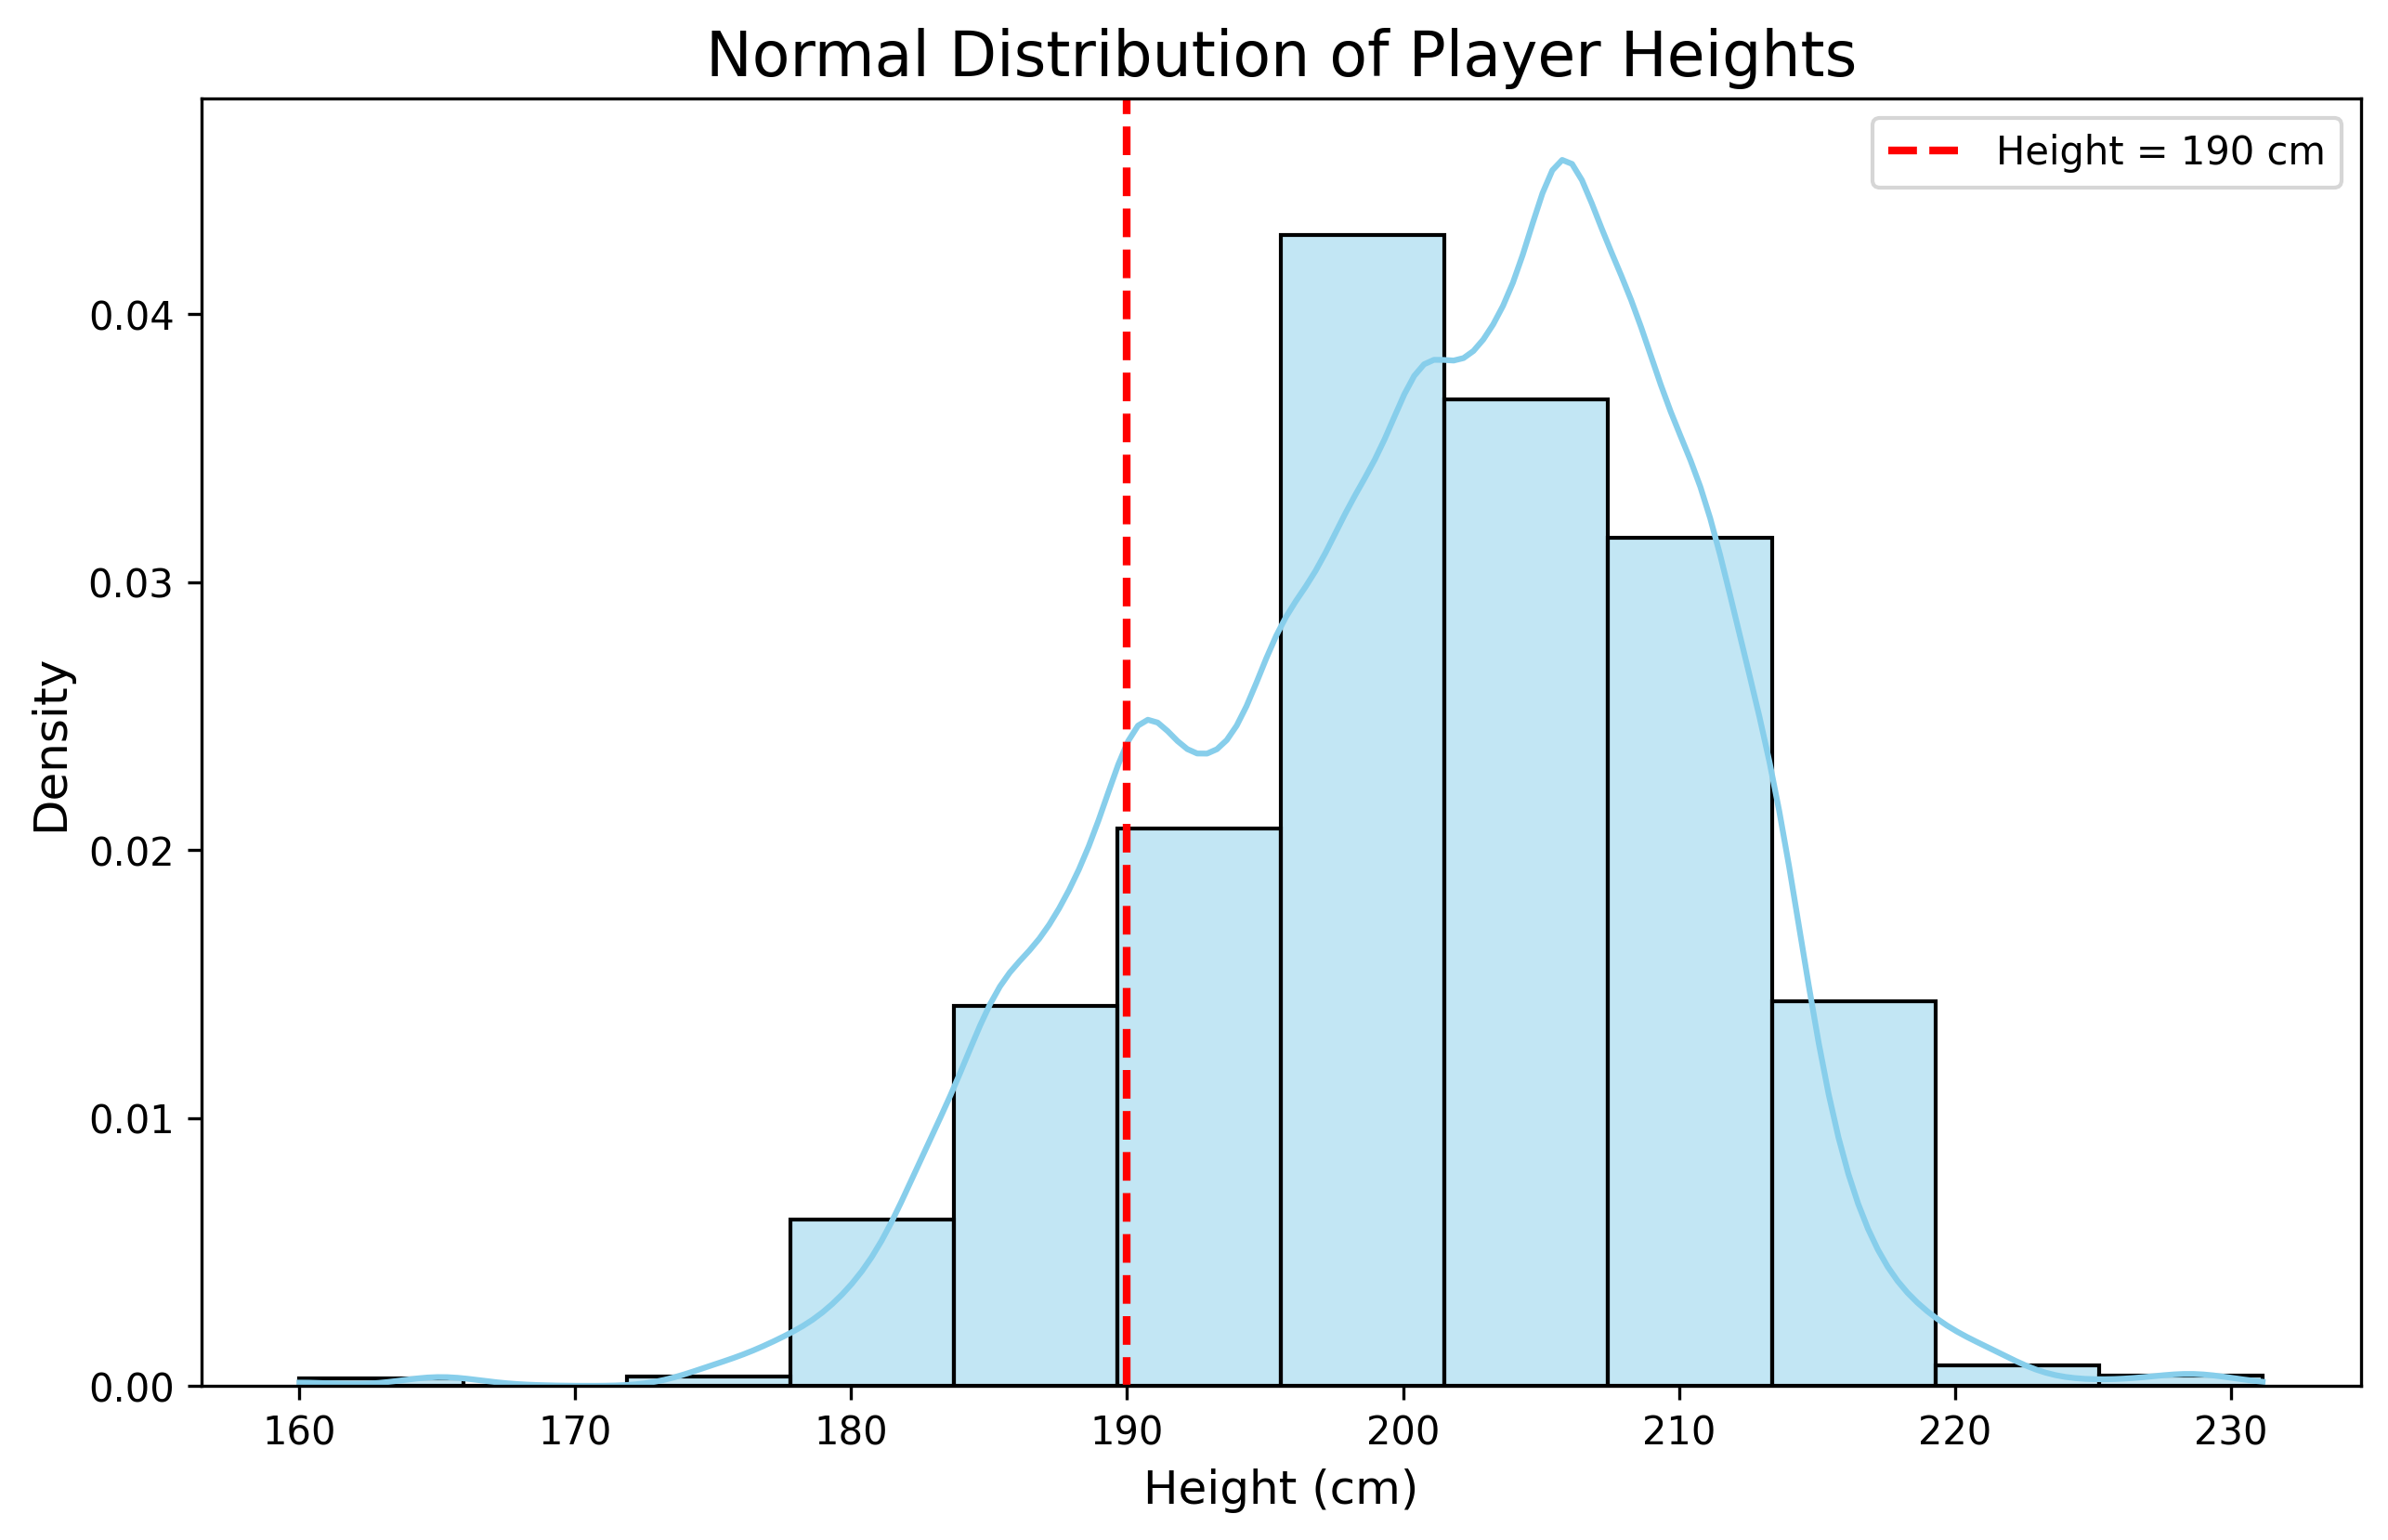

In [43]:

# โหลดไฟล์ CSV (ไฟล์ Weight and height.csv ที่คุณอัปโหลด)
weight_height_data = pd.read_csv('Weight and height.csv')

# Extract the "player_height" column, ensuring there are no missing values
player_height = weight_height_data['player_height'].dropna()

# Plot the normal distribution of the player height
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(player_height, kde=True, bins=12, stat='density', color='skyblue')

# Add a vertical line at 190 cm to highlight that specific height
plt.axvline(x=190, color='red', linestyle='--', linewidth=2, label='Height = 190 cm')

# Add labels and title
plt.title('Normal Distribution of Player Heights', fontsize=16)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend to explain the vertical line
plt.legend()

# Display the plot
plt.show()


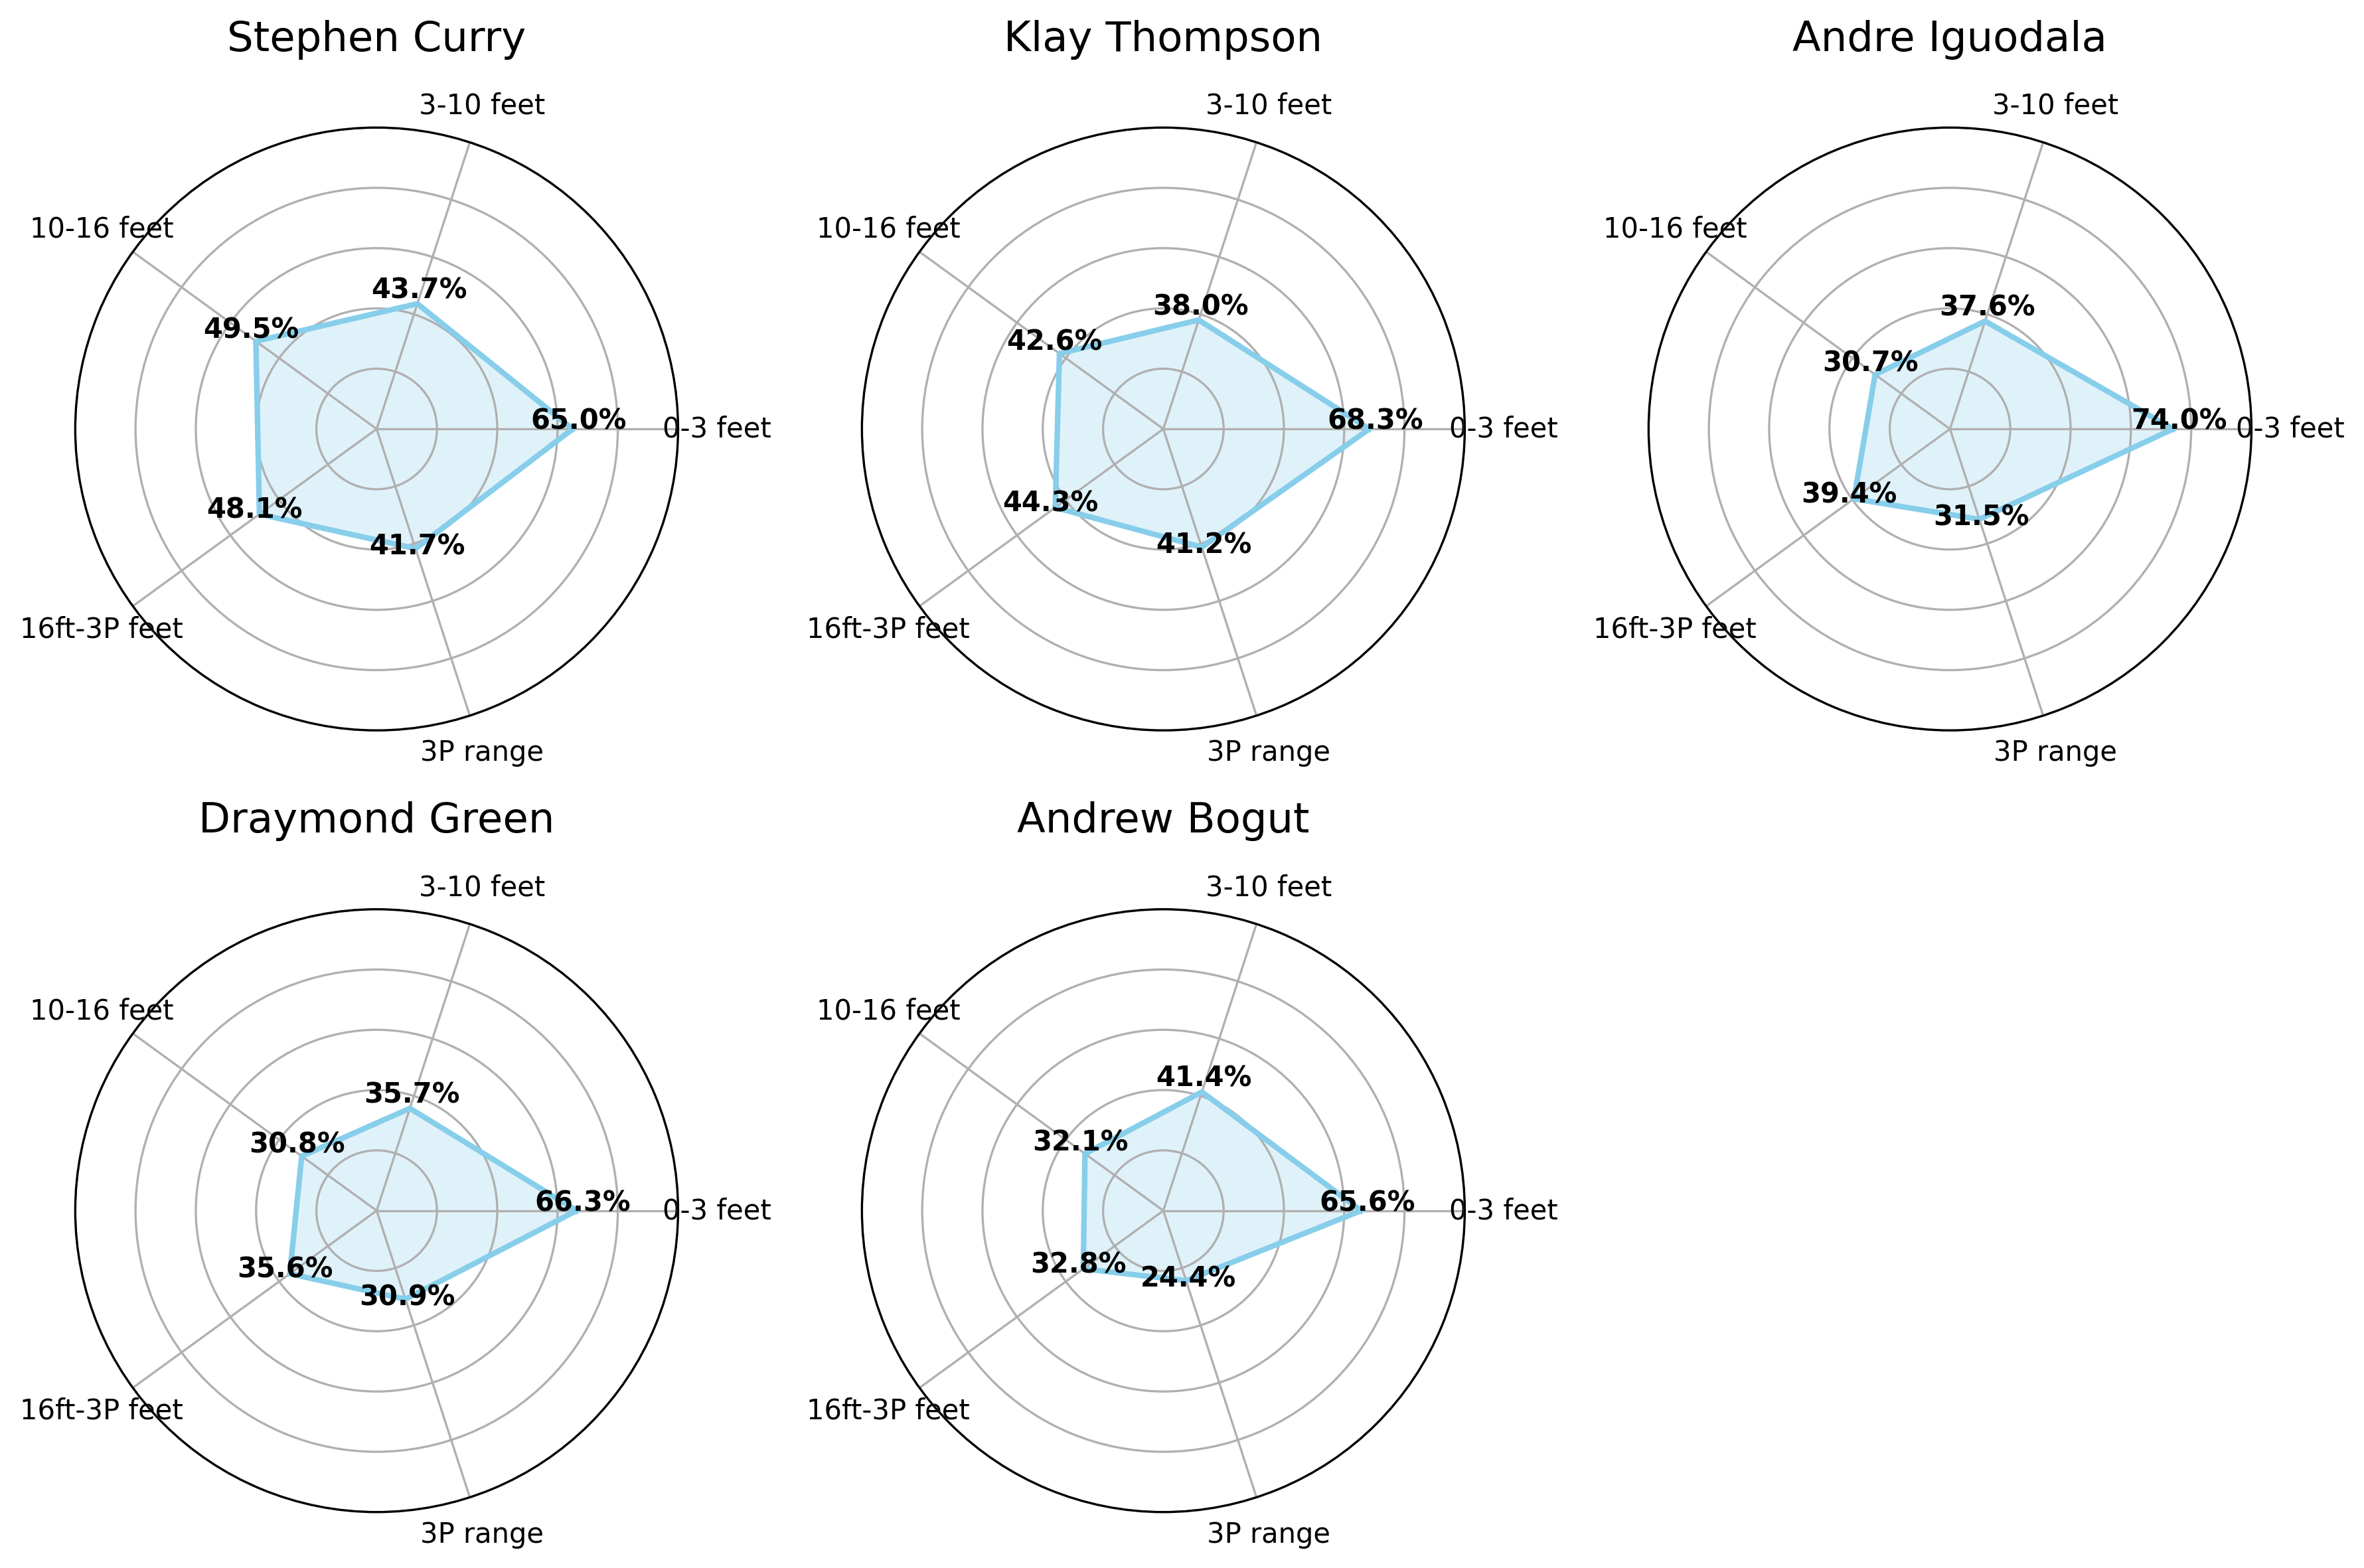

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# Define the shooting zones and corresponding display names
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

categories_display = [
    '0-3 feet',
    '3-10 feet',
    '10-16 feet',
    '16ft-3P feet',
    '3P range'
]

# Function to create radar charts with a 2x3 layout
def plot_radar_with_original_layout(player_ids, data):
    # Set dpi in plt.figure instead of figsize to affect resolution correctly
    fig, axes = plt.subplots(2, 3, figsize=(12, 8), subplot_kw=dict(polar=True), dpi=300)
    axes = axes.flatten()

    for i, player_id in enumerate(player_ids):
        player_data = data[data['player_id'] == player_id]

        if player_data.empty:
            print(f"No data found for player_id: {player_id}")
            continue

        player_name = player_data['player'].values[0]
        player_mean_values = player_data[shooting_zones_columns].mean().values * 100
        player_mean_values = np.concatenate((player_mean_values, [player_mean_values[0]]))

        categories = categories_display
        n = len(categories)
        angles = [i / float(n) * 2 * pi for i in range(n)]
        angles += angles[:1]

        ax = axes[i]
        ax.fill(angles, player_mean_values, color='skyblue', alpha=0.25)
        ax.plot(angles, player_mean_values, color='skyblue', linewidth=2, label=f'{player_name}')
        ax.set_title(player_name, size=15, y=1.1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)

        # Set the radial limits to range from 0% to 100%
        ax.set_ylim(0, 100)

        # Remove radial tick labels (20, 40, 60, 80, 100)
        ax.set_yticklabels([])

        # Display values on the radar chart
        for j, angle in enumerate(angles[:-1]):
            ax.text(angle, player_mean_values[j] + 2, f'{player_mean_values[j]:.1f}%',
                    horizontalalignment='center', size=10, color='black', weight='bold')

    # Remove unused axes if there are less than 6 players
    if len(player_ids) < len(axes):
        for j in range(len(player_ids), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage with player IDs
player_ids = [int(3903), int(4036), int(3500), int(4085), int(3573)]  # Replace with your desired player IDs


# Generate radar charts
plot_radar_with_original_layout(player_ids, shooting_data)



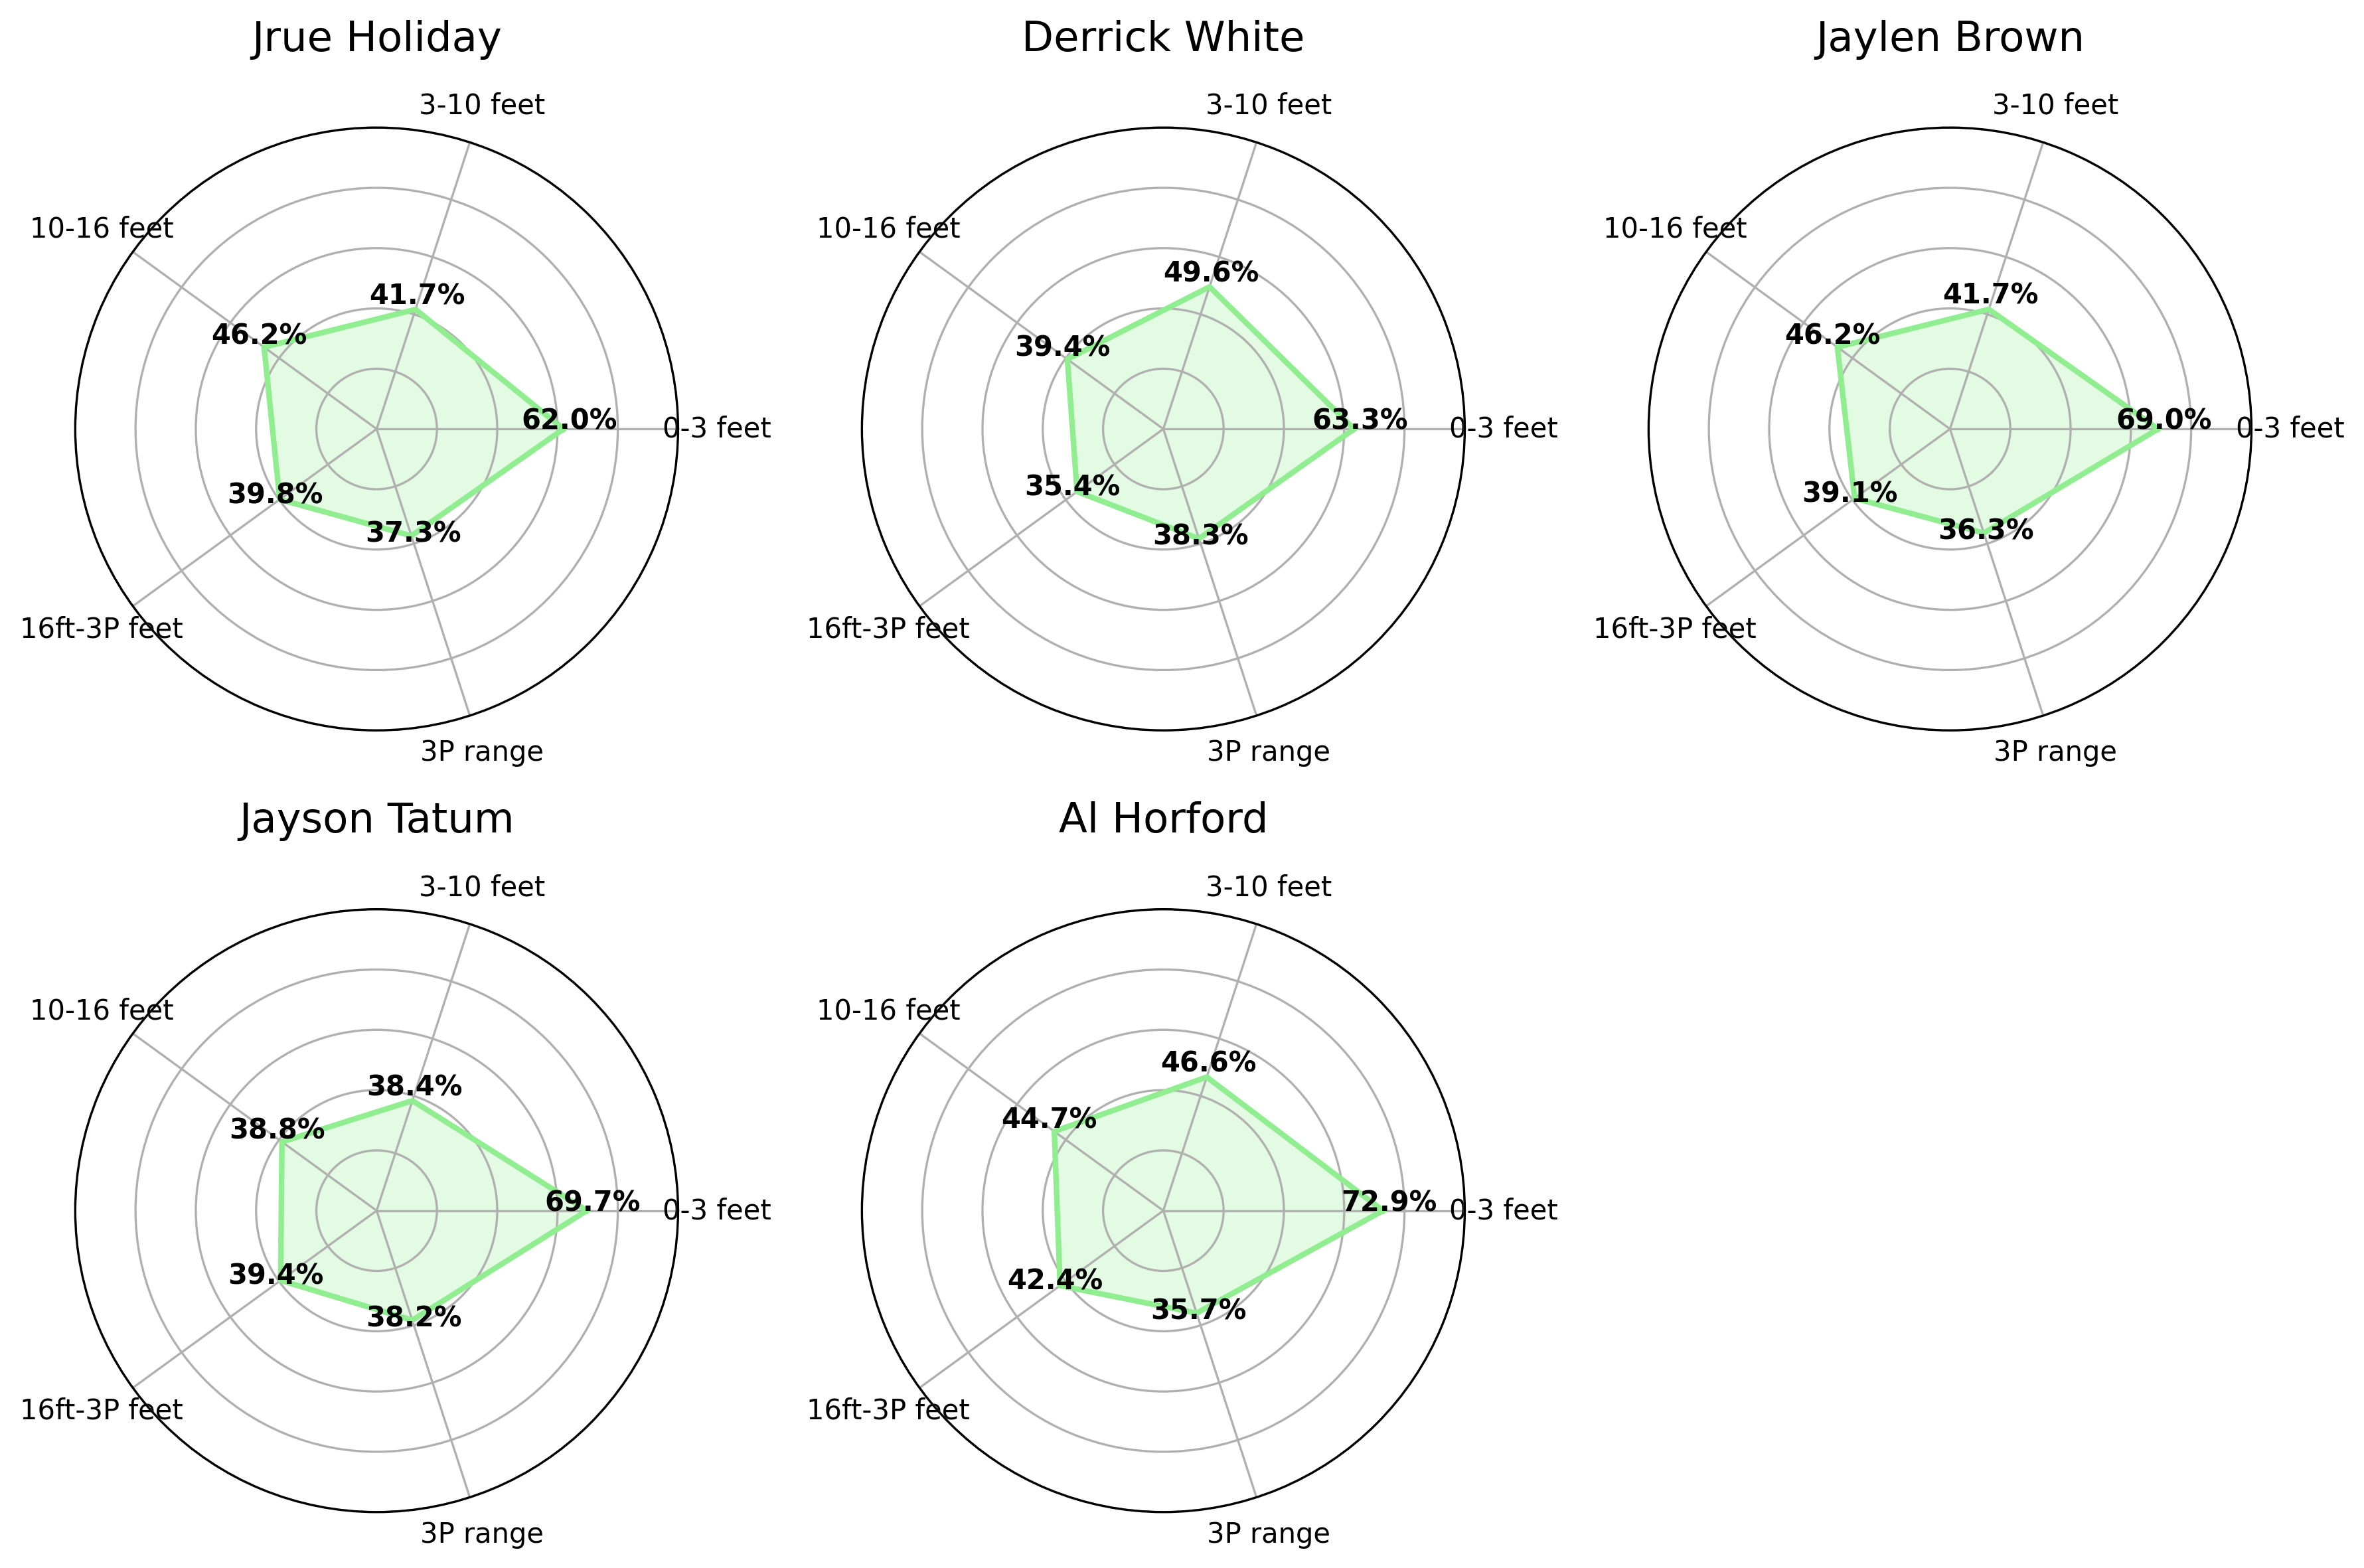

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# Define the shooting zones and corresponding display names
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

categories_display = [
    '0-3 feet',
    '3-10 feet',
    '10-16 feet',
    '16ft-3P feet',
    '3P range'
]

# Function to create radar charts with a 2x3 layout
def plot_radar_with_original_layout(player_ids, data):
    # Set dpi in plt.figure instead of figsize to affect resolution correctly
    fig, axes = plt.subplots(2, 3, figsize=(12, 8), subplot_kw=dict(polar=True), dpi=300)
    axes = axes.flatten()

    for i, player_id in enumerate(player_ids):
        player_data = data[data['player_id'] == player_id]

        if player_data.empty:
            print(f"No data found for player_id: {player_id}")
            continue

        player_name = player_data['player'].values[0]
        player_mean_values = player_data[shooting_zones_columns].mean().values * 100
        player_mean_values = np.concatenate((player_mean_values, [player_mean_values[0]]))

        categories = categories_display
        n = len(categories)
        angles = [i / float(n) * 2 * pi for i in range(n)]
        angles += angles[:1]

        ax = axes[i]
        ax.fill(angles, player_mean_values, color='lightgreen', alpha=0.25)
        ax.plot(angles, player_mean_values, color='lightgreen', linewidth=2, label=f'{player_name}')
        ax.set_title(player_name, size=15, y=1.1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)

        # Set the radial limits to range from 0% to 100%
        ax.set_ylim(0, 100)

        # Remove radial tick labels (20, 40, 60, 80, 100)
        ax.set_yticklabels([])

        # Display values on the radar chart
        for j, angle in enumerate(angles[:-1]):
            ax.text(angle, player_mean_values[j] + 2, f'{player_mean_values[j]:.1f}%',
                    horizontalalignment='center', size=10, color='black', weight='bold')

    # Remove unused axes if there are less than 6 players
    if len(player_ids) < len(axes):
        for j in range(len(player_ids), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage with player IDs
player_ids = [int(3891), int(4492), int(4415), int(4518), int(3734)]  # Replace with your desired player IDs


# Generate radar charts
plot_radar_with_original_layout(player_ids, shooting_data)


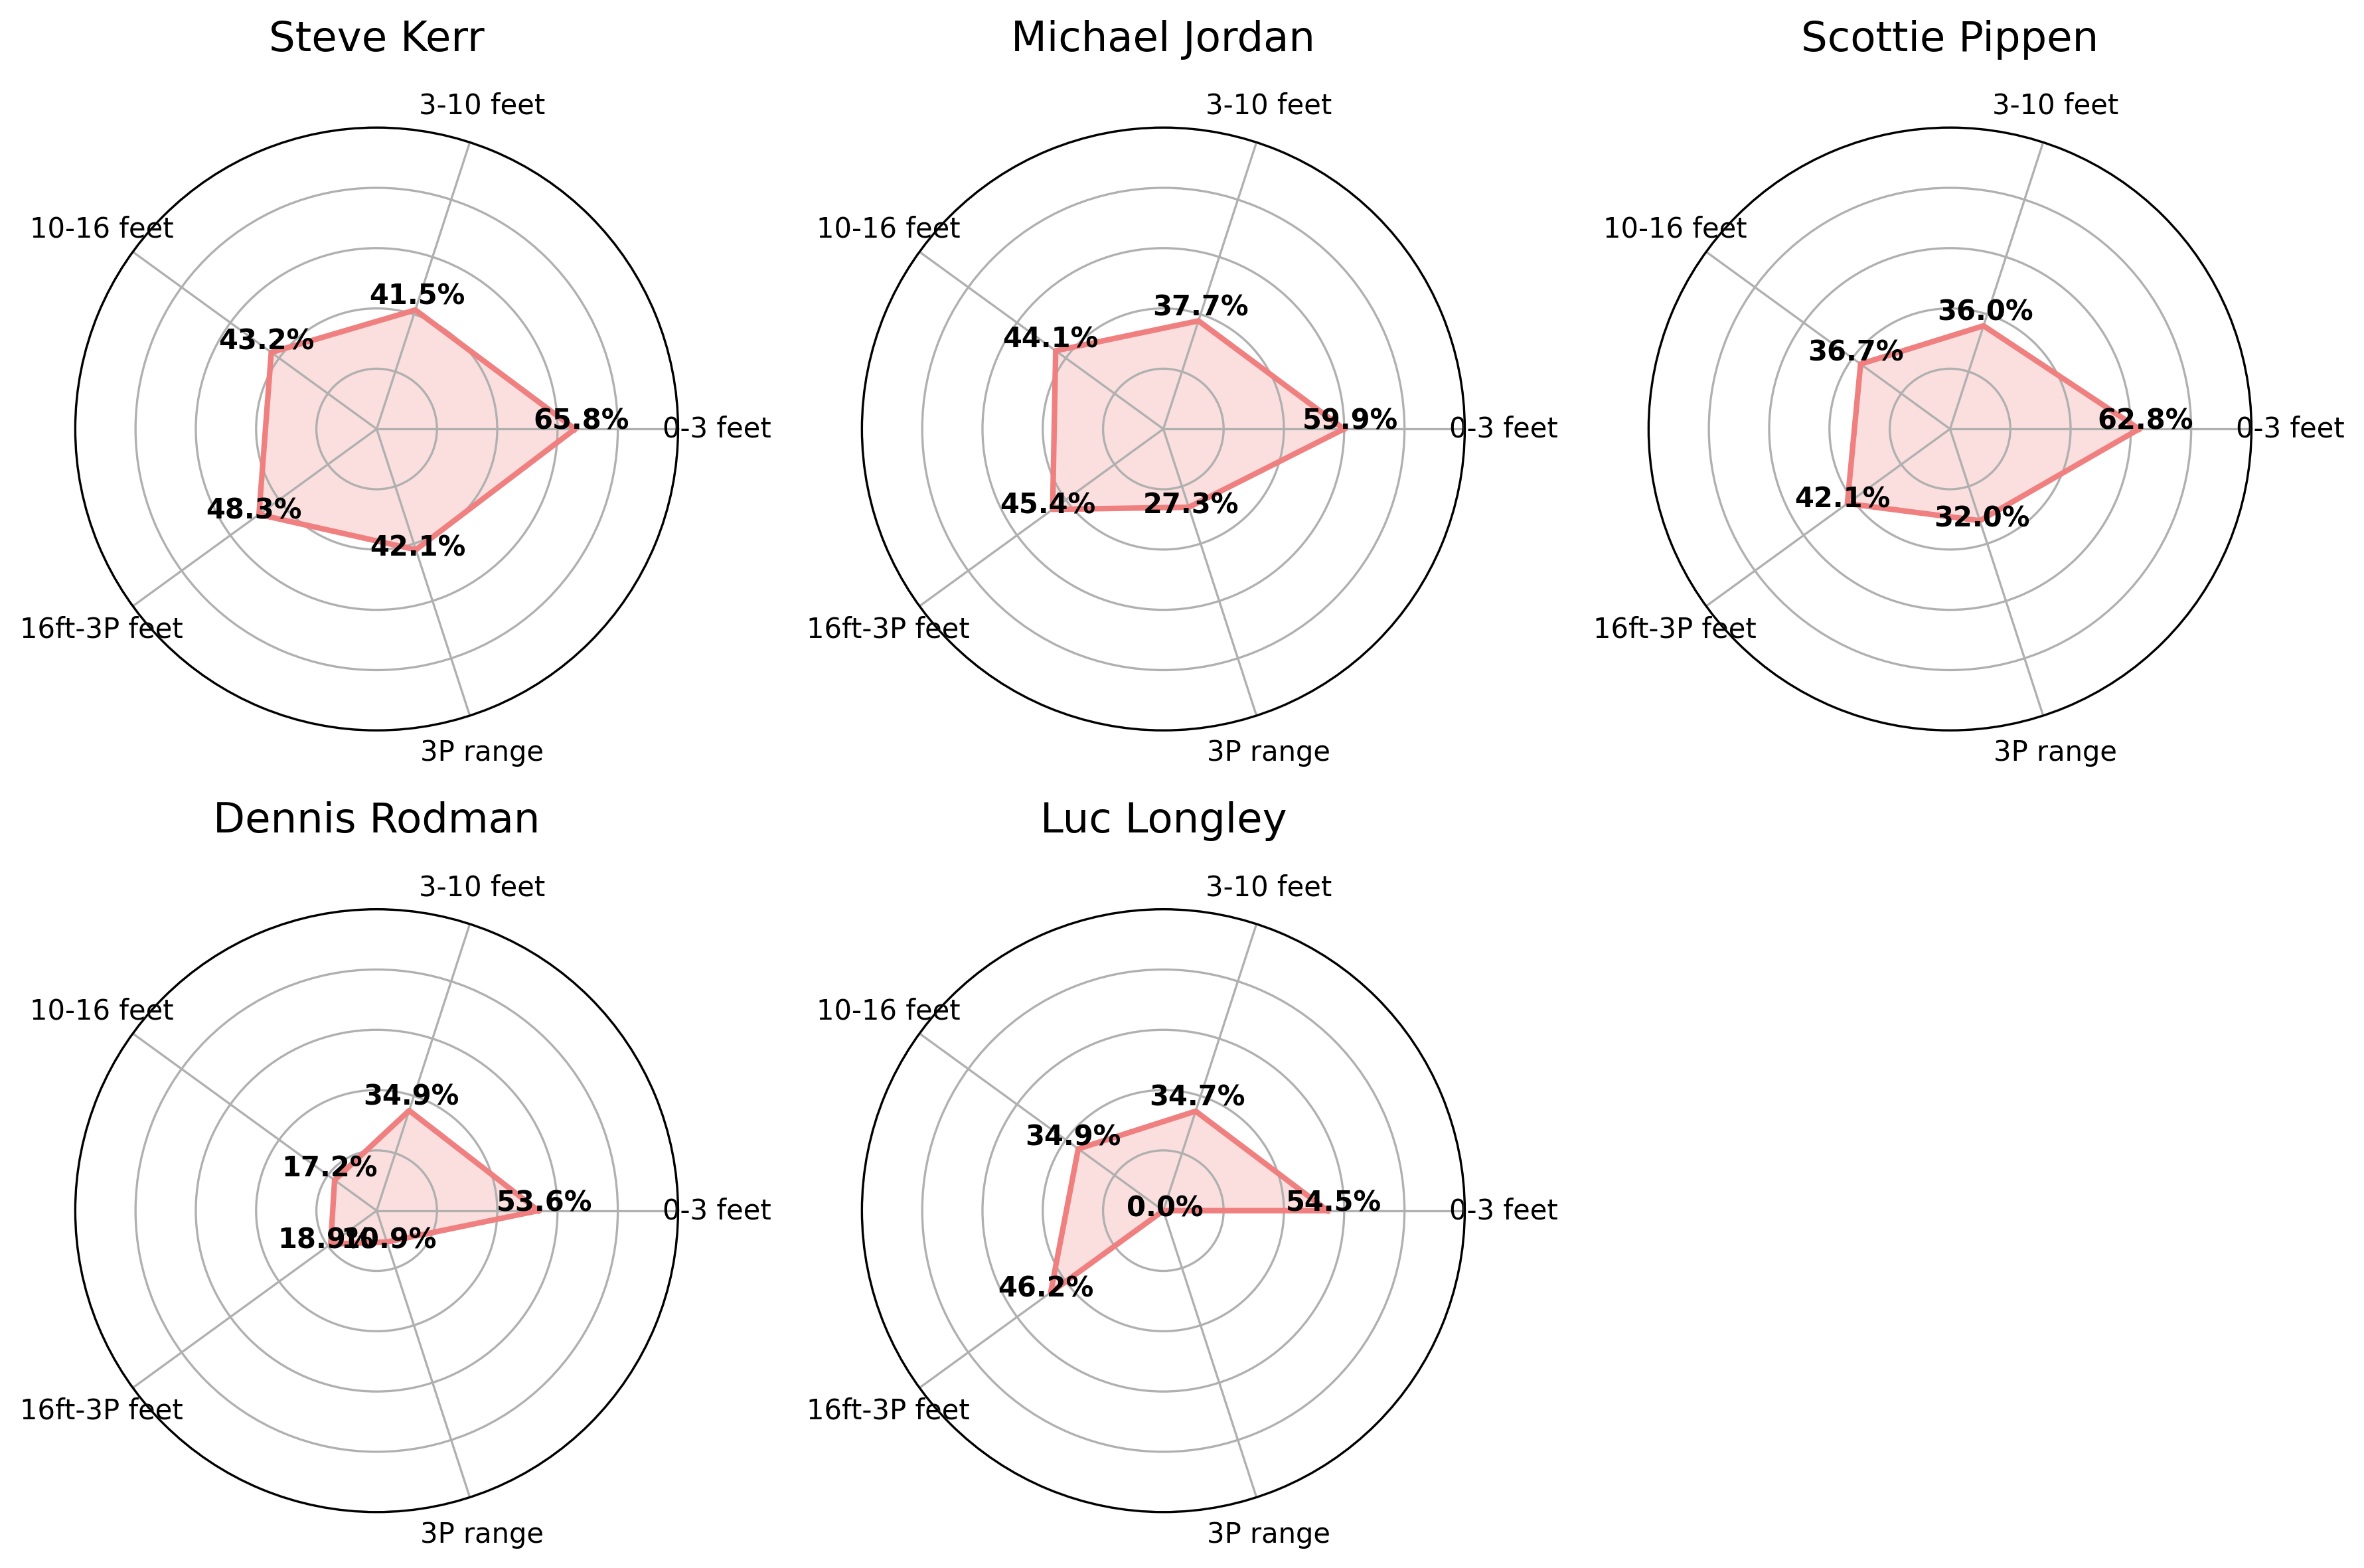

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# Define the shooting zones and corresponding display names
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

categories_display = [
    '0-3 feet',
    '3-10 feet',
    '10-16 feet',
    '16ft-3P feet',
    '3P range'
]

# Function to create radar charts with a 2x3 layout
def plot_radar_with_original_layout(player_ids, data):
    # Set dpi in plt.figure instead of figsize to affect resolution correctly
    fig, axes = plt.subplots(2, 3, figsize=(12, 8), subplot_kw=dict(polar=True), dpi=300)
    axes = axes.flatten()

    for i, player_id in enumerate(player_ids):
        player_data = data[data['player_id'] == player_id]

        if player_data.empty:
            print(f"No data found for player_id: {player_id}")
            continue

        player_name = player_data['player'].values[0]
        player_mean_values = player_data[shooting_zones_columns].mean().values * 100
        player_mean_values = np.concatenate((player_mean_values, [player_mean_values[0]]))

        categories = categories_display
        n = len(categories)
        angles = [i / float(n) * 2 * pi for i in range(n)]
        angles += angles[:1]

        ax = axes[i]
        ax.fill(angles, player_mean_values, color='lightcoral', alpha=0.25)
        ax.plot(angles, player_mean_values, color='lightcoral', linewidth=2, label=f'{player_name}')
        ax.set_title(player_name, size=15, y=1.1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)

        # Set the radial limits to range from 0% to 100%
        ax.set_ylim(0, 100)

        # Remove radial tick labels (20, 40, 60, 80, 100)
        ax.set_yticklabels([])

        # Display values on the radar chart
        for j, angle in enumerate(angles[:-1]):
            ax.text(angle, player_mean_values[j] + 2, f'{player_mean_values[j]:.1f}%',
                    horizontalalignment='center', size=10, color='black', weight='bold')

    # Remove unused axes if there are less than 6 players
    if len(player_ids) < len(axes):
        for j in range(len(player_ids), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage with player IDs
player_ids = [int(2467), int(2193), int(2394), int(2301), int(2669)]  # Replace with your desired player IDs


# Generate radar charts
plot_radar_with_original_layout(player_ids, shooting_data)
